# __Tugas Besar 1 Pembelajaran Mesin__

Kelompok 52

Group Member:
- Satriadhikara Panji Yudhistira (13522125)
- Mohammad Andhika Fadillah (13522128)
- Farrel Natha Saskoro (13522145)

## Import Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from core.neural_network import NeuralNetwork
from core.loss_functions import (
    CategoricalCrossEntropy,
    BinaryCrossEntropy,
    MeanSquaredError,
)
from core.weight_initializers import (
    ZeroInitializer,
    UniformInitializer,
    NormalInitializer,
    XavierInitializer,
    HeInitializer,
)
from core.activations import (
    Linear,
    Sigmoid,
    ReLU,
    Tanh,
    Softmax,
    Swish,
    GELU,
)


## Setup Dataset

In [2]:
# Load dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

y = y.astype(np.int8)
X = X.to_numpy()
y = y.to_numpy()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

def to_categorical(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

Loading MNIST dataset...


## Base Model

In [3]:
# Test base model
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history = model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred = model.forward(X_test)
pred_classes = np.argmax(pred, axis=1)
accuracy = np.mean(pred_classes == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1115.68it/s]


Epoch 1/50, Train Loss: 1.8766, Val Loss: 1.3418, Val Acc: 0.6816


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1323.79it/s]


Epoch 2/50, Train Loss: 1.0764, Val Loss: 0.8781, Val Acc: 0.7804


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1300.82it/s]


Epoch 3/50, Train Loss: 0.7647, Val Loss: 0.6840, Val Acc: 0.8202


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1375.08it/s]


Epoch 4/50, Train Loss: 0.6238, Val Loss: 0.5865, Val Acc: 0.8412


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1271.83it/s]


Epoch 5/50, Train Loss: 0.5461, Val Loss: 0.5264, Val Acc: 0.8538


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1338.77it/s]


Epoch 6/50, Train Loss: 0.4960, Val Loss: 0.4862, Val Acc: 0.8629


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1358.93it/s]


Epoch 7/50, Train Loss: 0.4608, Val Loss: 0.4567, Val Acc: 0.8698


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1274.24it/s]


Epoch 8/50, Train Loss: 0.4348, Val Loss: 0.4341, Val Acc: 0.8763


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1295.69it/s]


Epoch 9/50, Train Loss: 0.4143, Val Loss: 0.4180, Val Acc: 0.8791


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1307.12it/s]


Epoch 10/50, Train Loss: 0.3979, Val Loss: 0.4034, Val Acc: 0.8822


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1176.29it/s]


Epoch 11/50, Train Loss: 0.3845, Val Loss: 0.3905, Val Acc: 0.8870


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1365.89it/s]


Epoch 12/50, Train Loss: 0.3733, Val Loss: 0.3807, Val Acc: 0.8872


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1314.54it/s]


Epoch 13/50, Train Loss: 0.3637, Val Loss: 0.3711, Val Acc: 0.8916


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1355.72it/s]


Epoch 14/50, Train Loss: 0.3551, Val Loss: 0.3640, Val Acc: 0.8929


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1360.72it/s]


Epoch 15/50, Train Loss: 0.3476, Val Loss: 0.3568, Val Acc: 0.8951


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1368.23it/s]


Epoch 16/50, Train Loss: 0.3411, Val Loss: 0.3504, Val Acc: 0.8957


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1383.30it/s]


Epoch 17/50, Train Loss: 0.3351, Val Loss: 0.3449, Val Acc: 0.8979


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1441.00it/s]


Epoch 18/50, Train Loss: 0.3298, Val Loss: 0.3403, Val Acc: 0.8991


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1454.26it/s]


Epoch 19/50, Train Loss: 0.3248, Val Loss: 0.3359, Val Acc: 0.9004


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1429.81it/s]


Epoch 20/50, Train Loss: 0.3201, Val Loss: 0.3316, Val Acc: 0.9014


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1453.11it/s]


Epoch 21/50, Train Loss: 0.3160, Val Loss: 0.3272, Val Acc: 0.9031


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1353.92it/s]


Epoch 22/50, Train Loss: 0.3119, Val Loss: 0.3235, Val Acc: 0.9033


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1310.25it/s]


Epoch 23/50, Train Loss: 0.3084, Val Loss: 0.3212, Val Acc: 0.9048


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1357.70it/s]


Epoch 24/50, Train Loss: 0.3049, Val Loss: 0.3171, Val Acc: 0.9067


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1365.14it/s]


Epoch 25/50, Train Loss: 0.3016, Val Loss: 0.3145, Val Acc: 0.9073


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1426.08it/s]


Epoch 26/50, Train Loss: 0.2986, Val Loss: 0.3111, Val Acc: 0.9087


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1387.67it/s]


Epoch 27/50, Train Loss: 0.2954, Val Loss: 0.3081, Val Acc: 0.9093


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1413.40it/s]


Epoch 28/50, Train Loss: 0.2926, Val Loss: 0.3063, Val Acc: 0.9098


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1453.37it/s]


Epoch 29/50, Train Loss: 0.2899, Val Loss: 0.3030, Val Acc: 0.9117


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1389.74it/s]


Epoch 30/50, Train Loss: 0.2873, Val Loss: 0.3005, Val Acc: 0.9118


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1450.37it/s]


Epoch 31/50, Train Loss: 0.2847, Val Loss: 0.2988, Val Acc: 0.9131


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1277.30it/s]


Epoch 32/50, Train Loss: 0.2822, Val Loss: 0.2957, Val Acc: 0.9137


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1351.44it/s]


Epoch 33/50, Train Loss: 0.2799, Val Loss: 0.2944, Val Acc: 0.9142


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1453.04it/s]


Epoch 34/50, Train Loss: 0.2777, Val Loss: 0.2918, Val Acc: 0.9153


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1414.53it/s]


Epoch 35/50, Train Loss: 0.2753, Val Loss: 0.2895, Val Acc: 0.9162


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1403.69it/s]


Epoch 36/50, Train Loss: 0.2731, Val Loss: 0.2870, Val Acc: 0.9171


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1406.85it/s]


Epoch 37/50, Train Loss: 0.2711, Val Loss: 0.2858, Val Acc: 0.9173


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1355.26it/s]


Epoch 38/50, Train Loss: 0.2689, Val Loss: 0.2837, Val Acc: 0.9177


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1459.73it/s]


Epoch 39/50, Train Loss: 0.2670, Val Loss: 0.2820, Val Acc: 0.9193


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1416.10it/s]


Epoch 40/50, Train Loss: 0.2649, Val Loss: 0.2807, Val Acc: 0.9199


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1401.53it/s]


Epoch 41/50, Train Loss: 0.2630, Val Loss: 0.2781, Val Acc: 0.9204


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1411.09it/s]


Epoch 42/50, Train Loss: 0.2608, Val Loss: 0.2769, Val Acc: 0.9206


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1506.55it/s]


Epoch 43/50, Train Loss: 0.2591, Val Loss: 0.2749, Val Acc: 0.9215


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1352.03it/s]


Epoch 44/50, Train Loss: 0.2572, Val Loss: 0.2733, Val Acc: 0.9213


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1213.52it/s]


Epoch 45/50, Train Loss: 0.2552, Val Loss: 0.2713, Val Acc: 0.9228


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1459.26it/s]


Epoch 46/50, Train Loss: 0.2534, Val Loss: 0.2693, Val Acc: 0.9234


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1279.93it/s]


Epoch 47/50, Train Loss: 0.2517, Val Loss: 0.2677, Val Acc: 0.9240


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1331.84it/s]


Epoch 48/50, Train Loss: 0.2497, Val Loss: 0.2668, Val Acc: 0.9243


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1230.85it/s]


Epoch 49/50, Train Loss: 0.2480, Val Loss: 0.2642, Val Acc: 0.9244


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1340.41it/s]


Epoch 50/50, Train Loss: 0.2463, Val Loss: 0.2629, Val Acc: 0.9254
Test Accuracy: 0.9254


## HyperParameter Experiment

### Pengaruh Depth dan Width

#### Variasi pada Depth

Training model depth configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1400.64it/s]


Epoch 1/50, Train Loss: 1.8601, Val Loss: 1.2725, Val Acc: 0.6815


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1370.90it/s]


Epoch 2/50, Train Loss: 0.9636, Val Loss: 0.7690, Val Acc: 0.8053


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1467.62it/s]


Epoch 3/50, Train Loss: 0.6591, Val Loss: 0.5940, Val Acc: 0.8423


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1393.06it/s]


Epoch 4/50, Train Loss: 0.5349, Val Loss: 0.5081, Val Acc: 0.8600


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1437.16it/s]


Epoch 5/50, Train Loss: 0.4689, Val Loss: 0.4574, Val Acc: 0.8713


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1423.62it/s]


Epoch 6/50, Train Loss: 0.4283, Val Loss: 0.4246, Val Acc: 0.8792


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1381.89it/s]


Epoch 7/50, Train Loss: 0.4005, Val Loss: 0.4017, Val Acc: 0.8835


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1449.28it/s]


Epoch 8/50, Train Loss: 0.3803, Val Loss: 0.3845, Val Acc: 0.8869


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1420.11it/s]


Epoch 9/50, Train Loss: 0.3644, Val Loss: 0.3716, Val Acc: 0.8895


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1418.67it/s]


Epoch 10/50, Train Loss: 0.3517, Val Loss: 0.3604, Val Acc: 0.8931


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1364.27it/s]


Epoch 11/50, Train Loss: 0.3411, Val Loss: 0.3502, Val Acc: 0.8968


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1359.14it/s]


Epoch 12/50, Train Loss: 0.3321, Val Loss: 0.3417, Val Acc: 0.8981


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1357.03it/s]


Epoch 13/50, Train Loss: 0.3242, Val Loss: 0.3345, Val Acc: 0.9005


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1369.81it/s]


Epoch 14/50, Train Loss: 0.3169, Val Loss: 0.3300, Val Acc: 0.9016


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1351.43it/s]


Epoch 15/50, Train Loss: 0.3106, Val Loss: 0.3240, Val Acc: 0.9023


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1410.64it/s]


Epoch 16/50, Train Loss: 0.3048, Val Loss: 0.3200, Val Acc: 0.9039


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1364.42it/s]


Epoch 17/50, Train Loss: 0.2989, Val Loss: 0.3137, Val Acc: 0.9067


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1327.22it/s]


Epoch 18/50, Train Loss: 0.2945, Val Loss: 0.3081, Val Acc: 0.9087


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1255.98it/s]


Epoch 19/50, Train Loss: 0.2895, Val Loss: 0.3036, Val Acc: 0.9111


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1244.28it/s]


Epoch 20/50, Train Loss: 0.2852, Val Loss: 0.3026, Val Acc: 0.9121


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1273.86it/s]


Epoch 21/50, Train Loss: 0.2809, Val Loss: 0.2974, Val Acc: 0.9132


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1113.22it/s]


Epoch 22/50, Train Loss: 0.2768, Val Loss: 0.2941, Val Acc: 0.9114


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1202.35it/s]


Epoch 23/50, Train Loss: 0.2733, Val Loss: 0.2898, Val Acc: 0.9137


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1345.94it/s]


Epoch 24/50, Train Loss: 0.2696, Val Loss: 0.2867, Val Acc: 0.9158


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1094.68it/s]


Epoch 25/50, Train Loss: 0.2657, Val Loss: 0.2825, Val Acc: 0.9173


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1111.02it/s]


Epoch 26/50, Train Loss: 0.2624, Val Loss: 0.2785, Val Acc: 0.9180


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1281.35it/s]


Epoch 27/50, Train Loss: 0.2592, Val Loss: 0.2771, Val Acc: 0.9188


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1317.38it/s]


Epoch 28/50, Train Loss: 0.2558, Val Loss: 0.2764, Val Acc: 0.9167


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1172.45it/s]


Epoch 29/50, Train Loss: 0.2529, Val Loss: 0.2744, Val Acc: 0.9196


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1250.29it/s]


Epoch 30/50, Train Loss: 0.2498, Val Loss: 0.2685, Val Acc: 0.9207


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1046.75it/s]


Epoch 31/50, Train Loss: 0.2472, Val Loss: 0.2655, Val Acc: 0.9217


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1269.42it/s]


Epoch 32/50, Train Loss: 0.2443, Val Loss: 0.2623, Val Acc: 0.9236


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1267.15it/s]


Epoch 33/50, Train Loss: 0.2415, Val Loss: 0.2598, Val Acc: 0.9236


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1240.11it/s]


Epoch 34/50, Train Loss: 0.2385, Val Loss: 0.2587, Val Acc: 0.9240


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1285.31it/s]


Epoch 35/50, Train Loss: 0.2359, Val Loss: 0.2555, Val Acc: 0.9249


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1223.30it/s]


Epoch 36/50, Train Loss: 0.2332, Val Loss: 0.2535, Val Acc: 0.9263


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1275.65it/s]


Epoch 37/50, Train Loss: 0.2305, Val Loss: 0.2501, Val Acc: 0.9273


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1260.17it/s]


Epoch 38/50, Train Loss: 0.2281, Val Loss: 0.2480, Val Acc: 0.9272


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1227.35it/s]


Epoch 39/50, Train Loss: 0.2258, Val Loss: 0.2461, Val Acc: 0.9279


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1247.93it/s]


Epoch 40/50, Train Loss: 0.2234, Val Loss: 0.2432, Val Acc: 0.9292


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1254.94it/s]


Epoch 41/50, Train Loss: 0.2208, Val Loss: 0.2410, Val Acc: 0.9302


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1267.64it/s]


Epoch 42/50, Train Loss: 0.2183, Val Loss: 0.2394, Val Acc: 0.9306


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1305.41it/s]


Epoch 43/50, Train Loss: 0.2161, Val Loss: 0.2382, Val Acc: 0.9306


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1278.88it/s]


Epoch 44/50, Train Loss: 0.2136, Val Loss: 0.2365, Val Acc: 0.9313


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1299.17it/s]


Epoch 45/50, Train Loss: 0.2114, Val Loss: 0.2331, Val Acc: 0.9324


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1266.02it/s]


Epoch 46/50, Train Loss: 0.2093, Val Loss: 0.2307, Val Acc: 0.9323


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1340.51it/s]


Epoch 47/50, Train Loss: 0.2074, Val Loss: 0.2298, Val Acc: 0.9323


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1304.20it/s]


Epoch 48/50, Train Loss: 0.2051, Val Loss: 0.2283, Val Acc: 0.9322


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1266.96it/s]


Epoch 49/50, Train Loss: 0.2030, Val Loss: 0.2268, Val Acc: 0.9346


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1266.59it/s]


Epoch 50/50, Train Loss: 0.2011, Val Loss: 0.2244, Val Acc: 0.9339
Test Accuracy (Depth): 0.9353

Training model depth configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 599.32it/s]


Epoch 1/50, Train Loss: 1.9624, Val Loss: 1.3350, Val Acc: 0.6589


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 623.83it/s]


Epoch 2/50, Train Loss: 1.0068, Val Loss: 0.8051, Val Acc: 0.7740


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 616.12it/s]


Epoch 3/50, Train Loss: 0.6852, Val Loss: 0.6189, Val Acc: 0.8208


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 605.76it/s]


Epoch 4/50, Train Loss: 0.5545, Val Loss: 0.5226, Val Acc: 0.8459


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 594.50it/s]


Epoch 5/50, Train Loss: 0.4828, Val Loss: 0.4677, Val Acc: 0.8631


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 570.41it/s]


Epoch 6/50, Train Loss: 0.4363, Val Loss: 0.4270, Val Acc: 0.8745


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 501.41it/s]


Epoch 7/50, Train Loss: 0.4018, Val Loss: 0.4004, Val Acc: 0.8818


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 538.07it/s]


Epoch 8/50, Train Loss: 0.3754, Val Loss: 0.3752, Val Acc: 0.8879


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 581.92it/s]


Epoch 9/50, Train Loss: 0.3537, Val Loss: 0.3579, Val Acc: 0.8920


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 579.82it/s]


Epoch 10/50, Train Loss: 0.3376, Val Loss: 0.3435, Val Acc: 0.8978


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 591.16it/s]


Epoch 11/50, Train Loss: 0.3240, Val Loss: 0.3309, Val Acc: 0.9006


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 597.58it/s]


Epoch 12/50, Train Loss: 0.3123, Val Loss: 0.3209, Val Acc: 0.9031


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 654.33it/s]


Epoch 13/50, Train Loss: 0.3027, Val Loss: 0.3118, Val Acc: 0.9078


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 603.67it/s]


Epoch 14/50, Train Loss: 0.2938, Val Loss: 0.3033, Val Acc: 0.9113


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 619.27it/s]


Epoch 15/50, Train Loss: 0.2860, Val Loss: 0.2978, Val Acc: 0.9111


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 619.65it/s]


Epoch 16/50, Train Loss: 0.2790, Val Loss: 0.2910, Val Acc: 0.9129


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 630.55it/s]


Epoch 17/50, Train Loss: 0.2723, Val Loss: 0.2859, Val Acc: 0.9151


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 626.64it/s]


Epoch 18/50, Train Loss: 0.2660, Val Loss: 0.2784, Val Acc: 0.9180


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 610.44it/s]


Epoch 19/50, Train Loss: 0.2605, Val Loss: 0.2734, Val Acc: 0.9196


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 656.45it/s]


Epoch 20/50, Train Loss: 0.2550, Val Loss: 0.2679, Val Acc: 0.9211


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 630.26it/s]


Epoch 21/50, Train Loss: 0.2498, Val Loss: 0.2637, Val Acc: 0.9232


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 630.79it/s]


Epoch 22/50, Train Loss: 0.2447, Val Loss: 0.2617, Val Acc: 0.9228


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 644.80it/s]


Epoch 23/50, Train Loss: 0.2405, Val Loss: 0.2590, Val Acc: 0.9240


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 632.74it/s]


Epoch 24/50, Train Loss: 0.2357, Val Loss: 0.2506, Val Acc: 0.9267


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 653.83it/s]


Epoch 25/50, Train Loss: 0.2311, Val Loss: 0.2496, Val Acc: 0.9265


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 640.57it/s]


Epoch 26/50, Train Loss: 0.2272, Val Loss: 0.2432, Val Acc: 0.9288


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 651.91it/s]


Epoch 27/50, Train Loss: 0.2231, Val Loss: 0.2401, Val Acc: 0.9296


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 630.49it/s]


Epoch 28/50, Train Loss: 0.2190, Val Loss: 0.2370, Val Acc: 0.9309


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 597.17it/s]


Epoch 29/50, Train Loss: 0.2148, Val Loss: 0.2341, Val Acc: 0.9321


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 643.03it/s]


Epoch 30/50, Train Loss: 0.2118, Val Loss: 0.2301, Val Acc: 0.9327


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 654.41it/s]


Epoch 31/50, Train Loss: 0.2082, Val Loss: 0.2278, Val Acc: 0.9347


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 616.57it/s]


Epoch 32/50, Train Loss: 0.2048, Val Loss: 0.2261, Val Acc: 0.9334


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 619.59it/s]


Epoch 33/50, Train Loss: 0.2019, Val Loss: 0.2236, Val Acc: 0.9352


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 628.66it/s]


Epoch 34/50, Train Loss: 0.1985, Val Loss: 0.2197, Val Acc: 0.9360


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 612.72it/s]


Epoch 35/50, Train Loss: 0.1953, Val Loss: 0.2197, Val Acc: 0.9348


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 624.19it/s]


Epoch 36/50, Train Loss: 0.1923, Val Loss: 0.2155, Val Acc: 0.9366


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 624.69it/s]


Epoch 37/50, Train Loss: 0.1893, Val Loss: 0.2110, Val Acc: 0.9387


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 637.97it/s]


Epoch 38/50, Train Loss: 0.1864, Val Loss: 0.2088, Val Acc: 0.9383


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 632.04it/s]


Epoch 39/50, Train Loss: 0.1838, Val Loss: 0.2114, Val Acc: 0.9382


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 660.09it/s]


Epoch 40/50, Train Loss: 0.1814, Val Loss: 0.2074, Val Acc: 0.9387


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 598.02it/s]


Epoch 41/50, Train Loss: 0.1786, Val Loss: 0.2036, Val Acc: 0.9404


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 630.51it/s]


Epoch 42/50, Train Loss: 0.1762, Val Loss: 0.2004, Val Acc: 0.9413


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 484.42it/s]


Epoch 43/50, Train Loss: 0.1733, Val Loss: 0.2011, Val Acc: 0.9404


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 633.12it/s]


Epoch 44/50, Train Loss: 0.1709, Val Loss: 0.1957, Val Acc: 0.9435


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 619.85it/s]


Epoch 45/50, Train Loss: 0.1688, Val Loss: 0.1939, Val Acc: 0.9449


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 639.84it/s]


Epoch 46/50, Train Loss: 0.1665, Val Loss: 0.1906, Val Acc: 0.9437


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 625.93it/s]


Epoch 47/50, Train Loss: 0.1640, Val Loss: 0.1931, Val Acc: 0.9428


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 625.23it/s]


Epoch 48/50, Train Loss: 0.1622, Val Loss: 0.1896, Val Acc: 0.9446


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 617.66it/s]


Epoch 49/50, Train Loss: 0.1602, Val Loss: 0.1850, Val Acc: 0.9462


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 608.88it/s]


Epoch 50/50, Train Loss: 0.1577, Val Loss: 0.1844, Val Acc: 0.9458
Test Accuracy (Depth 2): 0.9484

Training model depth configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:03<00:00, 191.86it/s]


Epoch 1/50, Train Loss: 1.5879, Val Loss: 0.9451, Val Acc: 0.7475


Epoch 2/50: 100%|██████████| 700/700 [00:03<00:00, 186.19it/s]


Epoch 2/50, Train Loss: 0.7409, Val Loss: 0.6150, Val Acc: 0.8224


Epoch 3/50: 100%|██████████| 700/700 [00:03<00:00, 186.32it/s]


Epoch 3/50, Train Loss: 0.5391, Val Loss: 0.4961, Val Acc: 0.8579


Epoch 4/50: 100%|██████████| 700/700 [00:03<00:00, 187.42it/s]


Epoch 4/50, Train Loss: 0.4529, Val Loss: 0.4314, Val Acc: 0.8764


Epoch 5/50: 100%|██████████| 700/700 [00:03<00:00, 216.04it/s]


Epoch 5/50, Train Loss: 0.4064, Val Loss: 0.3968, Val Acc: 0.8849


Epoch 6/50: 100%|██████████| 700/700 [00:03<00:00, 224.07it/s]


Epoch 6/50, Train Loss: 0.3758, Val Loss: 0.3841, Val Acc: 0.8854


Epoch 7/50: 100%|██████████| 700/700 [00:03<00:00, 218.13it/s]


Epoch 7/50, Train Loss: 0.3548, Val Loss: 0.3598, Val Acc: 0.8938


Epoch 8/50: 100%|██████████| 700/700 [00:03<00:00, 223.27it/s]


Epoch 8/50, Train Loss: 0.3373, Val Loss: 0.3405, Val Acc: 0.8984


Epoch 9/50: 100%|██████████| 700/700 [00:03<00:00, 194.24it/s]


Epoch 9/50, Train Loss: 0.3241, Val Loss: 0.3231, Val Acc: 0.9057


Epoch 10/50: 100%|██████████| 700/700 [00:03<00:00, 191.46it/s]


Epoch 10/50, Train Loss: 0.3109, Val Loss: 0.3233, Val Acc: 0.9041


Epoch 11/50: 100%|██████████| 700/700 [00:03<00:00, 188.29it/s]


Epoch 11/50, Train Loss: 0.3003, Val Loss: 0.3056, Val Acc: 0.9104


Epoch 12/50: 100%|██████████| 700/700 [00:03<00:00, 190.90it/s]


Epoch 12/50, Train Loss: 0.2908, Val Loss: 0.2972, Val Acc: 0.9134


Epoch 13/50: 100%|██████████| 700/700 [00:03<00:00, 185.72it/s]


Epoch 13/50, Train Loss: 0.2835, Val Loss: 0.2941, Val Acc: 0.9118


Epoch 14/50: 100%|██████████| 700/700 [00:03<00:00, 184.00it/s]


Epoch 14/50, Train Loss: 0.2746, Val Loss: 0.2907, Val Acc: 0.9167


Epoch 15/50: 100%|██████████| 700/700 [00:03<00:00, 189.86it/s]


Epoch 15/50, Train Loss: 0.2680, Val Loss: 0.2752, Val Acc: 0.9204


Epoch 16/50: 100%|██████████| 700/700 [00:03<00:00, 184.22it/s]


Epoch 16/50, Train Loss: 0.2608, Val Loss: 0.2747, Val Acc: 0.9204


Epoch 17/50: 100%|██████████| 700/700 [00:03<00:00, 181.77it/s]


Epoch 17/50, Train Loss: 0.2548, Val Loss: 0.2642, Val Acc: 0.9229


Epoch 18/50: 100%|██████████| 700/700 [00:03<00:00, 189.23it/s]


Epoch 18/50, Train Loss: 0.2505, Val Loss: 0.2628, Val Acc: 0.9219


Epoch 19/50: 100%|██████████| 700/700 [00:03<00:00, 212.65it/s]


Epoch 19/50, Train Loss: 0.2440, Val Loss: 0.2570, Val Acc: 0.9234


Epoch 20/50: 100%|██████████| 700/700 [00:03<00:00, 181.71it/s]


Epoch 20/50, Train Loss: 0.2389, Val Loss: 0.2540, Val Acc: 0.9268


Epoch 21/50: 100%|██████████| 700/700 [00:03<00:00, 176.09it/s]


Epoch 21/50, Train Loss: 0.2340, Val Loss: 0.2455, Val Acc: 0.9288


Epoch 22/50: 100%|██████████| 700/700 [00:04<00:00, 170.76it/s]


Epoch 22/50, Train Loss: 0.2289, Val Loss: 0.2428, Val Acc: 0.9297


Epoch 23/50: 100%|██████████| 700/700 [00:03<00:00, 184.46it/s]


Epoch 23/50, Train Loss: 0.2236, Val Loss: 0.2414, Val Acc: 0.9287


Epoch 24/50: 100%|██████████| 700/700 [00:03<00:00, 182.20it/s]


Epoch 24/50, Train Loss: 0.2198, Val Loss: 0.2435, Val Acc: 0.9277


Epoch 25/50: 100%|██████████| 700/700 [00:03<00:00, 185.12it/s]


Epoch 25/50, Train Loss: 0.2146, Val Loss: 0.2294, Val Acc: 0.9336


Epoch 26/50: 100%|██████████| 700/700 [00:03<00:00, 206.64it/s]


Epoch 26/50, Train Loss: 0.2111, Val Loss: 0.2296, Val Acc: 0.9326


Epoch 27/50: 100%|██████████| 700/700 [00:03<00:00, 184.82it/s]


Epoch 27/50, Train Loss: 0.2064, Val Loss: 0.2275, Val Acc: 0.9344


Epoch 28/50: 100%|██████████| 700/700 [00:03<00:00, 181.60it/s]


Epoch 28/50, Train Loss: 0.2025, Val Loss: 0.2172, Val Acc: 0.9361


Epoch 29/50: 100%|██████████| 700/700 [00:03<00:00, 178.85it/s]


Epoch 29/50, Train Loss: 0.1998, Val Loss: 0.2199, Val Acc: 0.9346


Epoch 30/50: 100%|██████████| 700/700 [00:04<00:00, 168.99it/s]


Epoch 30/50, Train Loss: 0.1944, Val Loss: 0.2107, Val Acc: 0.9373


Epoch 31/50: 100%|██████████| 700/700 [00:03<00:00, 203.80it/s]


Epoch 31/50, Train Loss: 0.1907, Val Loss: 0.2097, Val Acc: 0.9391


Epoch 32/50: 100%|██████████| 700/700 [00:03<00:00, 204.61it/s]


Epoch 32/50, Train Loss: 0.1869, Val Loss: 0.2056, Val Acc: 0.9382


Epoch 33/50: 100%|██████████| 700/700 [00:03<00:00, 215.72it/s]


Epoch 33/50, Train Loss: 0.1839, Val Loss: 0.2086, Val Acc: 0.9373


Epoch 34/50: 100%|██████████| 700/700 [00:03<00:00, 207.81it/s]


Epoch 34/50, Train Loss: 0.1799, Val Loss: 0.2049, Val Acc: 0.9396


Epoch 35/50: 100%|██████████| 700/700 [00:03<00:00, 180.53it/s]


Epoch 35/50, Train Loss: 0.1764, Val Loss: 0.1981, Val Acc: 0.9421


Epoch 36/50: 100%|██████████| 700/700 [00:03<00:00, 180.78it/s]


Epoch 36/50, Train Loss: 0.1732, Val Loss: 0.1987, Val Acc: 0.9388


Epoch 37/50: 100%|██████████| 700/700 [00:03<00:00, 176.62it/s]


Epoch 37/50, Train Loss: 0.1699, Val Loss: 0.1886, Val Acc: 0.9434


Epoch 38/50: 100%|██████████| 700/700 [00:03<00:00, 220.71it/s]


Epoch 38/50, Train Loss: 0.1671, Val Loss: 0.1886, Val Acc: 0.9442


Epoch 39/50: 100%|██████████| 700/700 [00:03<00:00, 178.24it/s]


Epoch 39/50, Train Loss: 0.1650, Val Loss: 0.1856, Val Acc: 0.9445


Epoch 40/50: 100%|██████████| 700/700 [00:04<00:00, 173.42it/s]


Epoch 40/50, Train Loss: 0.1616, Val Loss: 0.1849, Val Acc: 0.9453


Epoch 41/50: 100%|██████████| 700/700 [00:03<00:00, 177.82it/s]


Epoch 41/50, Train Loss: 0.1586, Val Loss: 0.1789, Val Acc: 0.9461


Epoch 42/50: 100%|██████████| 700/700 [00:03<00:00, 181.44it/s]


Epoch 42/50, Train Loss: 0.1564, Val Loss: 0.1822, Val Acc: 0.9453


Epoch 43/50: 100%|██████████| 700/700 [00:03<00:00, 187.08it/s]


Epoch 43/50, Train Loss: 0.1533, Val Loss: 0.1767, Val Acc: 0.9468


Epoch 44/50: 100%|██████████| 700/700 [00:03<00:00, 178.35it/s]


Epoch 44/50, Train Loss: 0.1502, Val Loss: 0.1772, Val Acc: 0.9444


Epoch 45/50: 100%|██████████| 700/700 [00:03<00:00, 179.73it/s]


Epoch 45/50, Train Loss: 0.1485, Val Loss: 0.1742, Val Acc: 0.9480


Epoch 46/50: 100%|██████████| 700/700 [00:03<00:00, 187.82it/s]


Epoch 46/50, Train Loss: 0.1459, Val Loss: 0.1732, Val Acc: 0.9468


Epoch 47/50: 100%|██████████| 700/700 [00:03<00:00, 186.90it/s]


Epoch 47/50, Train Loss: 0.1440, Val Loss: 0.1688, Val Acc: 0.9507


Epoch 48/50: 100%|██████████| 700/700 [00:03<00:00, 188.49it/s]


Epoch 48/50, Train Loss: 0.1418, Val Loss: 0.1692, Val Acc: 0.9479


Epoch 49/50: 100%|██████████| 700/700 [00:03<00:00, 189.78it/s]


Epoch 49/50, Train Loss: 0.1399, Val Loss: 0.1666, Val Acc: 0.9493


Epoch 50/50: 100%|██████████| 700/700 [00:03<00:00, 186.18it/s]


Epoch 50/50, Train Loss: 0.1375, Val Loss: 0.1614, Val Acc: 0.9506
Test Accuracy (Depth 3): 0.9511


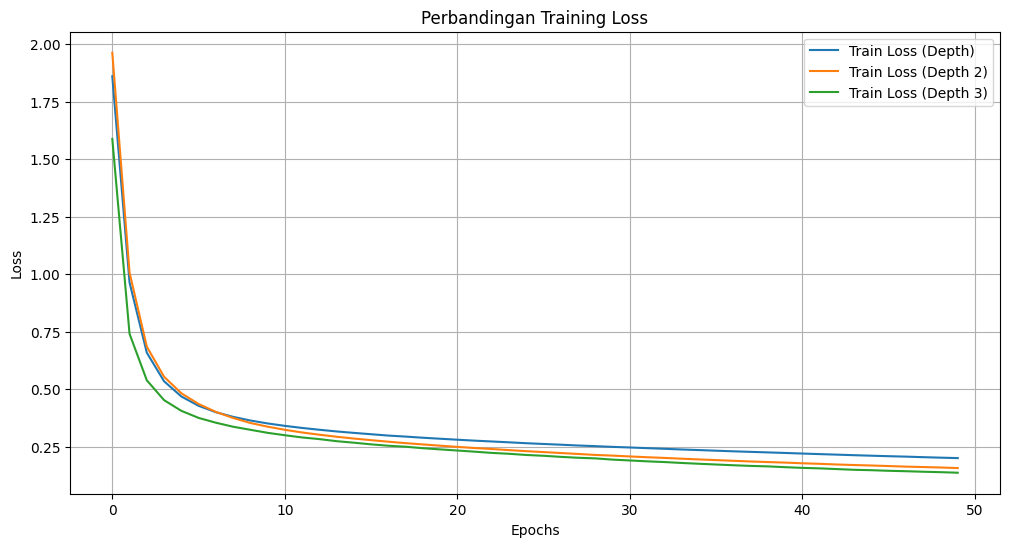

In [4]:
print("Training model depth configurations 1")
model_depth = NeuralNetwork(
    layer_sizes=[784, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth = model_depth.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth = model_depth.forward(X_test)
pred_classes_depth = np.argmax(pred_depth, axis=1)
accuracy_depth = np.mean(pred_classes_depth == y_test)
print(f"Test Accuracy (Depth): {accuracy_depth:.4f}\n")

print("Training model depth configurations 2")
model_depth_2 = NeuralNetwork(
    layer_sizes=[784, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_2 = model_depth_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_2 = model_depth_2.forward(X_test)
pred_classes_depth_2 = np.argmax(pred_depth_2, axis=1)
accuracy_depth_2 = np.mean(pred_classes_depth_2 == y_test)
print(f"Test Accuracy (Depth 2): {accuracy_depth_2:.4f}\n")

print("Training model depth configurations 3")
model_depth_3 = NeuralNetwork(
    layer_sizes=[784, 512, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_3 = model_depth_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_3 = model_depth_3.forward(X_test)
pred_classes_depth_3 = np.argmax(pred_depth_3, axis=1)
accuracy_depth_3 = np.mean(pred_classes_depth_3 == y_test)
print(f"Test Accuracy (Depth 3): {accuracy_depth_3:.4f}")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["train_loss"], label="Train Loss (Depth)"
)
plt.plot(
    history_depth_2["train_loss"], label="Train Loss (Depth 2)"
)
plt.plot(
    history_depth_3["train_loss"], label="Train Loss (Depth 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### Variasi pada Width

Training model width configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 548.09it/s]


Epoch 1/50, Train Loss: 1.6505, Val Loss: 1.1584, Val Acc: 0.7440


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 574.50it/s]


Epoch 2/50, Train Loss: 0.9209, Val Loss: 0.7560, Val Acc: 0.8280


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 576.71it/s]


Epoch 3/50, Train Loss: 0.6622, Val Loss: 0.5983, Val Acc: 0.8512


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 575.15it/s]


Epoch 4/50, Train Loss: 0.5488, Val Loss: 0.5187, Val Acc: 0.8640


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 573.81it/s]


Epoch 5/50, Train Loss: 0.4867, Val Loss: 0.4717, Val Acc: 0.8698


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 565.54it/s]


Epoch 6/50, Train Loss: 0.4474, Val Loss: 0.4398, Val Acc: 0.8767


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 589.91it/s]


Epoch 7/50, Train Loss: 0.4201, Val Loss: 0.4171, Val Acc: 0.8844


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 580.98it/s]


Epoch 8/50, Train Loss: 0.4002, Val Loss: 0.3994, Val Acc: 0.8871


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 584.22it/s]


Epoch 9/50, Train Loss: 0.3845, Val Loss: 0.3895, Val Acc: 0.8891


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 572.56it/s]


Epoch 10/50, Train Loss: 0.3721, Val Loss: 0.3756, Val Acc: 0.8931


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 584.37it/s]


Epoch 11/50, Train Loss: 0.3618, Val Loss: 0.3663, Val Acc: 0.8944


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 579.20it/s]


Epoch 12/50, Train Loss: 0.3528, Val Loss: 0.3580, Val Acc: 0.8955


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 578.16it/s]


Epoch 13/50, Train Loss: 0.3455, Val Loss: 0.3518, Val Acc: 0.8980


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 592.25it/s]


Epoch 14/50, Train Loss: 0.3386, Val Loss: 0.3464, Val Acc: 0.8979


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 584.96it/s]


Epoch 15/50, Train Loss: 0.3330, Val Loss: 0.3399, Val Acc: 0.9003


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 574.15it/s]


Epoch 16/50, Train Loss: 0.3277, Val Loss: 0.3357, Val Acc: 0.9007


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 575.77it/s]


Epoch 17/50, Train Loss: 0.3227, Val Loss: 0.3310, Val Acc: 0.9036


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 599.81it/s]


Epoch 18/50, Train Loss: 0.3184, Val Loss: 0.3269, Val Acc: 0.9040


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 585.73it/s]


Epoch 19/50, Train Loss: 0.3146, Val Loss: 0.3231, Val Acc: 0.9043


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 559.89it/s]


Epoch 20/50, Train Loss: 0.3105, Val Loss: 0.3197, Val Acc: 0.9060


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 573.91it/s]


Epoch 21/50, Train Loss: 0.3070, Val Loss: 0.3166, Val Acc: 0.9065


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 581.44it/s]


Epoch 22/50, Train Loss: 0.3037, Val Loss: 0.3130, Val Acc: 0.9084


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 572.20it/s]


Epoch 23/50, Train Loss: 0.3008, Val Loss: 0.3104, Val Acc: 0.9091


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 572.02it/s]


Epoch 24/50, Train Loss: 0.2976, Val Loss: 0.3094, Val Acc: 0.9090


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 580.75it/s]


Epoch 25/50, Train Loss: 0.2947, Val Loss: 0.3065, Val Acc: 0.9103


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 572.18it/s]


Epoch 26/50, Train Loss: 0.2923, Val Loss: 0.3030, Val Acc: 0.9102


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 576.59it/s]


Epoch 27/50, Train Loss: 0.2896, Val Loss: 0.3011, Val Acc: 0.9112


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 576.46it/s]


Epoch 28/50, Train Loss: 0.2871, Val Loss: 0.2986, Val Acc: 0.9117


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 580.75it/s]


Epoch 29/50, Train Loss: 0.2845, Val Loss: 0.2966, Val Acc: 0.9133


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 571.14it/s]


Epoch 30/50, Train Loss: 0.2821, Val Loss: 0.2955, Val Acc: 0.9141


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 584.86it/s]


Epoch 31/50, Train Loss: 0.2801, Val Loss: 0.2934, Val Acc: 0.9128


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 575.30it/s]


Epoch 32/50, Train Loss: 0.2781, Val Loss: 0.2902, Val Acc: 0.9148


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 553.35it/s]


Epoch 33/50, Train Loss: 0.2757, Val Loss: 0.2891, Val Acc: 0.9153


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 577.70it/s]


Epoch 34/50, Train Loss: 0.2736, Val Loss: 0.2864, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 569.38it/s]


Epoch 35/50, Train Loss: 0.2717, Val Loss: 0.2854, Val Acc: 0.9166


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 572.47it/s]


Epoch 36/50, Train Loss: 0.2696, Val Loss: 0.2834, Val Acc: 0.9177


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 582.39it/s]


Epoch 37/50, Train Loss: 0.2676, Val Loss: 0.2816, Val Acc: 0.9178


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 570.10it/s]


Epoch 38/50, Train Loss: 0.2658, Val Loss: 0.2793, Val Acc: 0.9186


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 571.29it/s]


Epoch 39/50, Train Loss: 0.2638, Val Loss: 0.2788, Val Acc: 0.9184


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 572.30it/s]


Epoch 40/50, Train Loss: 0.2620, Val Loss: 0.2767, Val Acc: 0.9196


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 578.66it/s]


Epoch 41/50, Train Loss: 0.2602, Val Loss: 0.2754, Val Acc: 0.9195


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 572.24it/s]


Epoch 42/50, Train Loss: 0.2583, Val Loss: 0.2727, Val Acc: 0.9213


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 507.59it/s]


Epoch 43/50, Train Loss: 0.2567, Val Loss: 0.2717, Val Acc: 0.9217


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 556.29it/s]


Epoch 44/50, Train Loss: 0.2549, Val Loss: 0.2711, Val Acc: 0.9206


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 560.13it/s]


Epoch 45/50, Train Loss: 0.2531, Val Loss: 0.2690, Val Acc: 0.9222


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 564.88it/s]


Epoch 46/50, Train Loss: 0.2514, Val Loss: 0.2673, Val Acc: 0.9230


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 550.21it/s]


Epoch 47/50, Train Loss: 0.2496, Val Loss: 0.2653, Val Acc: 0.9254


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 468.08it/s]


Epoch 48/50, Train Loss: 0.2478, Val Loss: 0.2648, Val Acc: 0.9232


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 544.27it/s]


Epoch 49/50, Train Loss: 0.2463, Val Loss: 0.2639, Val Acc: 0.9237


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 529.81it/s]


Epoch 50/50, Train Loss: 0.2444, Val Loss: 0.2611, Val Acc: 0.9257
Test Accuracy (Width): 0.9261

Training model width configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:03<00:00, 187.50it/s]


Epoch 1/50, Train Loss: 1.5893, Val Loss: 1.0495, Val Acc: 0.7744


Epoch 2/50: 100%|██████████| 700/700 [00:03<00:00, 193.66it/s]


Epoch 2/50, Train Loss: 0.8367, Val Loss: 0.7015, Val Acc: 0.8316


Epoch 3/50: 100%|██████████| 700/700 [00:03<00:00, 196.90it/s]


Epoch 3/50, Train Loss: 0.6190, Val Loss: 0.5705, Val Acc: 0.8504


Epoch 4/50: 100%|██████████| 700/700 [00:03<00:00, 192.10it/s]


Epoch 4/50, Train Loss: 0.5219, Val Loss: 0.5014, Val Acc: 0.8647


Epoch 5/50: 100%|██████████| 700/700 [00:03<00:00, 197.31it/s]


Epoch 5/50, Train Loss: 0.4677, Val Loss: 0.4606, Val Acc: 0.8721


Epoch 6/50: 100%|██████████| 700/700 [00:03<00:00, 195.82it/s]


Epoch 6/50, Train Loss: 0.4328, Val Loss: 0.4317, Val Acc: 0.8774


Epoch 7/50: 100%|██████████| 700/700 [00:03<00:00, 190.33it/s]


Epoch 7/50, Train Loss: 0.4080, Val Loss: 0.4106, Val Acc: 0.8828


Epoch 8/50: 100%|██████████| 700/700 [00:03<00:00, 184.38it/s]


Epoch 8/50, Train Loss: 0.3896, Val Loss: 0.3944, Val Acc: 0.8871


Epoch 9/50: 100%|██████████| 700/700 [00:03<00:00, 188.64it/s]


Epoch 9/50, Train Loss: 0.3753, Val Loss: 0.3824, Val Acc: 0.8896


Epoch 10/50: 100%|██████████| 700/700 [00:03<00:00, 189.91it/s]


Epoch 10/50, Train Loss: 0.3638, Val Loss: 0.3709, Val Acc: 0.8928


Epoch 11/50: 100%|██████████| 700/700 [00:03<00:00, 191.65it/s]


Epoch 11/50, Train Loss: 0.3540, Val Loss: 0.3631, Val Acc: 0.8946


Epoch 12/50: 100%|██████████| 700/700 [00:03<00:00, 185.59it/s]


Epoch 12/50, Train Loss: 0.3459, Val Loss: 0.3551, Val Acc: 0.8970


Epoch 13/50: 100%|██████████| 700/700 [00:03<00:00, 192.71it/s]


Epoch 13/50, Train Loss: 0.3391, Val Loss: 0.3478, Val Acc: 0.8981


Epoch 14/50: 100%|██████████| 700/700 [00:03<00:00, 192.56it/s]


Epoch 14/50, Train Loss: 0.3324, Val Loss: 0.3449, Val Acc: 0.8999


Epoch 15/50: 100%|██████████| 700/700 [00:03<00:00, 184.73it/s]


Epoch 15/50, Train Loss: 0.3273, Val Loss: 0.3398, Val Acc: 0.9010


Epoch 16/50: 100%|██████████| 700/700 [00:03<00:00, 185.39it/s]


Epoch 16/50, Train Loss: 0.3219, Val Loss: 0.3343, Val Acc: 0.9032


Epoch 17/50: 100%|██████████| 700/700 [00:03<00:00, 195.97it/s]


Epoch 17/50, Train Loss: 0.3177, Val Loss: 0.3285, Val Acc: 0.9048


Epoch 18/50: 100%|██████████| 700/700 [00:03<00:00, 187.22it/s]


Epoch 18/50, Train Loss: 0.3134, Val Loss: 0.3263, Val Acc: 0.9039


Epoch 19/50: 100%|██████████| 700/700 [00:03<00:00, 190.28it/s]


Epoch 19/50, Train Loss: 0.3096, Val Loss: 0.3217, Val Acc: 0.9059


Epoch 20/50: 100%|██████████| 700/700 [00:03<00:00, 188.14it/s]


Epoch 20/50, Train Loss: 0.3059, Val Loss: 0.3194, Val Acc: 0.9059


Epoch 21/50: 100%|██████████| 700/700 [00:03<00:00, 183.42it/s]


Epoch 21/50, Train Loss: 0.3029, Val Loss: 0.3156, Val Acc: 0.9088


Epoch 22/50: 100%|██████████| 700/700 [00:03<00:00, 175.76it/s]


Epoch 22/50, Train Loss: 0.2996, Val Loss: 0.3125, Val Acc: 0.9092


Epoch 23/50: 100%|██████████| 700/700 [00:03<00:00, 188.11it/s]


Epoch 23/50, Train Loss: 0.2970, Val Loss: 0.3107, Val Acc: 0.9115


Epoch 24/50: 100%|██████████| 700/700 [00:04<00:00, 172.55it/s]


Epoch 24/50, Train Loss: 0.2940, Val Loss: 0.3078, Val Acc: 0.9109


Epoch 25/50: 100%|██████████| 700/700 [00:03<00:00, 182.41it/s]


Epoch 25/50, Train Loss: 0.2915, Val Loss: 0.3046, Val Acc: 0.9112


Epoch 26/50: 100%|██████████| 700/700 [00:03<00:00, 186.48it/s]


Epoch 26/50, Train Loss: 0.2888, Val Loss: 0.3041, Val Acc: 0.9107


Epoch 27/50: 100%|██████████| 700/700 [00:03<00:00, 186.44it/s]


Epoch 27/50, Train Loss: 0.2861, Val Loss: 0.2999, Val Acc: 0.9129


Epoch 28/50: 100%|██████████| 700/700 [00:03<00:00, 184.64it/s]


Epoch 28/50, Train Loss: 0.2839, Val Loss: 0.2977, Val Acc: 0.9133


Epoch 29/50: 100%|██████████| 700/700 [00:03<00:00, 186.14it/s]


Epoch 29/50, Train Loss: 0.2818, Val Loss: 0.2965, Val Acc: 0.9143


Epoch 30/50: 100%|██████████| 700/700 [00:03<00:00, 175.13it/s]


Epoch 30/50, Train Loss: 0.2795, Val Loss: 0.2944, Val Acc: 0.9150


Epoch 31/50: 100%|██████████| 700/700 [00:03<00:00, 189.29it/s]


Epoch 31/50, Train Loss: 0.2771, Val Loss: 0.2926, Val Acc: 0.9161


Epoch 32/50: 100%|██████████| 700/700 [00:03<00:00, 180.34it/s]


Epoch 32/50, Train Loss: 0.2753, Val Loss: 0.2905, Val Acc: 0.9164


Epoch 33/50: 100%|██████████| 700/700 [00:03<00:00, 188.76it/s]


Epoch 33/50, Train Loss: 0.2731, Val Loss: 0.2885, Val Acc: 0.9173


Epoch 34/50: 100%|██████████| 700/700 [00:03<00:00, 190.82it/s]


Epoch 34/50, Train Loss: 0.2713, Val Loss: 0.2867, Val Acc: 0.9176


Epoch 35/50: 100%|██████████| 700/700 [00:03<00:00, 185.21it/s]


Epoch 35/50, Train Loss: 0.2691, Val Loss: 0.2845, Val Acc: 0.9197


Epoch 36/50: 100%|██████████| 700/700 [00:03<00:00, 185.47it/s]


Epoch 36/50, Train Loss: 0.2673, Val Loss: 0.2846, Val Acc: 0.9174


Epoch 37/50: 100%|██████████| 700/700 [00:03<00:00, 191.51it/s]


Epoch 37/50, Train Loss: 0.2653, Val Loss: 0.2823, Val Acc: 0.9182


Epoch 38/50: 100%|██████████| 700/700 [00:03<00:00, 182.24it/s]


Epoch 38/50, Train Loss: 0.2636, Val Loss: 0.2800, Val Acc: 0.9191


Epoch 39/50: 100%|██████████| 700/700 [00:03<00:00, 180.38it/s]


Epoch 39/50, Train Loss: 0.2620, Val Loss: 0.2778, Val Acc: 0.9213


Epoch 40/50: 100%|██████████| 700/700 [00:03<00:00, 185.15it/s]


Epoch 40/50, Train Loss: 0.2601, Val Loss: 0.2778, Val Acc: 0.9205


Epoch 41/50: 100%|██████████| 700/700 [00:03<00:00, 179.08it/s]


Epoch 41/50, Train Loss: 0.2582, Val Loss: 0.2741, Val Acc: 0.9213


Epoch 42/50: 100%|██████████| 700/700 [00:03<00:00, 188.89it/s]


Epoch 42/50, Train Loss: 0.2562, Val Loss: 0.2729, Val Acc: 0.9221


Epoch 43/50: 100%|██████████| 700/700 [00:03<00:00, 183.85it/s]


Epoch 43/50, Train Loss: 0.2546, Val Loss: 0.2709, Val Acc: 0.9224


Epoch 44/50: 100%|██████████| 700/700 [00:03<00:00, 178.61it/s]


Epoch 44/50, Train Loss: 0.2532, Val Loss: 0.2698, Val Acc: 0.9232


Epoch 45/50: 100%|██████████| 700/700 [00:03<00:00, 184.39it/s]


Epoch 45/50, Train Loss: 0.2512, Val Loss: 0.2692, Val Acc: 0.9228


Epoch 46/50: 100%|██████████| 700/700 [00:03<00:00, 180.11it/s]


Epoch 46/50, Train Loss: 0.2496, Val Loss: 0.2680, Val Acc: 0.9242


Epoch 47/50: 100%|██████████| 700/700 [00:03<00:00, 192.58it/s]


Epoch 47/50, Train Loss: 0.2481, Val Loss: 0.2648, Val Acc: 0.9243


Epoch 48/50: 100%|██████████| 700/700 [00:03<00:00, 180.28it/s]


Epoch 48/50, Train Loss: 0.2463, Val Loss: 0.2638, Val Acc: 0.9242


Epoch 49/50: 100%|██████████| 700/700 [00:03<00:00, 183.68it/s]


Epoch 49/50, Train Loss: 0.2447, Val Loss: 0.2621, Val Acc: 0.9266


Epoch 50/50: 100%|██████████| 700/700 [00:03<00:00, 197.04it/s]


Epoch 50/50, Train Loss: 0.2431, Val Loss: 0.2613, Val Acc: 0.9254
Test Accuracy (Width 2): 0.9269

Training model width configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:11<00:00, 60.41it/s]


Epoch 1/50, Train Loss: 1.3178, Val Loss: 0.8369, Val Acc: 0.8099


Epoch 2/50: 100%|██████████| 700/700 [00:11<00:00, 59.94it/s]


Epoch 2/50, Train Loss: 0.6874, Val Loss: 0.5999, Val Acc: 0.8526


Epoch 3/50: 100%|██████████| 700/700 [00:11<00:00, 59.96it/s]


Epoch 3/50, Train Loss: 0.5379, Val Loss: 0.5064, Val Acc: 0.8679


Epoch 4/50: 100%|██████████| 700/700 [00:11<00:00, 62.99it/s]


Epoch 4/50, Train Loss: 0.4699, Val Loss: 0.4598, Val Acc: 0.8698


Epoch 5/50: 100%|██████████| 700/700 [00:11<00:00, 61.14it/s]


Epoch 5/50, Train Loss: 0.4302, Val Loss: 0.4253, Val Acc: 0.8798


Epoch 6/50: 100%|██████████| 700/700 [00:11<00:00, 61.40it/s]


Epoch 6/50, Train Loss: 0.4039, Val Loss: 0.4062, Val Acc: 0.8830


Epoch 7/50: 100%|██████████| 700/700 [00:11<00:00, 61.37it/s]


Epoch 7/50, Train Loss: 0.3855, Val Loss: 0.3884, Val Acc: 0.8894


Epoch 8/50: 100%|██████████| 700/700 [00:11<00:00, 60.74it/s]


Epoch 8/50, Train Loss: 0.3699, Val Loss: 0.3772, Val Acc: 0.8916


Epoch 9/50: 100%|██████████| 700/700 [00:11<00:00, 60.40it/s]


Epoch 9/50, Train Loss: 0.3594, Val Loss: 0.3650, Val Acc: 0.8958


Epoch 10/50: 100%|██████████| 700/700 [00:11<00:00, 60.29it/s]


Epoch 10/50, Train Loss: 0.3492, Val Loss: 0.3581, Val Acc: 0.9000


Epoch 11/50: 100%|██████████| 700/700 [00:11<00:00, 60.47it/s]


Epoch 11/50, Train Loss: 0.3413, Val Loss: 0.3541, Val Acc: 0.8957


Epoch 12/50: 100%|██████████| 700/700 [00:11<00:00, 59.92it/s]


Epoch 12/50, Train Loss: 0.3345, Val Loss: 0.3480, Val Acc: 0.8977


Epoch 13/50: 100%|██████████| 700/700 [00:11<00:00, 60.73it/s]


Epoch 13/50, Train Loss: 0.3280, Val Loss: 0.3368, Val Acc: 0.9038


Epoch 14/50: 100%|██████████| 700/700 [00:11<00:00, 61.70it/s]


Epoch 14/50, Train Loss: 0.3226, Val Loss: 0.3325, Val Acc: 0.9053


Epoch 15/50: 100%|██████████| 700/700 [00:10<00:00, 64.21it/s]


Epoch 15/50, Train Loss: 0.3176, Val Loss: 0.3285, Val Acc: 0.9046


Epoch 16/50: 100%|██████████| 700/700 [00:11<00:00, 61.64it/s]


Epoch 16/50, Train Loss: 0.3129, Val Loss: 0.3260, Val Acc: 0.9057


Epoch 17/50: 100%|██████████| 700/700 [00:11<00:00, 61.49it/s]


Epoch 17/50, Train Loss: 0.3094, Val Loss: 0.3218, Val Acc: 0.9068


Epoch 18/50: 100%|██████████| 700/700 [00:11<00:00, 62.43it/s]


Epoch 18/50, Train Loss: 0.3054, Val Loss: 0.3158, Val Acc: 0.9104


Epoch 19/50: 100%|██████████| 700/700 [00:11<00:00, 59.48it/s]


Epoch 19/50, Train Loss: 0.3019, Val Loss: 0.3178, Val Acc: 0.9070


Epoch 20/50: 100%|██████████| 700/700 [00:11<00:00, 60.13it/s]


Epoch 20/50, Train Loss: 0.2987, Val Loss: 0.3101, Val Acc: 0.9107


Epoch 21/50: 100%|██████████| 700/700 [00:11<00:00, 59.97it/s]


Epoch 21/50, Train Loss: 0.2955, Val Loss: 0.3082, Val Acc: 0.9121


Epoch 22/50: 100%|██████████| 700/700 [00:11<00:00, 62.77it/s]


Epoch 22/50, Train Loss: 0.2929, Val Loss: 0.3074, Val Acc: 0.9113


Epoch 23/50: 100%|██████████| 700/700 [00:11<00:00, 62.58it/s]


Epoch 23/50, Train Loss: 0.2899, Val Loss: 0.3033, Val Acc: 0.9150


Epoch 24/50: 100%|██████████| 700/700 [00:11<00:00, 60.63it/s]


Epoch 24/50, Train Loss: 0.2871, Val Loss: 0.3027, Val Acc: 0.9115


Epoch 25/50: 100%|██████████| 700/700 [00:11<00:00, 60.64it/s]


Epoch 25/50, Train Loss: 0.2847, Val Loss: 0.2984, Val Acc: 0.9136


Epoch 26/50: 100%|██████████| 700/700 [00:11<00:00, 62.54it/s]


Epoch 26/50, Train Loss: 0.2827, Val Loss: 0.2949, Val Acc: 0.9156


Epoch 27/50: 100%|██████████| 700/700 [00:11<00:00, 60.44it/s]


Epoch 27/50, Train Loss: 0.2805, Val Loss: 0.2924, Val Acc: 0.9169


Epoch 28/50: 100%|██████████| 700/700 [00:11<00:00, 59.74it/s]


Epoch 28/50, Train Loss: 0.2775, Val Loss: 0.2980, Val Acc: 0.9128


Epoch 29/50: 100%|██████████| 700/700 [00:11<00:00, 60.76it/s]


Epoch 29/50, Train Loss: 0.2755, Val Loss: 0.2987, Val Acc: 0.9125


Epoch 30/50: 100%|██████████| 700/700 [00:10<00:00, 64.87it/s]


Epoch 30/50, Train Loss: 0.2738, Val Loss: 0.2887, Val Acc: 0.9194


Epoch 31/50: 100%|██████████| 700/700 [00:11<00:00, 63.61it/s]


Epoch 31/50, Train Loss: 0.2715, Val Loss: 0.2845, Val Acc: 0.9195


Epoch 32/50: 100%|██████████| 700/700 [00:10<00:00, 64.04it/s]


Epoch 32/50, Train Loss: 0.2694, Val Loss: 0.2837, Val Acc: 0.9187


Epoch 33/50: 100%|██████████| 700/700 [00:11<00:00, 59.62it/s]


Epoch 33/50, Train Loss: 0.2670, Val Loss: 0.2843, Val Acc: 0.9177


Epoch 34/50: 100%|██████████| 700/700 [00:11<00:00, 61.79it/s]


Epoch 34/50, Train Loss: 0.2656, Val Loss: 0.2832, Val Acc: 0.9202


Epoch 35/50: 100%|██████████| 700/700 [00:11<00:00, 62.69it/s]


Epoch 35/50, Train Loss: 0.2634, Val Loss: 0.2841, Val Acc: 0.9179


Epoch 36/50: 100%|██████████| 700/700 [00:11<00:00, 63.35it/s]


Epoch 36/50, Train Loss: 0.2617, Val Loss: 0.2773, Val Acc: 0.9218


Epoch 37/50: 100%|██████████| 700/700 [00:11<00:00, 62.34it/s]


Epoch 37/50, Train Loss: 0.2604, Val Loss: 0.2765, Val Acc: 0.9216


Epoch 38/50: 100%|██████████| 700/700 [00:11<00:00, 62.18it/s]


Epoch 38/50, Train Loss: 0.2583, Val Loss: 0.2733, Val Acc: 0.9226


Epoch 39/50: 100%|██████████| 700/700 [00:10<00:00, 64.02it/s]


Epoch 39/50, Train Loss: 0.2561, Val Loss: 0.2756, Val Acc: 0.9200


Epoch 40/50: 100%|██████████| 700/700 [00:11<00:00, 60.57it/s]


Epoch 40/50, Train Loss: 0.2545, Val Loss: 0.2724, Val Acc: 0.9236


Epoch 41/50: 100%|██████████| 700/700 [00:11<00:00, 61.84it/s]


Epoch 41/50, Train Loss: 0.2526, Val Loss: 0.2711, Val Acc: 0.9207


Epoch 42/50: 100%|██████████| 700/700 [00:11<00:00, 60.41it/s]


Epoch 42/50, Train Loss: 0.2509, Val Loss: 0.2693, Val Acc: 0.9240


Epoch 43/50: 100%|██████████| 700/700 [00:11<00:00, 62.15it/s]


Epoch 43/50, Train Loss: 0.2495, Val Loss: 0.2665, Val Acc: 0.9249


Epoch 44/50: 100%|██████████| 700/700 [00:11<00:00, 61.99it/s]


Epoch 44/50, Train Loss: 0.2476, Val Loss: 0.2636, Val Acc: 0.9248


Epoch 45/50: 100%|██████████| 700/700 [00:11<00:00, 59.79it/s]


Epoch 45/50, Train Loss: 0.2465, Val Loss: 0.2643, Val Acc: 0.9246


Epoch 46/50: 100%|██████████| 700/700 [00:11<00:00, 62.49it/s]


Epoch 46/50, Train Loss: 0.2445, Val Loss: 0.2614, Val Acc: 0.9259


Epoch 47/50: 100%|██████████| 700/700 [00:11<00:00, 63.39it/s]


Epoch 47/50, Train Loss: 0.2427, Val Loss: 0.2608, Val Acc: 0.9246


Epoch 48/50: 100%|██████████| 700/700 [00:11<00:00, 63.61it/s]


Epoch 48/50, Train Loss: 0.2412, Val Loss: 0.2580, Val Acc: 0.9268


Epoch 49/50: 100%|██████████| 700/700 [00:10<00:00, 63.91it/s]


Epoch 49/50, Train Loss: 0.2393, Val Loss: 0.2585, Val Acc: 0.9267


Epoch 50/50: 100%|██████████| 700/700 [00:11<00:00, 61.86it/s]


Epoch 50/50, Train Loss: 0.2376, Val Loss: 0.2602, Val Acc: 0.9259
Test Accuracy (Width 3): 0.9271


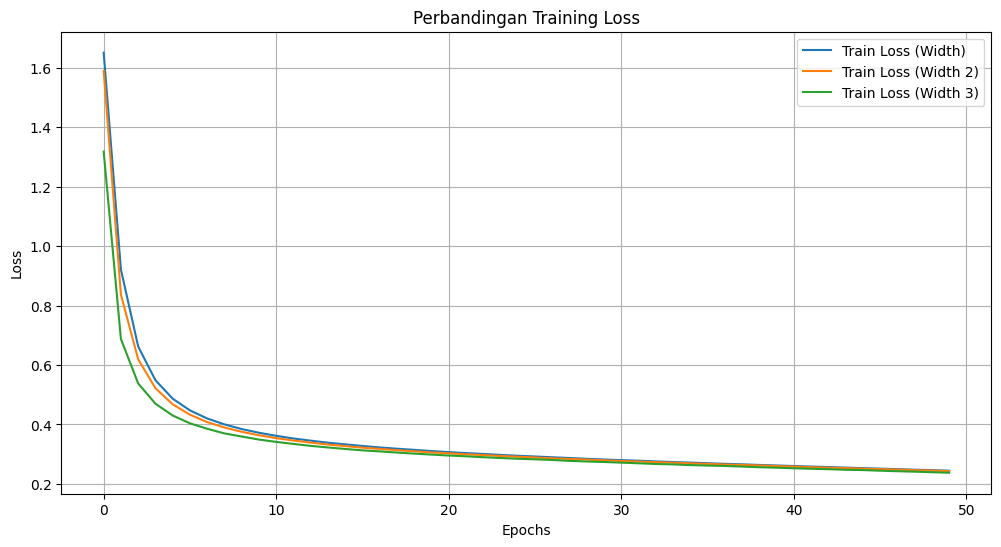

In [5]:
print("Training model width configurations 1")
model_width = NeuralNetwork(
    layer_sizes=[784, 256, 256, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width = model_width.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width = model_width.forward(X_test)
pred_classes_width = np.argmax(pred_width, axis=1)
accuracy_width = np.mean(pred_classes_width == y_test)
print(f"Test Accuracy (Width): {accuracy_width:.4f}\n")

print("Training model width configurations 2")
model_width_2 = NeuralNetwork(
    layer_sizes=[784, 512, 512, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_2 = model_width_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_2 = model_width_2.forward(X_test)
pred_classes_width_2 = np.argmax(pred_width_2, axis=1)
accuracy_width_2 = np.mean(pred_classes_width_2 == y_test)
print(f"Test Accuracy (Width 2): {accuracy_width_2:.4f}\n")

print("Training model width configurations 3")
model_width_3 = NeuralNetwork(
    layer_sizes=[784, 1024, 1024, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_3 = model_width_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_3 = model_width_3.forward(X_test)
pred_classes_width_3 = np.argmax(pred_width_3, axis=1)
accuracy_width_3 = np.mean(pred_classes_width_3 == y_test)
print(f"Test Accuracy (Width 3): {accuracy_width_3:.4f}")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["train_loss"], label="Train Loss (Width)"
)
plt.plot(
    history_width_2["train_loss"], label="Train Loss (Width 2)"
)
plt.plot(
    history_width_3["train_loss"], label="Train Loss (Width 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Pengaruh Fungsi Aktivasi Hidden Layer

Training model with activation linear


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2110.65it/s]


Epoch 1/50, Train Loss: 1.5971, Val Loss: 1.0414, Val Acc: 0.7372


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2359.50it/s]


Epoch 2/50, Train Loss: 0.8443, Val Loss: 0.7207, Val Acc: 0.8146


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2337.29it/s]


Epoch 3/50, Train Loss: 0.6370, Val Loss: 0.5914, Val Acc: 0.8454


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2065.16it/s]


Epoch 4/50, Train Loss: 0.5410, Val Loss: 0.5218, Val Acc: 0.8562


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2074.71it/s]


Epoch 5/50, Train Loss: 0.4845, Val Loss: 0.4771, Val Acc: 0.8682


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2200.19it/s]


Epoch 6/50, Train Loss: 0.4468, Val Loss: 0.4463, Val Acc: 0.8735


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2074.13it/s]


Epoch 7/50, Train Loss: 0.4200, Val Loss: 0.4236, Val Acc: 0.8786


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2214.08it/s]


Epoch 8/50, Train Loss: 0.3994, Val Loss: 0.4075, Val Acc: 0.8819


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1989.97it/s]


Epoch 9/50, Train Loss: 0.3835, Val Loss: 0.3916, Val Acc: 0.8868


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1864.07it/s]


Epoch 10/50, Train Loss: 0.3705, Val Loss: 0.3805, Val Acc: 0.8907


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1757.11it/s]


Epoch 11/50, Train Loss: 0.3599, Val Loss: 0.3707, Val Acc: 0.8912


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1773.63it/s]


Epoch 12/50, Train Loss: 0.3506, Val Loss: 0.3619, Val Acc: 0.8953


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1899.31it/s]


Epoch 13/50, Train Loss: 0.3428, Val Loss: 0.3555, Val Acc: 0.8973


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2052.09it/s]


Epoch 14/50, Train Loss: 0.3357, Val Loss: 0.3478, Val Acc: 0.9000


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1861.19it/s]


Epoch 15/50, Train Loss: 0.3297, Val Loss: 0.3418, Val Acc: 0.9018


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1871.21it/s]


Epoch 16/50, Train Loss: 0.3240, Val Loss: 0.3369, Val Acc: 0.9030


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2239.18it/s]


Epoch 17/50, Train Loss: 0.3189, Val Loss: 0.3324, Val Acc: 0.9041


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1829.36it/s]


Epoch 18/50, Train Loss: 0.3143, Val Loss: 0.3280, Val Acc: 0.9048


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2235.65it/s]


Epoch 19/50, Train Loss: 0.3101, Val Loss: 0.3260, Val Acc: 0.9045


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2192.74it/s]


Epoch 20/50, Train Loss: 0.3061, Val Loss: 0.3220, Val Acc: 0.9062


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2058.10it/s]


Epoch 21/50, Train Loss: 0.3023, Val Loss: 0.3183, Val Acc: 0.9074


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2170.01it/s]


Epoch 22/50, Train Loss: 0.2991, Val Loss: 0.3139, Val Acc: 0.9078


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2162.60it/s]


Epoch 23/50, Train Loss: 0.2957, Val Loss: 0.3108, Val Acc: 0.9094


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2109.64it/s]


Epoch 24/50, Train Loss: 0.2925, Val Loss: 0.3081, Val Acc: 0.9108


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2116.26it/s]


Epoch 25/50, Train Loss: 0.2894, Val Loss: 0.3049, Val Acc: 0.9115


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1765.83it/s]


Epoch 26/50, Train Loss: 0.2864, Val Loss: 0.3040, Val Acc: 0.9128


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2372.31it/s]


Epoch 27/50, Train Loss: 0.2837, Val Loss: 0.2993, Val Acc: 0.9122


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2160.07it/s]


Epoch 28/50, Train Loss: 0.2810, Val Loss: 0.2973, Val Acc: 0.9133


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2036.37it/s]


Epoch 29/50, Train Loss: 0.2783, Val Loss: 0.2949, Val Acc: 0.9142


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2180.14it/s]


Epoch 30/50, Train Loss: 0.2759, Val Loss: 0.2926, Val Acc: 0.9137


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2206.81it/s]


Epoch 31/50, Train Loss: 0.2735, Val Loss: 0.2908, Val Acc: 0.9144


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1972.89it/s]


Epoch 32/50, Train Loss: 0.2712, Val Loss: 0.2889, Val Acc: 0.9152


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2414.03it/s]


Epoch 33/50, Train Loss: 0.2689, Val Loss: 0.2855, Val Acc: 0.9171


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2174.26it/s]


Epoch 34/50, Train Loss: 0.2667, Val Loss: 0.2848, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2327.24it/s]


Epoch 35/50, Train Loss: 0.2646, Val Loss: 0.2818, Val Acc: 0.9183


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2188.54it/s]


Epoch 36/50, Train Loss: 0.2625, Val Loss: 0.2792, Val Acc: 0.9196


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2076.48it/s]


Epoch 37/50, Train Loss: 0.2605, Val Loss: 0.2778, Val Acc: 0.9202


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2234.04it/s]


Epoch 38/50, Train Loss: 0.2584, Val Loss: 0.2770, Val Acc: 0.9196


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2379.29it/s]


Epoch 39/50, Train Loss: 0.2568, Val Loss: 0.2746, Val Acc: 0.9199


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2073.42it/s]


Epoch 40/50, Train Loss: 0.2548, Val Loss: 0.2730, Val Acc: 0.9223


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2233.45it/s]


Epoch 41/50, Train Loss: 0.2528, Val Loss: 0.2709, Val Acc: 0.9221


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2058.17it/s]


Epoch 42/50, Train Loss: 0.2512, Val Loss: 0.2693, Val Acc: 0.9223


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1942.60it/s]


Epoch 43/50, Train Loss: 0.2492, Val Loss: 0.2683, Val Acc: 0.9239


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2141.39it/s]


Epoch 44/50, Train Loss: 0.2474, Val Loss: 0.2660, Val Acc: 0.9243


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2064.78it/s]


Epoch 45/50, Train Loss: 0.2460, Val Loss: 0.2654, Val Acc: 0.9231


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2276.77it/s]


Epoch 46/50, Train Loss: 0.2442, Val Loss: 0.2631, Val Acc: 0.9254


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2239.45it/s]


Epoch 47/50, Train Loss: 0.2426, Val Loss: 0.2617, Val Acc: 0.9250


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2044.42it/s]


Epoch 48/50, Train Loss: 0.2411, Val Loss: 0.2608, Val Acc: 0.9253


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2244.76it/s]


Epoch 49/50, Train Loss: 0.2395, Val Loss: 0.2589, Val Acc: 0.9255


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1902.75it/s]


Epoch 50/50, Train Loss: 0.2378, Val Loss: 0.2579, Val Acc: 0.9268
Test Accuracy (Activation linear): 0.9285

Training model with activation relu


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2011.32it/s]


Epoch 1/50, Train Loss: 1.9533, Val Loss: 1.4729, Val Acc: 0.6374


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2067.91it/s]


Epoch 2/50, Train Loss: 1.1982, Val Loss: 0.9775, Val Acc: 0.7746


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1789.17it/s]


Epoch 3/50, Train Loss: 0.8474, Val Loss: 0.7442, Val Acc: 0.8171


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2144.83it/s]


Epoch 4/50, Train Loss: 0.6756, Val Loss: 0.6220, Val Acc: 0.8401


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2095.75it/s]


Epoch 5/50, Train Loss: 0.5806, Val Loss: 0.5504, Val Acc: 0.8494


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2128.81it/s]


Epoch 6/50, Train Loss: 0.5207, Val Loss: 0.5018, Val Acc: 0.8592


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1994.53it/s]


Epoch 7/50, Train Loss: 0.4793, Val Loss: 0.4674, Val Acc: 0.8687


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2251.69it/s]


Epoch 8/50, Train Loss: 0.4491, Val Loss: 0.4421, Val Acc: 0.8732


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1852.78it/s]


Epoch 9/50, Train Loss: 0.4259, Val Loss: 0.4210, Val Acc: 0.8787


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2146.65it/s]


Epoch 10/50, Train Loss: 0.4076, Val Loss: 0.4058, Val Acc: 0.8813


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2018.46it/s]


Epoch 11/50, Train Loss: 0.3925, Val Loss: 0.3926, Val Acc: 0.8847


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2132.99it/s]


Epoch 12/50, Train Loss: 0.3803, Val Loss: 0.3816, Val Acc: 0.8888


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2230.43it/s]


Epoch 13/50, Train Loss: 0.3697, Val Loss: 0.3731, Val Acc: 0.8878


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2147.98it/s]


Epoch 14/50, Train Loss: 0.3606, Val Loss: 0.3641, Val Acc: 0.8925


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2194.42it/s]


Epoch 15/50, Train Loss: 0.3527, Val Loss: 0.3576, Val Acc: 0.8929


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2124.00it/s]


Epoch 16/50, Train Loss: 0.3458, Val Loss: 0.3521, Val Acc: 0.8946


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1720.76it/s]


Epoch 17/50, Train Loss: 0.3396, Val Loss: 0.3450, Val Acc: 0.8972


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1941.17it/s]


Epoch 18/50, Train Loss: 0.3337, Val Loss: 0.3412, Val Acc: 0.8988


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2320.40it/s]


Epoch 19/50, Train Loss: 0.3285, Val Loss: 0.3365, Val Acc: 0.9004


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2148.34it/s]


Epoch 20/50, Train Loss: 0.3237, Val Loss: 0.3315, Val Acc: 0.9005


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1967.29it/s]


Epoch 21/50, Train Loss: 0.3193, Val Loss: 0.3281, Val Acc: 0.9019


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2013.88it/s]


Epoch 22/50, Train Loss: 0.3153, Val Loss: 0.3241, Val Acc: 0.9033


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2083.05it/s]


Epoch 23/50, Train Loss: 0.3114, Val Loss: 0.3212, Val Acc: 0.9033


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2200.80it/s]


Epoch 24/50, Train Loss: 0.3077, Val Loss: 0.3179, Val Acc: 0.9037


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2215.42it/s]


Epoch 25/50, Train Loss: 0.3043, Val Loss: 0.3143, Val Acc: 0.9062


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2071.08it/s]


Epoch 26/50, Train Loss: 0.3007, Val Loss: 0.3118, Val Acc: 0.9063


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2074.07it/s]


Epoch 27/50, Train Loss: 0.2977, Val Loss: 0.3083, Val Acc: 0.9071


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2086.16it/s]


Epoch 28/50, Train Loss: 0.2948, Val Loss: 0.3065, Val Acc: 0.9089


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2072.99it/s]


Epoch 29/50, Train Loss: 0.2916, Val Loss: 0.3035, Val Acc: 0.9095


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2093.73it/s]


Epoch 30/50, Train Loss: 0.2889, Val Loss: 0.3013, Val Acc: 0.9101


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2012.10it/s]


Epoch 31/50, Train Loss: 0.2862, Val Loss: 0.2986, Val Acc: 0.9100


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1952.31it/s]


Epoch 32/50, Train Loss: 0.2832, Val Loss: 0.2974, Val Acc: 0.9124


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1945.17it/s]


Epoch 33/50, Train Loss: 0.2808, Val Loss: 0.2949, Val Acc: 0.9124


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2238.58it/s]


Epoch 34/50, Train Loss: 0.2783, Val Loss: 0.2921, Val Acc: 0.9131


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2054.27it/s]


Epoch 35/50, Train Loss: 0.2758, Val Loss: 0.2894, Val Acc: 0.9142


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1857.89it/s]


Epoch 36/50, Train Loss: 0.2733, Val Loss: 0.2876, Val Acc: 0.9171


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2194.00it/s]


Epoch 37/50, Train Loss: 0.2708, Val Loss: 0.2862, Val Acc: 0.9161


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2069.46it/s]


Epoch 38/50, Train Loss: 0.2684, Val Loss: 0.2846, Val Acc: 0.9171


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2055.90it/s]


Epoch 39/50, Train Loss: 0.2662, Val Loss: 0.2817, Val Acc: 0.9180


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1906.47it/s]


Epoch 40/50, Train Loss: 0.2640, Val Loss: 0.2797, Val Acc: 0.9190


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1962.38it/s]


Epoch 41/50, Train Loss: 0.2617, Val Loss: 0.2779, Val Acc: 0.9192


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2190.31it/s]


Epoch 42/50, Train Loss: 0.2597, Val Loss: 0.2753, Val Acc: 0.9196


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1999.93it/s]


Epoch 43/50, Train Loss: 0.2575, Val Loss: 0.2737, Val Acc: 0.9209


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1941.80it/s]


Epoch 44/50, Train Loss: 0.2554, Val Loss: 0.2719, Val Acc: 0.9214


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2114.25it/s]


Epoch 45/50, Train Loss: 0.2534, Val Loss: 0.2704, Val Acc: 0.9221


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1719.49it/s]


Epoch 46/50, Train Loss: 0.2513, Val Loss: 0.2680, Val Acc: 0.9227


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2032.24it/s]


Epoch 47/50, Train Loss: 0.2493, Val Loss: 0.2663, Val Acc: 0.9235


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1973.58it/s]


Epoch 48/50, Train Loss: 0.2471, Val Loss: 0.2646, Val Acc: 0.9238


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1768.43it/s]


Epoch 49/50, Train Loss: 0.2451, Val Loss: 0.2636, Val Acc: 0.9234


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2197.28it/s]


Epoch 50/50, Train Loss: 0.2433, Val Loss: 0.2611, Val Acc: 0.9245
Test Accuracy (Activation relu): 0.9250

Training model with activation sigmoid


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1655.65it/s]


Epoch 1/50, Train Loss: 2.5163, Val Loss: 2.2105, Val Acc: 0.3111


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1668.96it/s]


Epoch 2/50, Train Loss: 2.1574, Val Loss: 2.1004, Val Acc: 0.4752


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1971.26it/s]


Epoch 3/50, Train Loss: 2.0384, Val Loss: 1.9725, Val Acc: 0.5725


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2087.86it/s]


Epoch 4/50, Train Loss: 1.9019, Val Loss: 1.8260, Val Acc: 0.6688


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1523.24it/s]


Epoch 5/50, Train Loss: 1.7457, Val Loss: 1.6606, Val Acc: 0.6861


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1558.55it/s]


Epoch 6/50, Train Loss: 1.5747, Val Loss: 1.4878, Val Acc: 0.7270


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1682.91it/s]


Epoch 7/50, Train Loss: 1.4029, Val Loss: 1.3217, Val Acc: 0.7585


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1800.16it/s]


Epoch 8/50, Train Loss: 1.2449, Val Loss: 1.1753, Val Acc: 0.7671


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1877.99it/s]


Epoch 9/50, Train Loss: 1.1095, Val Loss: 1.0529, Val Acc: 0.7814


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1656.08it/s]


Epoch 10/50, Train Loss: 0.9983, Val Loss: 0.9540, Val Acc: 0.7955


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1865.61it/s]


Epoch 11/50, Train Loss: 0.9081, Val Loss: 0.8741, Val Acc: 0.8062


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1726.50it/s]


Epoch 12/50, Train Loss: 0.8349, Val Loss: 0.8093, Val Acc: 0.8173


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1880.12it/s]


Epoch 13/50, Train Loss: 0.7751, Val Loss: 0.7556, Val Acc: 0.8237


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1754.09it/s]


Epoch 14/50, Train Loss: 0.7256, Val Loss: 0.7111, Val Acc: 0.8280


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1652.94it/s]


Epoch 15/50, Train Loss: 0.6841, Val Loss: 0.6732, Val Acc: 0.8364


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1922.98it/s]


Epoch 16/50, Train Loss: 0.6487, Val Loss: 0.6406, Val Acc: 0.8416


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1641.33it/s]


Epoch 17/50, Train Loss: 0.6182, Val Loss: 0.6128, Val Acc: 0.8449


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1759.80it/s]


Epoch 18/50, Train Loss: 0.5918, Val Loss: 0.5885, Val Acc: 0.8515


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1897.49it/s]


Epoch 19/50, Train Loss: 0.5686, Val Loss: 0.5672, Val Acc: 0.8537


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1797.79it/s]


Epoch 20/50, Train Loss: 0.5482, Val Loss: 0.5486, Val Acc: 0.8576


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1759.30it/s]


Epoch 21/50, Train Loss: 0.5301, Val Loss: 0.5311, Val Acc: 0.8618


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1848.45it/s]


Epoch 22/50, Train Loss: 0.5142, Val Loss: 0.5168, Val Acc: 0.8643


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1595.37it/s]


Epoch 23/50, Train Loss: 0.4999, Val Loss: 0.5029, Val Acc: 0.8652


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1821.56it/s]


Epoch 24/50, Train Loss: 0.4871, Val Loss: 0.4912, Val Acc: 0.8678


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1717.05it/s]


Epoch 25/50, Train Loss: 0.4755, Val Loss: 0.4805, Val Acc: 0.8705


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1672.69it/s]


Epoch 26/50, Train Loss: 0.4652, Val Loss: 0.4703, Val Acc: 0.8715


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1740.38it/s]


Epoch 27/50, Train Loss: 0.4556, Val Loss: 0.4616, Val Acc: 0.8723


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1667.65it/s]


Epoch 28/50, Train Loss: 0.4470, Val Loss: 0.4532, Val Acc: 0.8746


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1830.68it/s]


Epoch 29/50, Train Loss: 0.4391, Val Loss: 0.4462, Val Acc: 0.8763


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1830.75it/s]


Epoch 30/50, Train Loss: 0.4319, Val Loss: 0.4389, Val Acc: 0.8779


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1791.29it/s]


Epoch 31/50, Train Loss: 0.4252, Val Loss: 0.4328, Val Acc: 0.8781


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1815.99it/s]


Epoch 32/50, Train Loss: 0.4189, Val Loss: 0.4274, Val Acc: 0.8793


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1655.39it/s]


Epoch 33/50, Train Loss: 0.4131, Val Loss: 0.4215, Val Acc: 0.8809


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1496.36it/s]


Epoch 34/50, Train Loss: 0.4079, Val Loss: 0.4162, Val Acc: 0.8821


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1871.24it/s]


Epoch 35/50, Train Loss: 0.4028, Val Loss: 0.4118, Val Acc: 0.8831


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1684.56it/s]


Epoch 36/50, Train Loss: 0.3983, Val Loss: 0.4073, Val Acc: 0.8842


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1792.86it/s]


Epoch 37/50, Train Loss: 0.3940, Val Loss: 0.4030, Val Acc: 0.8862


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1480.46it/s]


Epoch 38/50, Train Loss: 0.3898, Val Loss: 0.3990, Val Acc: 0.8863


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1729.44it/s]


Epoch 39/50, Train Loss: 0.3859, Val Loss: 0.3958, Val Acc: 0.8875


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1588.21it/s]


Epoch 40/50, Train Loss: 0.3823, Val Loss: 0.3929, Val Acc: 0.8875


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1809.44it/s]


Epoch 41/50, Train Loss: 0.3789, Val Loss: 0.3889, Val Acc: 0.8888


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1826.15it/s]


Epoch 42/50, Train Loss: 0.3756, Val Loss: 0.3859, Val Acc: 0.8891


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1718.56it/s]


Epoch 43/50, Train Loss: 0.3725, Val Loss: 0.3829, Val Acc: 0.8897


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1679.88it/s]


Epoch 44/50, Train Loss: 0.3695, Val Loss: 0.3805, Val Acc: 0.8903


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1749.40it/s]


Epoch 45/50, Train Loss: 0.3667, Val Loss: 0.3773, Val Acc: 0.8912


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1674.21it/s]


Epoch 46/50, Train Loss: 0.3641, Val Loss: 0.3746, Val Acc: 0.8922


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1738.78it/s]


Epoch 47/50, Train Loss: 0.3615, Val Loss: 0.3720, Val Acc: 0.8921


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1842.35it/s]


Epoch 48/50, Train Loss: 0.3590, Val Loss: 0.3696, Val Acc: 0.8930


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1828.42it/s]


Epoch 49/50, Train Loss: 0.3567, Val Loss: 0.3674, Val Acc: 0.8931


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1679.86it/s]


Epoch 50/50, Train Loss: 0.3544, Val Loss: 0.3653, Val Acc: 0.8932
Test Accuracy (Activation sigmoid): 0.8981

Training model with activation tanh


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1999.52it/s]


Epoch 1/50, Train Loss: 2.0896, Val Loss: 1.5765, Val Acc: 0.6288


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1937.96it/s]


Epoch 2/50, Train Loss: 1.3038, Val Loss: 1.0761, Val Acc: 0.7691


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1920.03it/s]


Epoch 3/50, Train Loss: 0.9293, Val Loss: 0.8148, Val Acc: 0.8186


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1956.12it/s]


Epoch 4/50, Train Loss: 0.7316, Val Loss: 0.6729, Val Acc: 0.8397


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1838.61it/s]


Epoch 5/50, Train Loss: 0.6194, Val Loss: 0.5875, Val Acc: 0.8540


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1924.10it/s]


Epoch 6/50, Train Loss: 0.5487, Val Loss: 0.5313, Val Acc: 0.8639


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1849.73it/s]


Epoch 7/50, Train Loss: 0.5004, Val Loss: 0.4914, Val Acc: 0.8721


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1809.69it/s]


Epoch 8/50, Train Loss: 0.4654, Val Loss: 0.4616, Val Acc: 0.8780


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1888.66it/s]


Epoch 9/50, Train Loss: 0.4385, Val Loss: 0.4387, Val Acc: 0.8808


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1895.46it/s]


Epoch 10/50, Train Loss: 0.4174, Val Loss: 0.4202, Val Acc: 0.8863


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1846.01it/s]


Epoch 11/50, Train Loss: 0.4000, Val Loss: 0.4048, Val Acc: 0.8892


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1825.81it/s]


Epoch 12/50, Train Loss: 0.3854, Val Loss: 0.3918, Val Acc: 0.8918


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1554.47it/s]


Epoch 13/50, Train Loss: 0.3732, Val Loss: 0.3806, Val Acc: 0.8939


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1983.72it/s]


Epoch 14/50, Train Loss: 0.3625, Val Loss: 0.3714, Val Acc: 0.8957


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2047.13it/s]


Epoch 15/50, Train Loss: 0.3533, Val Loss: 0.3630, Val Acc: 0.8984


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1983.58it/s]


Epoch 16/50, Train Loss: 0.3451, Val Loss: 0.3558, Val Acc: 0.8993


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1625.79it/s]


Epoch 17/50, Train Loss: 0.3379, Val Loss: 0.3487, Val Acc: 0.9012


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1872.45it/s]


Epoch 18/50, Train Loss: 0.3313, Val Loss: 0.3426, Val Acc: 0.9032


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1884.13it/s]


Epoch 19/50, Train Loss: 0.3252, Val Loss: 0.3369, Val Acc: 0.9034


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1841.80it/s]


Epoch 20/50, Train Loss: 0.3197, Val Loss: 0.3319, Val Acc: 0.9048


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1733.53it/s]


Epoch 21/50, Train Loss: 0.3146, Val Loss: 0.3274, Val Acc: 0.9064


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2180.06it/s]


Epoch 22/50, Train Loss: 0.3099, Val Loss: 0.3235, Val Acc: 0.9067


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2030.23it/s]


Epoch 23/50, Train Loss: 0.3056, Val Loss: 0.3192, Val Acc: 0.9084


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1877.89it/s]


Epoch 24/50, Train Loss: 0.3015, Val Loss: 0.3149, Val Acc: 0.9095


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1985.85it/s]


Epoch 25/50, Train Loss: 0.2975, Val Loss: 0.3117, Val Acc: 0.9096


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2008.83it/s]


Epoch 26/50, Train Loss: 0.2938, Val Loss: 0.3083, Val Acc: 0.9114


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1852.61it/s]


Epoch 27/50, Train Loss: 0.2903, Val Loss: 0.3051, Val Acc: 0.9112


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1866.48it/s]


Epoch 28/50, Train Loss: 0.2869, Val Loss: 0.3019, Val Acc: 0.9129


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1969.13it/s]


Epoch 29/50, Train Loss: 0.2837, Val Loss: 0.2993, Val Acc: 0.9123


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1700.09it/s]


Epoch 30/50, Train Loss: 0.2806, Val Loss: 0.2967, Val Acc: 0.9146


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1838.54it/s]


Epoch 31/50, Train Loss: 0.2778, Val Loss: 0.2933, Val Acc: 0.9140


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1945.15it/s]


Epoch 32/50, Train Loss: 0.2749, Val Loss: 0.2906, Val Acc: 0.9153


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2046.44it/s]


Epoch 33/50, Train Loss: 0.2721, Val Loss: 0.2883, Val Acc: 0.9158


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1892.40it/s]


Epoch 34/50, Train Loss: 0.2694, Val Loss: 0.2859, Val Acc: 0.9163


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1770.04it/s]


Epoch 35/50, Train Loss: 0.2668, Val Loss: 0.2832, Val Acc: 0.9170


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1889.68it/s]


Epoch 36/50, Train Loss: 0.2643, Val Loss: 0.2813, Val Acc: 0.9179


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1991.61it/s]


Epoch 37/50, Train Loss: 0.2619, Val Loss: 0.2788, Val Acc: 0.9189


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1989.83it/s]


Epoch 38/50, Train Loss: 0.2594, Val Loss: 0.2765, Val Acc: 0.9197


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1727.76it/s]


Epoch 39/50, Train Loss: 0.2571, Val Loss: 0.2742, Val Acc: 0.9202


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2056.32it/s]


Epoch 40/50, Train Loss: 0.2547, Val Loss: 0.2725, Val Acc: 0.9196


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2104.32it/s]


Epoch 41/50, Train Loss: 0.2525, Val Loss: 0.2704, Val Acc: 0.9205


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1849.28it/s]


Epoch 42/50, Train Loss: 0.2504, Val Loss: 0.2681, Val Acc: 0.9214


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1905.30it/s]


Epoch 43/50, Train Loss: 0.2482, Val Loss: 0.2664, Val Acc: 0.9224


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1884.11it/s]


Epoch 44/50, Train Loss: 0.2462, Val Loss: 0.2646, Val Acc: 0.9231


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1864.95it/s]


Epoch 45/50, Train Loss: 0.2441, Val Loss: 0.2624, Val Acc: 0.9229


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1900.47it/s]


Epoch 46/50, Train Loss: 0.2421, Val Loss: 0.2607, Val Acc: 0.9236


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2009.09it/s]


Epoch 47/50, Train Loss: 0.2401, Val Loss: 0.2591, Val Acc: 0.9243


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1893.66it/s]


Epoch 48/50, Train Loss: 0.2381, Val Loss: 0.2576, Val Acc: 0.9242


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1791.18it/s]


Epoch 49/50, Train Loss: 0.2362, Val Loss: 0.2551, Val Acc: 0.9255


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1856.71it/s]


Epoch 50/50, Train Loss: 0.2341, Val Loss: 0.2539, Val Acc: 0.9257
Test Accuracy (Activation tanh): 0.9294

Training model with activation swish


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1742.32it/s]


Epoch 1/50, Train Loss: 1.8133, Val Loss: 1.3080, Val Acc: 0.7129


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1573.37it/s]


Epoch 2/50, Train Loss: 1.0595, Val Loss: 0.8790, Val Acc: 0.8018


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1795.00it/s]


Epoch 3/50, Train Loss: 0.7641, Val Loss: 0.6867, Val Acc: 0.8291


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1615.91it/s]


Epoch 4/50, Train Loss: 0.6218, Val Loss: 0.5837, Val Acc: 0.8466


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1923.36it/s]


Epoch 5/50, Train Loss: 0.5411, Val Loss: 0.5218, Val Acc: 0.8599


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1747.39it/s]


Epoch 6/50, Train Loss: 0.4894, Val Loss: 0.4803, Val Acc: 0.8688


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1685.07it/s]


Epoch 7/50, Train Loss: 0.4536, Val Loss: 0.4501, Val Acc: 0.8755


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1907.29it/s]


Epoch 8/50, Train Loss: 0.4273, Val Loss: 0.4279, Val Acc: 0.8825


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1715.74it/s]


Epoch 9/50, Train Loss: 0.4073, Val Loss: 0.4108, Val Acc: 0.8846


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1876.80it/s]


Epoch 10/50, Train Loss: 0.3915, Val Loss: 0.3975, Val Acc: 0.8864


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1972.16it/s]


Epoch 11/50, Train Loss: 0.3786, Val Loss: 0.3860, Val Acc: 0.8896


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1640.97it/s]


Epoch 12/50, Train Loss: 0.3681, Val Loss: 0.3759, Val Acc: 0.8912


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1922.29it/s]


Epoch 13/50, Train Loss: 0.3588, Val Loss: 0.3670, Val Acc: 0.8945


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1681.20it/s]


Epoch 14/50, Train Loss: 0.3508, Val Loss: 0.3598, Val Acc: 0.8973


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1691.21it/s]


Epoch 15/50, Train Loss: 0.3439, Val Loss: 0.3548, Val Acc: 0.8966


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1854.95it/s]


Epoch 16/50, Train Loss: 0.3380, Val Loss: 0.3482, Val Acc: 0.8991


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1925.51it/s]


Epoch 17/50, Train Loss: 0.3326, Val Loss: 0.3431, Val Acc: 0.9000


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1955.63it/s]


Epoch 18/50, Train Loss: 0.3277, Val Loss: 0.3389, Val Acc: 0.9013


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1890.29it/s]


Epoch 19/50, Train Loss: 0.3231, Val Loss: 0.3349, Val Acc: 0.9026


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1780.08it/s]


Epoch 20/50, Train Loss: 0.3190, Val Loss: 0.3303, Val Acc: 0.9032


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1901.84it/s]


Epoch 21/50, Train Loss: 0.3151, Val Loss: 0.3288, Val Acc: 0.9046


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1865.15it/s]


Epoch 22/50, Train Loss: 0.3116, Val Loss: 0.3240, Val Acc: 0.9042


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1783.41it/s]


Epoch 23/50, Train Loss: 0.3084, Val Loss: 0.3214, Val Acc: 0.9062


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1944.54it/s]


Epoch 24/50, Train Loss: 0.3051, Val Loss: 0.3176, Val Acc: 0.9072


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1885.77it/s]


Epoch 25/50, Train Loss: 0.3022, Val Loss: 0.3156, Val Acc: 0.9085


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1722.85it/s]


Epoch 26/50, Train Loss: 0.2996, Val Loss: 0.3123, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1794.15it/s]


Epoch 27/50, Train Loss: 0.2968, Val Loss: 0.3109, Val Acc: 0.9099


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1951.03it/s]


Epoch 28/50, Train Loss: 0.2943, Val Loss: 0.3087, Val Acc: 0.9105


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1565.19it/s]


Epoch 29/50, Train Loss: 0.2917, Val Loss: 0.3066, Val Acc: 0.9113


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1929.67it/s]


Epoch 30/50, Train Loss: 0.2895, Val Loss: 0.3038, Val Acc: 0.9122


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1840.57it/s]


Epoch 31/50, Train Loss: 0.2871, Val Loss: 0.3025, Val Acc: 0.9111


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1822.72it/s]


Epoch 32/50, Train Loss: 0.2849, Val Loss: 0.3007, Val Acc: 0.9126


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1659.65it/s]


Epoch 33/50, Train Loss: 0.2829, Val Loss: 0.2983, Val Acc: 0.9135


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1973.50it/s]


Epoch 34/50, Train Loss: 0.2806, Val Loss: 0.2976, Val Acc: 0.9137


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1705.36it/s]


Epoch 35/50, Train Loss: 0.2789, Val Loss: 0.2949, Val Acc: 0.9141


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1775.33it/s]


Epoch 36/50, Train Loss: 0.2768, Val Loss: 0.2927, Val Acc: 0.9151


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1843.00it/s]


Epoch 37/50, Train Loss: 0.2750, Val Loss: 0.2907, Val Acc: 0.9161


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1874.53it/s]


Epoch 38/50, Train Loss: 0.2731, Val Loss: 0.2893, Val Acc: 0.9163


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1634.45it/s]


Epoch 39/50, Train Loss: 0.2713, Val Loss: 0.2880, Val Acc: 0.9175


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1883.98it/s]


Epoch 40/50, Train Loss: 0.2694, Val Loss: 0.2863, Val Acc: 0.9178


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1610.27it/s]


Epoch 41/50, Train Loss: 0.2677, Val Loss: 0.2853, Val Acc: 0.9172


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1808.15it/s]


Epoch 42/50, Train Loss: 0.2660, Val Loss: 0.2840, Val Acc: 0.9176


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1835.89it/s]


Epoch 43/50, Train Loss: 0.2642, Val Loss: 0.2818, Val Acc: 0.9196


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1869.45it/s]


Epoch 44/50, Train Loss: 0.2626, Val Loss: 0.2801, Val Acc: 0.9202


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1840.80it/s]


Epoch 45/50, Train Loss: 0.2610, Val Loss: 0.2794, Val Acc: 0.9186


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1861.68it/s]


Epoch 46/50, Train Loss: 0.2594, Val Loss: 0.2774, Val Acc: 0.9198


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1802.65it/s]


Epoch 47/50, Train Loss: 0.2577, Val Loss: 0.2764, Val Acc: 0.9197


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1829.67it/s]


Epoch 48/50, Train Loss: 0.2562, Val Loss: 0.2751, Val Acc: 0.9203


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1942.60it/s]


Epoch 49/50, Train Loss: 0.2544, Val Loss: 0.2733, Val Acc: 0.9207


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1840.04it/s]


Epoch 50/50, Train Loss: 0.2530, Val Loss: 0.2723, Val Acc: 0.9208
Test Accuracy (Activation swish): 0.9244

Training model with activation gelu


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1492.44it/s]


Epoch 1/50, Train Loss: 1.8677, Val Loss: 1.4027, Val Acc: 0.6713


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1340.59it/s]


Epoch 2/50, Train Loss: 1.1163, Val Loss: 0.9072, Val Acc: 0.7916


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1378.91it/s]


Epoch 3/50, Train Loss: 0.7780, Val Loss: 0.6915, Val Acc: 0.8277


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1393.02it/s]


Epoch 4/50, Train Loss: 0.6213, Val Loss: 0.5826, Val Acc: 0.8476


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1442.06it/s]


Epoch 5/50, Train Loss: 0.5364, Val Loss: 0.5171, Val Acc: 0.8588


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1403.24it/s]


Epoch 6/50, Train Loss: 0.4842, Val Loss: 0.4758, Val Acc: 0.8675


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1329.82it/s]


Epoch 7/50, Train Loss: 0.4486, Val Loss: 0.4467, Val Acc: 0.8724


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1500.01it/s]


Epoch 8/50, Train Loss: 0.4231, Val Loss: 0.4256, Val Acc: 0.8762


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1367.91it/s]


Epoch 9/50, Train Loss: 0.4034, Val Loss: 0.4091, Val Acc: 0.8805


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1293.49it/s]


Epoch 10/50, Train Loss: 0.3880, Val Loss: 0.3940, Val Acc: 0.8846


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1300.29it/s]


Epoch 11/50, Train Loss: 0.3754, Val Loss: 0.3833, Val Acc: 0.8883


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1436.04it/s]


Epoch 12/50, Train Loss: 0.3649, Val Loss: 0.3737, Val Acc: 0.8891


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1298.67it/s]


Epoch 13/50, Train Loss: 0.3559, Val Loss: 0.3661, Val Acc: 0.8912


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1272.94it/s]


Epoch 14/50, Train Loss: 0.3483, Val Loss: 0.3583, Val Acc: 0.8944


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1484.27it/s]


Epoch 15/50, Train Loss: 0.3413, Val Loss: 0.3527, Val Acc: 0.8955


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1329.13it/s]


Epoch 16/50, Train Loss: 0.3353, Val Loss: 0.3462, Val Acc: 0.8978


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1235.99it/s]


Epoch 17/50, Train Loss: 0.3296, Val Loss: 0.3414, Val Acc: 0.8981


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1384.89it/s]


Epoch 18/50, Train Loss: 0.3246, Val Loss: 0.3369, Val Acc: 0.8995


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1300.09it/s]


Epoch 19/50, Train Loss: 0.3200, Val Loss: 0.3329, Val Acc: 0.9007


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1341.88it/s]


Epoch 20/50, Train Loss: 0.3158, Val Loss: 0.3287, Val Acc: 0.9029


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1413.84it/s]


Epoch 21/50, Train Loss: 0.3118, Val Loss: 0.3250, Val Acc: 0.9029


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1430.33it/s]


Epoch 22/50, Train Loss: 0.3079, Val Loss: 0.3216, Val Acc: 0.9034


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1409.49it/s]


Epoch 23/50, Train Loss: 0.3045, Val Loss: 0.3183, Val Acc: 0.9053


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1388.93it/s]


Epoch 24/50, Train Loss: 0.3012, Val Loss: 0.3152, Val Acc: 0.9047


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1452.40it/s]


Epoch 25/50, Train Loss: 0.2980, Val Loss: 0.3124, Val Acc: 0.9054


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1474.89it/s]


Epoch 26/50, Train Loss: 0.2950, Val Loss: 0.3098, Val Acc: 0.9072


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1365.07it/s]


Epoch 27/50, Train Loss: 0.2921, Val Loss: 0.3064, Val Acc: 0.9082


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1356.12it/s]


Epoch 28/50, Train Loss: 0.2892, Val Loss: 0.3044, Val Acc: 0.9086


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1409.78it/s]


Epoch 29/50, Train Loss: 0.2864, Val Loss: 0.3019, Val Acc: 0.9112


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1302.50it/s]


Epoch 30/50, Train Loss: 0.2838, Val Loss: 0.2999, Val Acc: 0.9116


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1402.87it/s]


Epoch 31/50, Train Loss: 0.2814, Val Loss: 0.2960, Val Acc: 0.9115


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1394.96it/s]


Epoch 32/50, Train Loss: 0.2787, Val Loss: 0.2945, Val Acc: 0.9132


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1361.84it/s]


Epoch 33/50, Train Loss: 0.2764, Val Loss: 0.2917, Val Acc: 0.9127


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1340.15it/s]


Epoch 34/50, Train Loss: 0.2738, Val Loss: 0.2906, Val Acc: 0.9118


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1293.32it/s]


Epoch 35/50, Train Loss: 0.2716, Val Loss: 0.2881, Val Acc: 0.9163


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1383.51it/s]


Epoch 36/50, Train Loss: 0.2693, Val Loss: 0.2852, Val Acc: 0.9157


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1353.60it/s]


Epoch 37/50, Train Loss: 0.2670, Val Loss: 0.2830, Val Acc: 0.9173


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1385.32it/s]


Epoch 38/50, Train Loss: 0.2647, Val Loss: 0.2815, Val Acc: 0.9154


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1311.88it/s]


Epoch 39/50, Train Loss: 0.2627, Val Loss: 0.2787, Val Acc: 0.9183


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1291.99it/s]


Epoch 40/50, Train Loss: 0.2603, Val Loss: 0.2770, Val Acc: 0.9183


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1436.66it/s]


Epoch 41/50, Train Loss: 0.2581, Val Loss: 0.2750, Val Acc: 0.9196


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1329.97it/s]


Epoch 42/50, Train Loss: 0.2561, Val Loss: 0.2726, Val Acc: 0.9201


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1293.04it/s]


Epoch 43/50, Train Loss: 0.2540, Val Loss: 0.2707, Val Acc: 0.9221


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1226.36it/s]


Epoch 44/50, Train Loss: 0.2519, Val Loss: 0.2696, Val Acc: 0.9213


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1312.24it/s]


Epoch 45/50, Train Loss: 0.2500, Val Loss: 0.2673, Val Acc: 0.9218


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1258.76it/s]


Epoch 46/50, Train Loss: 0.2478, Val Loss: 0.2655, Val Acc: 0.9239


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1305.82it/s]


Epoch 47/50, Train Loss: 0.2459, Val Loss: 0.2636, Val Acc: 0.9244


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1329.00it/s]


Epoch 48/50, Train Loss: 0.2440, Val Loss: 0.2618, Val Acc: 0.9245


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1386.65it/s]


Epoch 49/50, Train Loss: 0.2420, Val Loss: 0.2605, Val Acc: 0.9244


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1361.56it/s]


Epoch 50/50, Train Loss: 0.2400, Val Loss: 0.2577, Val Acc: 0.9249
Test Accuracy (Activation gelu): 0.9275



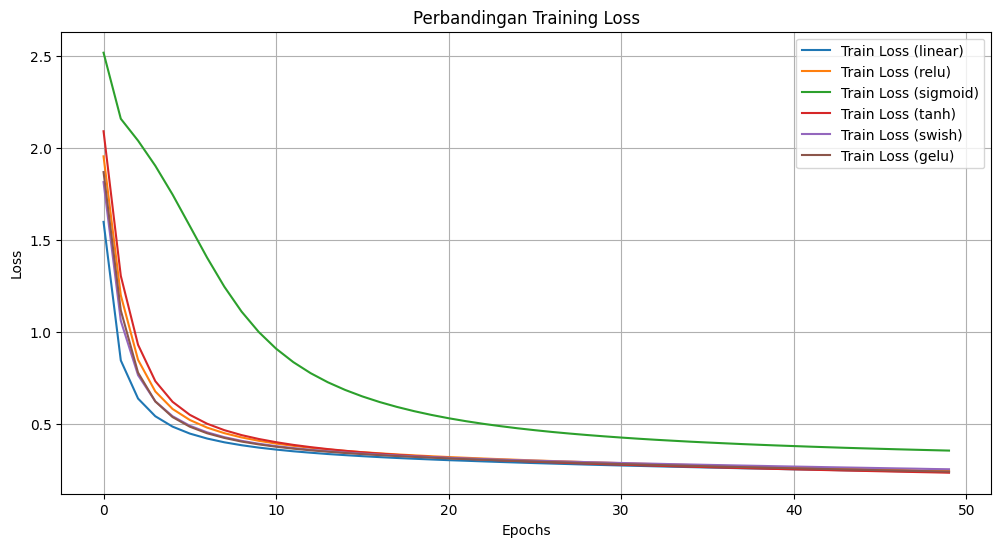


--- Individual Weight Distributions ---

Weight Distribution for linear activation:


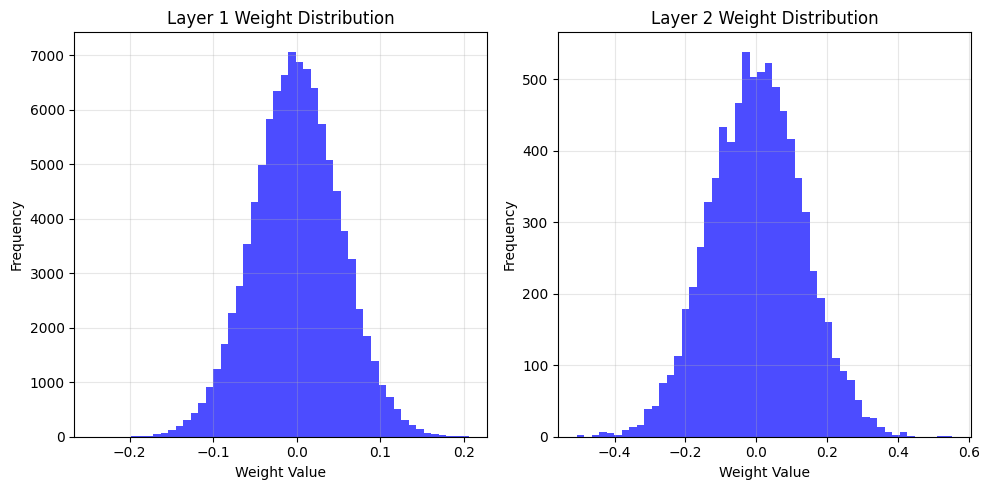


Weight Distribution for relu activation:


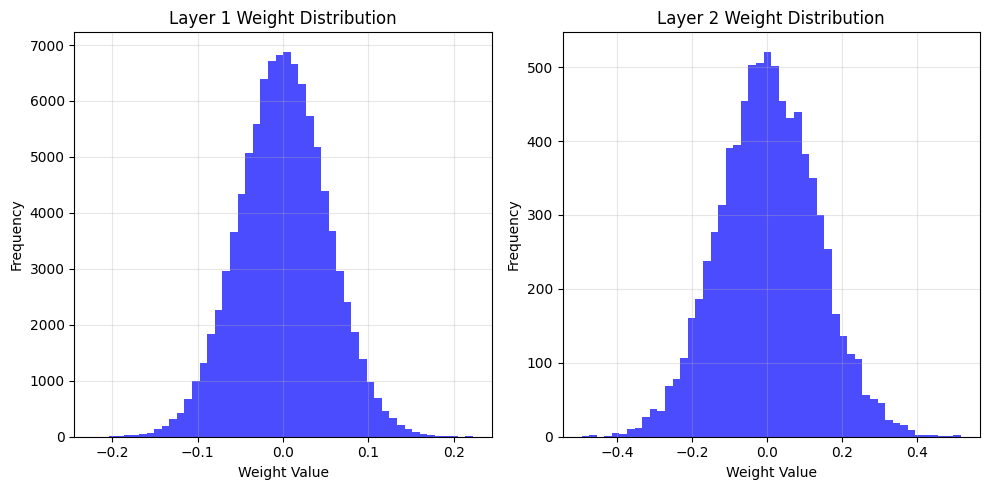


Weight Distribution for sigmoid activation:


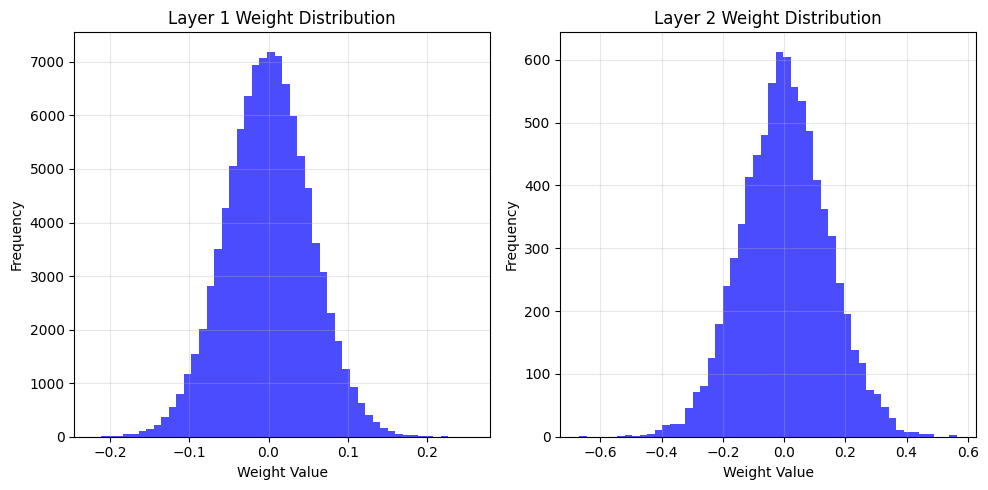


Weight Distribution for tanh activation:


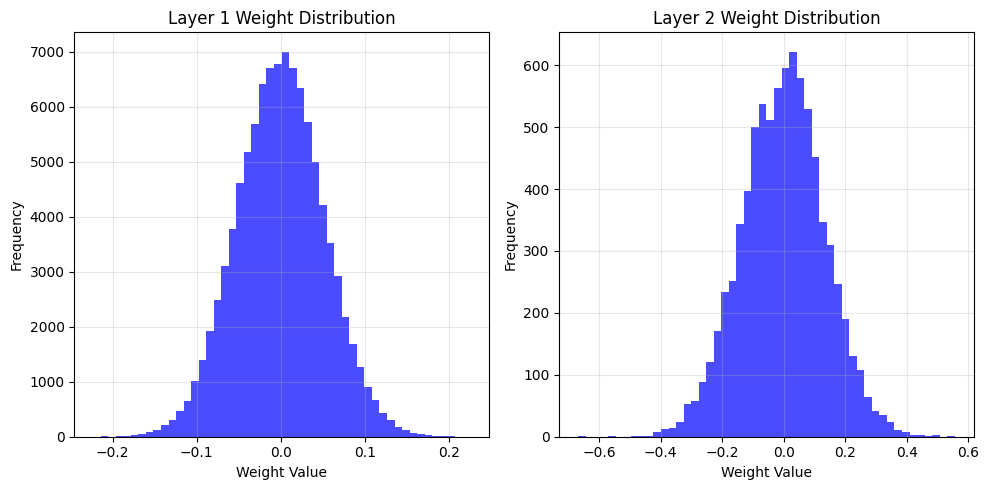


Weight Distribution for swish activation:


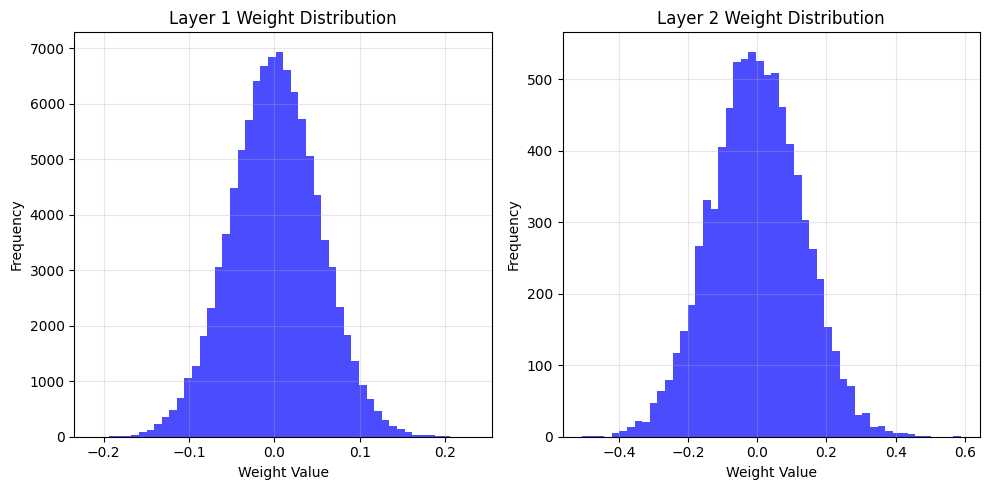


Weight Distribution for gelu activation:


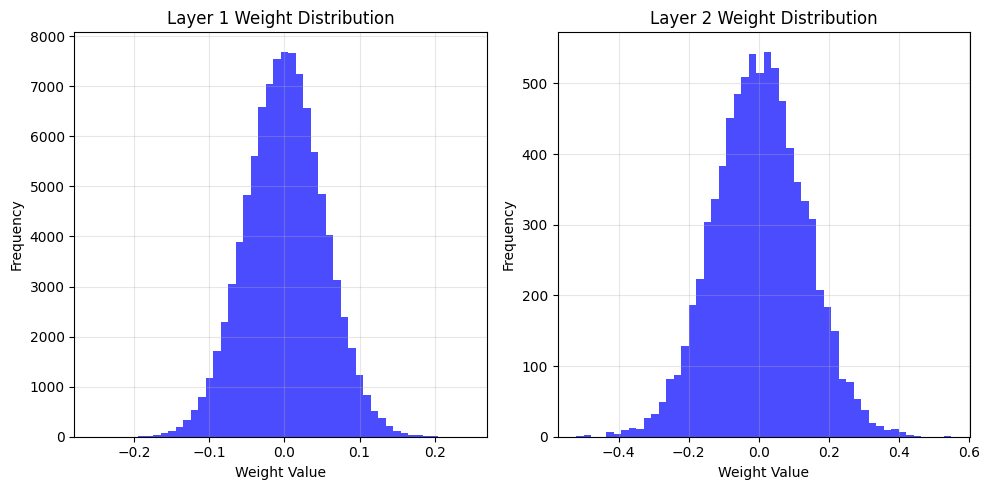


--- Individual Gradient Distributions ---

Gradient Distribution for linear activation:


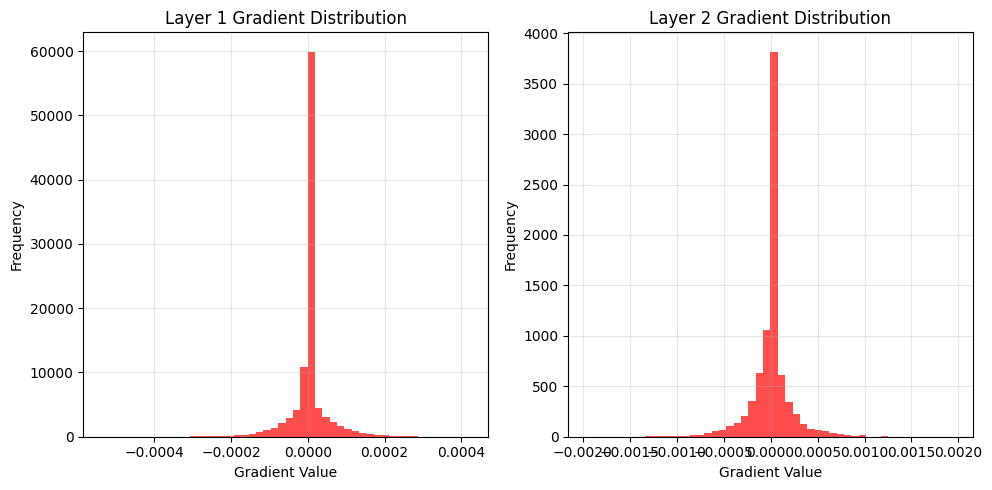


Gradient Distribution for relu activation:


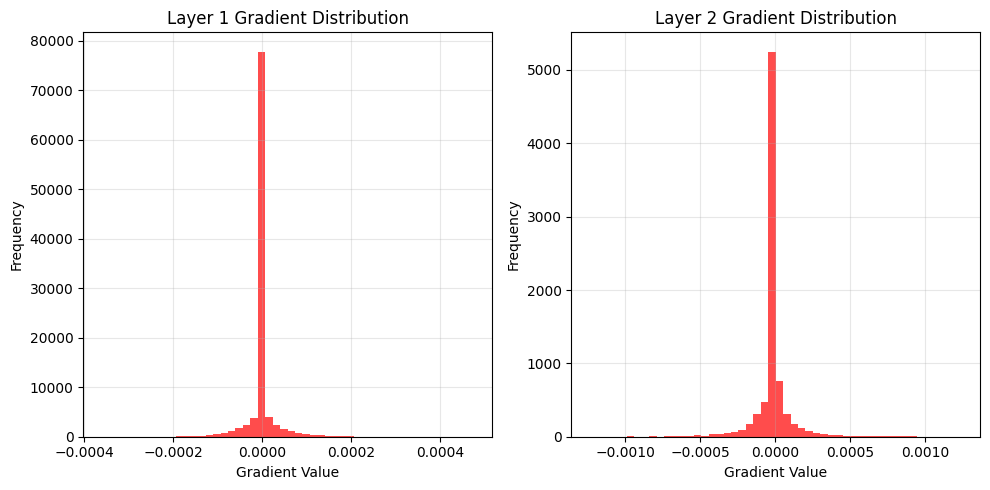


Gradient Distribution for sigmoid activation:


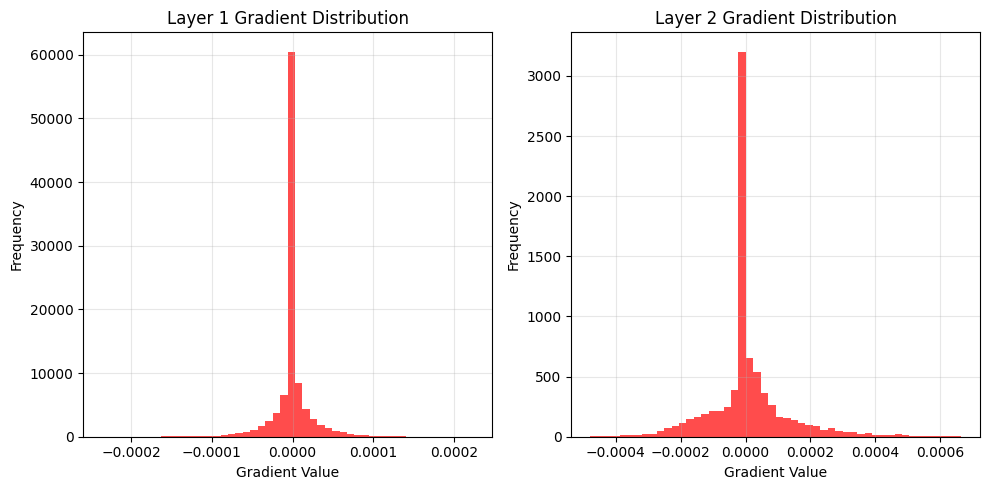


Gradient Distribution for tanh activation:


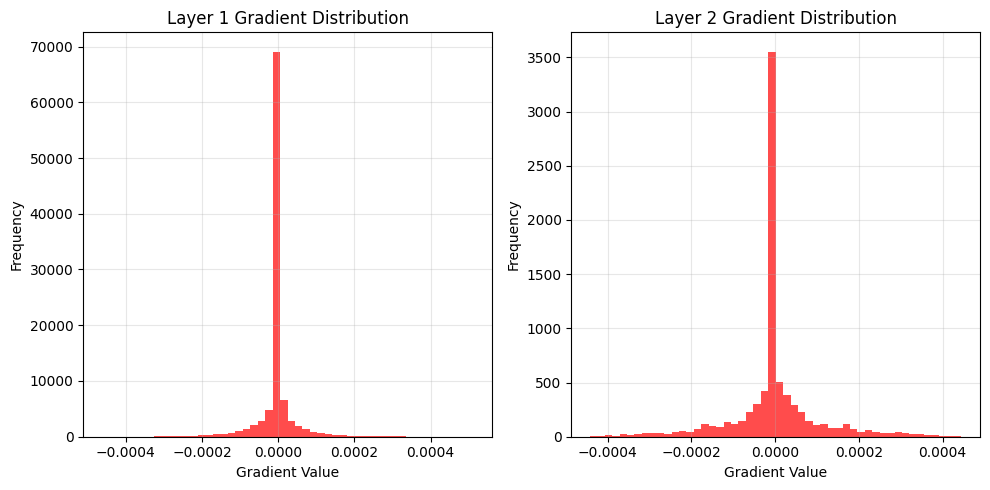


Gradient Distribution for swish activation:


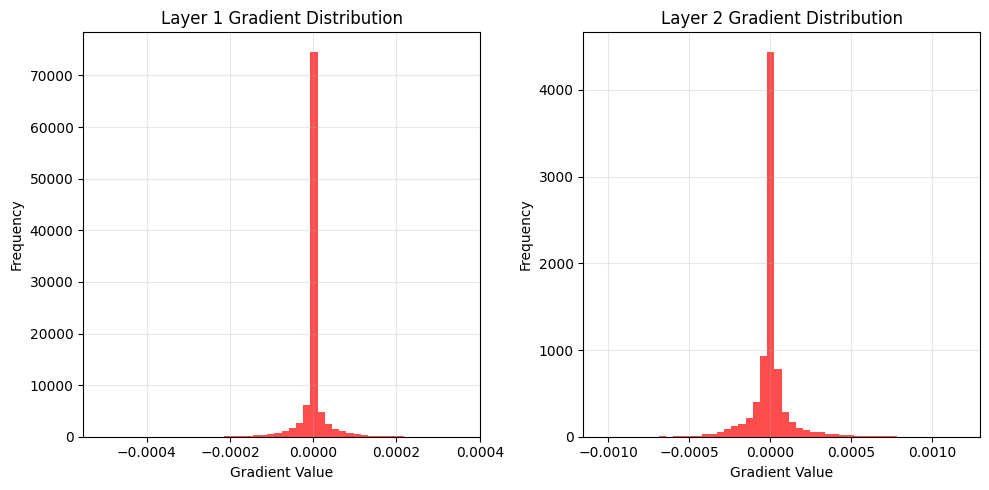


Gradient Distribution for gelu activation:


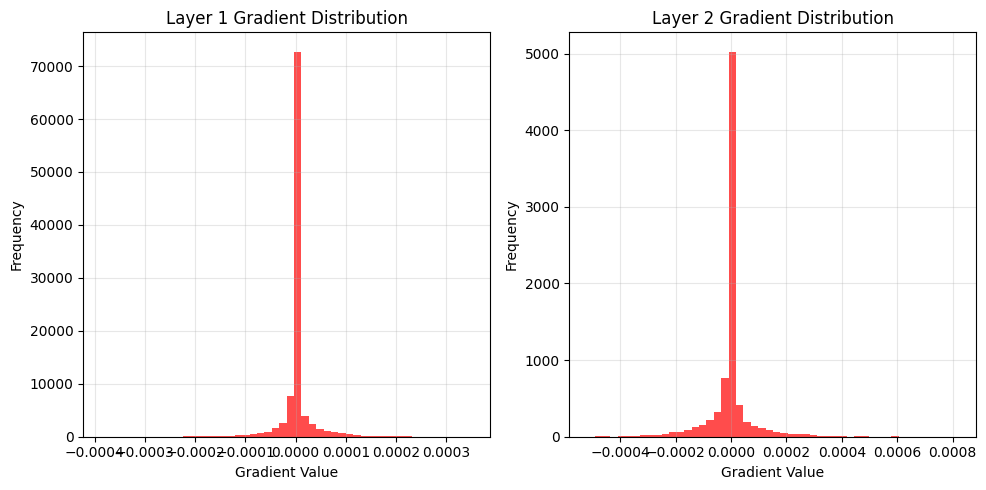

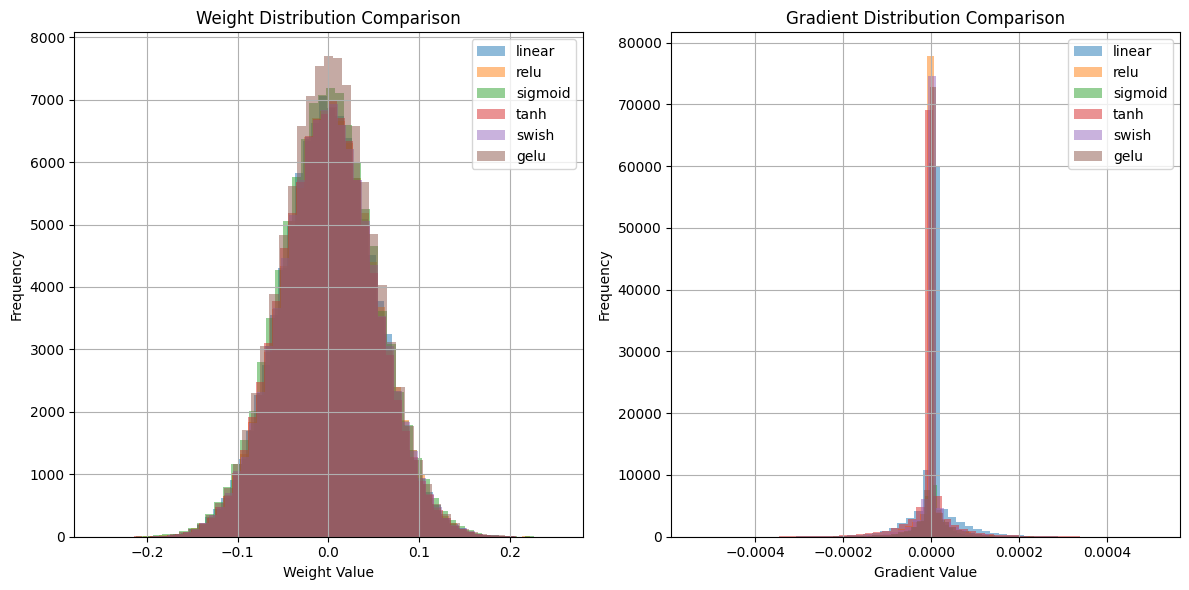


--- Accuracy Summary ---
Activation linear: 0.9285
Activation relu: 0.9250
Activation sigmoid: 0.8981
Activation tanh: 0.9294
Activation swish: 0.9244
Activation gelu: 0.9275


In [6]:
activation_models = {}
activation_histories = {}
activation_accuracies = {}

# List fungsi aktivasi
activations = ["linear", "relu", "sigmoid", "tanh", "swish", "gelu"]

for activation in activations:
    print(f"Training model with activation {activation}")

    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, activation, "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )

    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    activation_models[activation] = model
    activation_histories[activation] = history
    activation_accuracies[activation] = accuracy
    
    print(f"Test Accuracy (Activation {activation}): {accuracy:.4f}\n")

# Plot perbandingan loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["train_loss"], 
        label=f"Train Loss ({activation})"
    )
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for activation, model in activation_models.items():
    print(f"\nWeight Distribution for {activation} activation:")
    model.plot_weight_distribution([0, 1])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for activation, model in activation_models.items():
    print(f"\nGradient Distribution for {activation} activation:")
    model.plot_gradient_distribution([0, 1])


plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=activation
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=activation,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\n--- Accuracy Summary ---")
for activation, accuracy in activation_accuracies.items():
    print(f"Activation {activation}: {accuracy:.4f}")

### Pengaruh Learning Rate

Training model with learning rate: 0.001


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1564.22it/s]


Epoch 1/50, Train Loss: 2.6929, Val Loss: 2.2750, Val Acc: 0.1347


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1461.50it/s]


Epoch 2/50, Train Loss: 2.1886, Val Loss: 2.1275, Val Acc: 0.2707


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1521.10it/s]


Epoch 3/50, Train Loss: 2.0702, Val Loss: 2.0188, Val Acc: 0.3818


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1470.92it/s]


Epoch 4/50, Train Loss: 1.9636, Val Loss: 1.9141, Val Acc: 0.4516


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1519.88it/s]


Epoch 5/50, Train Loss: 1.8601, Val Loss: 1.8128, Val Acc: 0.5084


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1532.23it/s]


Epoch 6/50, Train Loss: 1.7602, Val Loss: 1.7154, Val Acc: 0.5545


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1475.60it/s]


Epoch 7/50, Train Loss: 1.6645, Val Loss: 1.6227, Val Acc: 0.5929


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1455.59it/s]


Epoch 8/50, Train Loss: 1.5737, Val Loss: 1.5354, Val Acc: 0.6229


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1344.49it/s]


Epoch 9/50, Train Loss: 1.4882, Val Loss: 1.4531, Val Acc: 0.6510


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1403.65it/s]


Epoch 10/50, Train Loss: 1.4082, Val Loss: 1.3767, Val Acc: 0.6758


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1539.32it/s]


Epoch 11/50, Train Loss: 1.3339, Val Loss: 1.3060, Val Acc: 0.6963


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1316.53it/s]


Epoch 12/50, Train Loss: 1.2653, Val Loss: 1.2407, Val Acc: 0.7113


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1461.61it/s]


Epoch 13/50, Train Loss: 1.2022, Val Loss: 1.1810, Val Acc: 0.7267


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1465.15it/s]


Epoch 14/50, Train Loss: 1.1443, Val Loss: 1.1263, Val Acc: 0.7390


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1522.77it/s]


Epoch 15/50, Train Loss: 1.0914, Val Loss: 1.0762, Val Acc: 0.7518


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1336.23it/s]


Epoch 16/50, Train Loss: 1.0430, Val Loss: 1.0305, Val Acc: 0.7594


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1548.40it/s]


Epoch 17/50, Train Loss: 0.9988, Val Loss: 0.9886, Val Acc: 0.7676


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1441.19it/s]


Epoch 18/50, Train Loss: 0.9583, Val Loss: 0.9506, Val Acc: 0.7754


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1379.97it/s]


Epoch 19/50, Train Loss: 0.9214, Val Loss: 0.9158, Val Acc: 0.7815


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1357.14it/s]


Epoch 20/50, Train Loss: 0.8876, Val Loss: 0.8836, Val Acc: 0.7867


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1503.59it/s]


Epoch 21/50, Train Loss: 0.8567, Val Loss: 0.8544, Val Acc: 0.7914


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1549.36it/s]


Epoch 22/50, Train Loss: 0.8282, Val Loss: 0.8276, Val Acc: 0.7963


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1576.67it/s]


Epoch 23/50, Train Loss: 0.8021, Val Loss: 0.8031, Val Acc: 0.8018


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1527.34it/s]


Epoch 24/50, Train Loss: 0.7782, Val Loss: 0.7803, Val Acc: 0.8044


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1540.39it/s]


Epoch 25/50, Train Loss: 0.7560, Val Loss: 0.7595, Val Acc: 0.8090


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1478.91it/s]


Epoch 26/50, Train Loss: 0.7357, Val Loss: 0.7398, Val Acc: 0.8137


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1500.49it/s]


Epoch 27/50, Train Loss: 0.7167, Val Loss: 0.7220, Val Acc: 0.8176


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1498.31it/s]


Epoch 28/50, Train Loss: 0.6992, Val Loss: 0.7053, Val Acc: 0.8195


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1605.35it/s]


Epoch 29/50, Train Loss: 0.6829, Val Loss: 0.6897, Val Acc: 0.8223


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1581.55it/s]


Epoch 30/50, Train Loss: 0.6678, Val Loss: 0.6753, Val Acc: 0.8255


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1544.17it/s]


Epoch 31/50, Train Loss: 0.6537, Val Loss: 0.6618, Val Acc: 0.8277


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1548.38it/s]


Epoch 32/50, Train Loss: 0.6404, Val Loss: 0.6494, Val Acc: 0.8299


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1625.51it/s]


Epoch 33/50, Train Loss: 0.6281, Val Loss: 0.6375, Val Acc: 0.8329


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1559.30it/s]


Epoch 34/50, Train Loss: 0.6165, Val Loss: 0.6265, Val Acc: 0.8344


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1466.53it/s]


Epoch 35/50, Train Loss: 0.6057, Val Loss: 0.6160, Val Acc: 0.8371


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1354.81it/s]


Epoch 36/50, Train Loss: 0.5954, Val Loss: 0.6063, Val Acc: 0.8381


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1436.47it/s]


Epoch 37/50, Train Loss: 0.5858, Val Loss: 0.5969, Val Acc: 0.8404


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1319.77it/s]


Epoch 38/50, Train Loss: 0.5767, Val Loss: 0.5883, Val Acc: 0.8434


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1320.78it/s]


Epoch 39/50, Train Loss: 0.5680, Val Loss: 0.5799, Val Acc: 0.8453


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1538.67it/s]


Epoch 40/50, Train Loss: 0.5599, Val Loss: 0.5722, Val Acc: 0.8479


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1396.69it/s]


Epoch 41/50, Train Loss: 0.5522, Val Loss: 0.5647, Val Acc: 0.8491


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1489.28it/s]


Epoch 42/50, Train Loss: 0.5449, Val Loss: 0.5578, Val Acc: 0.8498


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1373.65it/s]


Epoch 43/50, Train Loss: 0.5379, Val Loss: 0.5512, Val Acc: 0.8511


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1417.81it/s]


Epoch 44/50, Train Loss: 0.5313, Val Loss: 0.5446, Val Acc: 0.8525


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1332.67it/s]


Epoch 45/50, Train Loss: 0.5250, Val Loss: 0.5387, Val Acc: 0.8540


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1481.99it/s]


Epoch 46/50, Train Loss: 0.5190, Val Loss: 0.5327, Val Acc: 0.8550


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1524.84it/s]


Epoch 47/50, Train Loss: 0.5132, Val Loss: 0.5273, Val Acc: 0.8560


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1506.54it/s]


Epoch 48/50, Train Loss: 0.5077, Val Loss: 0.5220, Val Acc: 0.8573


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1394.93it/s]


Epoch 49/50, Train Loss: 0.5025, Val Loss: 0.5170, Val Acc: 0.8575


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1509.96it/s]


Epoch 50/50, Train Loss: 0.4975, Val Loss: 0.5120, Val Acc: 0.8584
Test Accuracy (Learning Rate 0.001): 0.8674

Training model with learning rate: 0.01


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1592.09it/s]


Epoch 1/50, Train Loss: 1.8211, Val Loss: 1.3608, Val Acc: 0.6475


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1382.34it/s]


Epoch 2/50, Train Loss: 1.0911, Val Loss: 0.8965, Val Acc: 0.7762


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1605.27it/s]


Epoch 3/50, Train Loss: 0.7739, Val Loss: 0.6934, Val Acc: 0.8169


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1592.28it/s]


Epoch 4/50, Train Loss: 0.6256, Val Loss: 0.5888, Val Acc: 0.8386


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1580.52it/s]


Epoch 5/50, Train Loss: 0.5441, Val Loss: 0.5255, Val Acc: 0.8530


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1549.88it/s]


Epoch 6/50, Train Loss: 0.4931, Val Loss: 0.4838, Val Acc: 0.8624


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1599.07it/s]


Epoch 7/50, Train Loss: 0.4579, Val Loss: 0.4543, Val Acc: 0.8693


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1674.75it/s]


Epoch 8/50, Train Loss: 0.4320, Val Loss: 0.4330, Val Acc: 0.8740


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1625.26it/s]


Epoch 9/50, Train Loss: 0.4121, Val Loss: 0.4152, Val Acc: 0.8790


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1574.28it/s]


Epoch 10/50, Train Loss: 0.3961, Val Loss: 0.4007, Val Acc: 0.8827


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1569.23it/s]


Epoch 11/50, Train Loss: 0.3831, Val Loss: 0.3893, Val Acc: 0.8844


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1565.33it/s]


Epoch 12/50, Train Loss: 0.3720, Val Loss: 0.3793, Val Acc: 0.8868


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1626.95it/s]


Epoch 13/50, Train Loss: 0.3627, Val Loss: 0.3697, Val Acc: 0.8907


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1469.71it/s]


Epoch 14/50, Train Loss: 0.3545, Val Loss: 0.3625, Val Acc: 0.8929


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1417.54it/s]


Epoch 15/50, Train Loss: 0.3473, Val Loss: 0.3548, Val Acc: 0.8952


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1394.38it/s]


Epoch 16/50, Train Loss: 0.3409, Val Loss: 0.3507, Val Acc: 0.8965


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1433.32it/s]


Epoch 17/50, Train Loss: 0.3351, Val Loss: 0.3450, Val Acc: 0.8976


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1303.79it/s]


Epoch 18/50, Train Loss: 0.3299, Val Loss: 0.3387, Val Acc: 0.8981


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1436.72it/s]


Epoch 19/50, Train Loss: 0.3252, Val Loss: 0.3351, Val Acc: 0.9009


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1568.02it/s]


Epoch 20/50, Train Loss: 0.3208, Val Loss: 0.3311, Val Acc: 0.9024


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1584.79it/s]


Epoch 21/50, Train Loss: 0.3168, Val Loss: 0.3268, Val Acc: 0.9029


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1352.35it/s]


Epoch 22/50, Train Loss: 0.3129, Val Loss: 0.3229, Val Acc: 0.9055


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1489.77it/s]


Epoch 23/50, Train Loss: 0.3092, Val Loss: 0.3213, Val Acc: 0.9056


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1563.43it/s]


Epoch 24/50, Train Loss: 0.3060, Val Loss: 0.3172, Val Acc: 0.9070


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1474.39it/s]


Epoch 25/50, Train Loss: 0.3028, Val Loss: 0.3142, Val Acc: 0.9072


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1583.80it/s]


Epoch 26/50, Train Loss: 0.2998, Val Loss: 0.3114, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1437.74it/s]


Epoch 27/50, Train Loss: 0.2970, Val Loss: 0.3085, Val Acc: 0.9101


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1378.89it/s]


Epoch 28/50, Train Loss: 0.2943, Val Loss: 0.3071, Val Acc: 0.9107


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1522.61it/s]


Epoch 29/50, Train Loss: 0.2917, Val Loss: 0.3037, Val Acc: 0.9118


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1556.55it/s]


Epoch 30/50, Train Loss: 0.2892, Val Loss: 0.3030, Val Acc: 0.9130


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1597.32it/s]


Epoch 31/50, Train Loss: 0.2868, Val Loss: 0.3003, Val Acc: 0.9129


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1593.99it/s]


Epoch 32/50, Train Loss: 0.2844, Val Loss: 0.2982, Val Acc: 0.9150


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1545.18it/s]


Epoch 33/50, Train Loss: 0.2820, Val Loss: 0.2973, Val Acc: 0.9149


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1649.97it/s]


Epoch 34/50, Train Loss: 0.2800, Val Loss: 0.2948, Val Acc: 0.9162


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1564.06it/s]


Epoch 35/50, Train Loss: 0.2780, Val Loss: 0.2943, Val Acc: 0.9160


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1560.44it/s]


Epoch 36/50, Train Loss: 0.2761, Val Loss: 0.2902, Val Acc: 0.9167


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1571.50it/s]


Epoch 37/50, Train Loss: 0.2739, Val Loss: 0.2887, Val Acc: 0.9186


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1628.32it/s]


Epoch 38/50, Train Loss: 0.2721, Val Loss: 0.2875, Val Acc: 0.9186


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1578.82it/s]


Epoch 39/50, Train Loss: 0.2700, Val Loss: 0.2870, Val Acc: 0.9185


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1577.99it/s]


Epoch 40/50, Train Loss: 0.2682, Val Loss: 0.2844, Val Acc: 0.9185


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1603.05it/s]


Epoch 41/50, Train Loss: 0.2664, Val Loss: 0.2822, Val Acc: 0.9194


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1588.81it/s]


Epoch 42/50, Train Loss: 0.2645, Val Loss: 0.2802, Val Acc: 0.9195


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1591.65it/s]


Epoch 43/50, Train Loss: 0.2627, Val Loss: 0.2788, Val Acc: 0.9206


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1409.40it/s]


Epoch 44/50, Train Loss: 0.2610, Val Loss: 0.2765, Val Acc: 0.9204


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1348.29it/s]


Epoch 45/50, Train Loss: 0.2592, Val Loss: 0.2756, Val Acc: 0.9215


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1385.40it/s]


Epoch 46/50, Train Loss: 0.2575, Val Loss: 0.2750, Val Acc: 0.9214


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1359.28it/s]


Epoch 47/50, Train Loss: 0.2559, Val Loss: 0.2728, Val Acc: 0.9224


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1388.19it/s]


Epoch 48/50, Train Loss: 0.2544, Val Loss: 0.2711, Val Acc: 0.9222


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1422.16it/s]


Epoch 49/50, Train Loss: 0.2526, Val Loss: 0.2693, Val Acc: 0.9226


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1310.47it/s]


Epoch 50/50, Train Loss: 0.2509, Val Loss: 0.2686, Val Acc: 0.9226
Test Accuracy (Learning Rate 0.01): 0.9250

Training model with learning rate: 0.1


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1442.15it/s]


Epoch 1/50, Train Loss: 0.7778, Val Loss: 0.4157, Val Acc: 0.8827


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1379.35it/s]


Epoch 2/50, Train Loss: 0.3578, Val Loss: 0.3492, Val Acc: 0.8972


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1364.22it/s]


Epoch 3/50, Train Loss: 0.3103, Val Loss: 0.3100, Val Acc: 0.9096


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1557.53it/s]


Epoch 4/50, Train Loss: 0.2834, Val Loss: 0.2889, Val Acc: 0.9171


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1457.38it/s]


Epoch 5/50, Train Loss: 0.2630, Val Loss: 0.2687, Val Acc: 0.9241


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1441.53it/s]


Epoch 6/50, Train Loss: 0.2444, Val Loss: 0.2540, Val Acc: 0.9282


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1460.27it/s]


Epoch 7/50, Train Loss: 0.2283, Val Loss: 0.2365, Val Acc: 0.9329


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1510.52it/s]


Epoch 8/50, Train Loss: 0.2121, Val Loss: 0.2268, Val Acc: 0.9346


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1576.94it/s]


Epoch 9/50, Train Loss: 0.1982, Val Loss: 0.2135, Val Acc: 0.9394


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1566.36it/s]


Epoch 10/50, Train Loss: 0.1856, Val Loss: 0.2025, Val Acc: 0.9420


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1524.42it/s]


Epoch 11/50, Train Loss: 0.1737, Val Loss: 0.1935, Val Acc: 0.9431


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1483.80it/s]


Epoch 12/50, Train Loss: 0.1636, Val Loss: 0.1837, Val Acc: 0.9451


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1458.16it/s]


Epoch 13/50, Train Loss: 0.1551, Val Loss: 0.1745, Val Acc: 0.9475


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1445.19it/s]


Epoch 14/50, Train Loss: 0.1464, Val Loss: 0.1700, Val Acc: 0.9497


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1500.30it/s]


Epoch 15/50, Train Loss: 0.1386, Val Loss: 0.1619, Val Acc: 0.9505


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1497.63it/s]


Epoch 16/50, Train Loss: 0.1317, Val Loss: 0.1592, Val Acc: 0.9517


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1527.17it/s]


Epoch 17/50, Train Loss: 0.1259, Val Loss: 0.1540, Val Acc: 0.9521


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1528.44it/s]


Epoch 18/50, Train Loss: 0.1204, Val Loss: 0.1467, Val Acc: 0.9556


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1556.49it/s]


Epoch 19/50, Train Loss: 0.1152, Val Loss: 0.1430, Val Acc: 0.9571


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1489.66it/s]


Epoch 20/50, Train Loss: 0.1099, Val Loss: 0.1379, Val Acc: 0.9570


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1490.43it/s]


Epoch 21/50, Train Loss: 0.1059, Val Loss: 0.1343, Val Acc: 0.9608


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1466.78it/s]


Epoch 22/50, Train Loss: 0.1017, Val Loss: 0.1305, Val Acc: 0.9608


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1485.28it/s]


Epoch 23/50, Train Loss: 0.0980, Val Loss: 0.1292, Val Acc: 0.9611


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1365.14it/s]


Epoch 24/50, Train Loss: 0.0945, Val Loss: 0.1261, Val Acc: 0.9623


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1394.47it/s]


Epoch 25/50, Train Loss: 0.0912, Val Loss: 0.1250, Val Acc: 0.9623


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1382.09it/s]


Epoch 26/50, Train Loss: 0.0879, Val Loss: 0.1213, Val Acc: 0.9640


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1469.08it/s]


Epoch 27/50, Train Loss: 0.0846, Val Loss: 0.1187, Val Acc: 0.9630


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1497.77it/s]


Epoch 28/50, Train Loss: 0.0818, Val Loss: 0.1165, Val Acc: 0.9652


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1351.55it/s]


Epoch 29/50, Train Loss: 0.0793, Val Loss: 0.1155, Val Acc: 0.9654


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1374.97it/s]


Epoch 30/50, Train Loss: 0.0771, Val Loss: 0.1145, Val Acc: 0.9663


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1402.04it/s]


Epoch 31/50, Train Loss: 0.0743, Val Loss: 0.1127, Val Acc: 0.9661


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1465.42it/s]


Epoch 32/50, Train Loss: 0.0718, Val Loss: 0.1100, Val Acc: 0.9669


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1266.09it/s]


Epoch 33/50, Train Loss: 0.0696, Val Loss: 0.1111, Val Acc: 0.9670


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1480.52it/s]


Epoch 34/50, Train Loss: 0.0680, Val Loss: 0.1088, Val Acc: 0.9676


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1564.19it/s]


Epoch 35/50, Train Loss: 0.0653, Val Loss: 0.1067, Val Acc: 0.9676


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1522.57it/s]


Epoch 36/50, Train Loss: 0.0639, Val Loss: 0.1080, Val Acc: 0.9682


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1474.01it/s]


Epoch 37/50, Train Loss: 0.0620, Val Loss: 0.1031, Val Acc: 0.9696


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1479.27it/s]


Epoch 38/50, Train Loss: 0.0596, Val Loss: 0.1038, Val Acc: 0.9695


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1490.97it/s]


Epoch 39/50, Train Loss: 0.0584, Val Loss: 0.1041, Val Acc: 0.9693


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1414.36it/s]


Epoch 40/50, Train Loss: 0.0567, Val Loss: 0.1018, Val Acc: 0.9702


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1474.29it/s]


Epoch 41/50, Train Loss: 0.0549, Val Loss: 0.1026, Val Acc: 0.9691


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1526.44it/s]


Epoch 42/50, Train Loss: 0.0533, Val Loss: 0.1009, Val Acc: 0.9711


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1525.34it/s]


Epoch 43/50, Train Loss: 0.0522, Val Loss: 0.0989, Val Acc: 0.9701


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1468.00it/s]


Epoch 44/50, Train Loss: 0.0505, Val Loss: 0.0978, Val Acc: 0.9713


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1502.33it/s]


Epoch 45/50, Train Loss: 0.0494, Val Loss: 0.0987, Val Acc: 0.9721


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1557.73it/s]


Epoch 46/50, Train Loss: 0.0480, Val Loss: 0.0988, Val Acc: 0.9715


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1492.27it/s]


Epoch 47/50, Train Loss: 0.0467, Val Loss: 0.0976, Val Acc: 0.9710


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1406.12it/s]


Epoch 48/50, Train Loss: 0.0453, Val Loss: 0.0968, Val Acc: 0.9712


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1314.06it/s]


Epoch 49/50, Train Loss: 0.0441, Val Loss: 0.0961, Val Acc: 0.9727


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1449.71it/s]


Epoch 50/50, Train Loss: 0.0432, Val Loss: 0.0948, Val Acc: 0.9731
Test Accuracy (Learning Rate 0.1): 0.9684



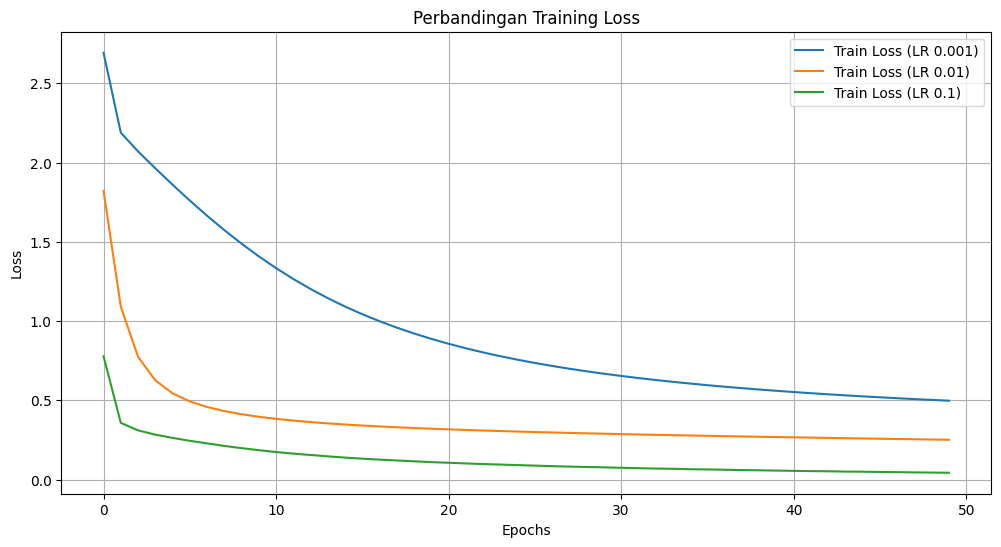

Weight Distributions by Learning Rate:

Model with Learning Rate: 0.001


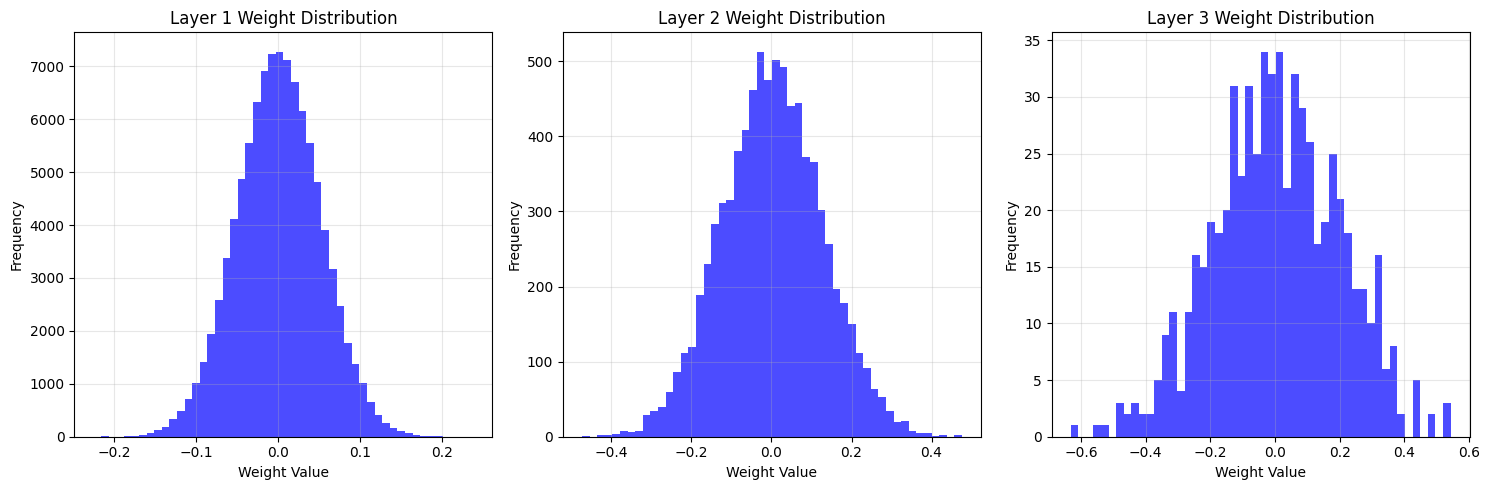


Model with Learning Rate: 0.01


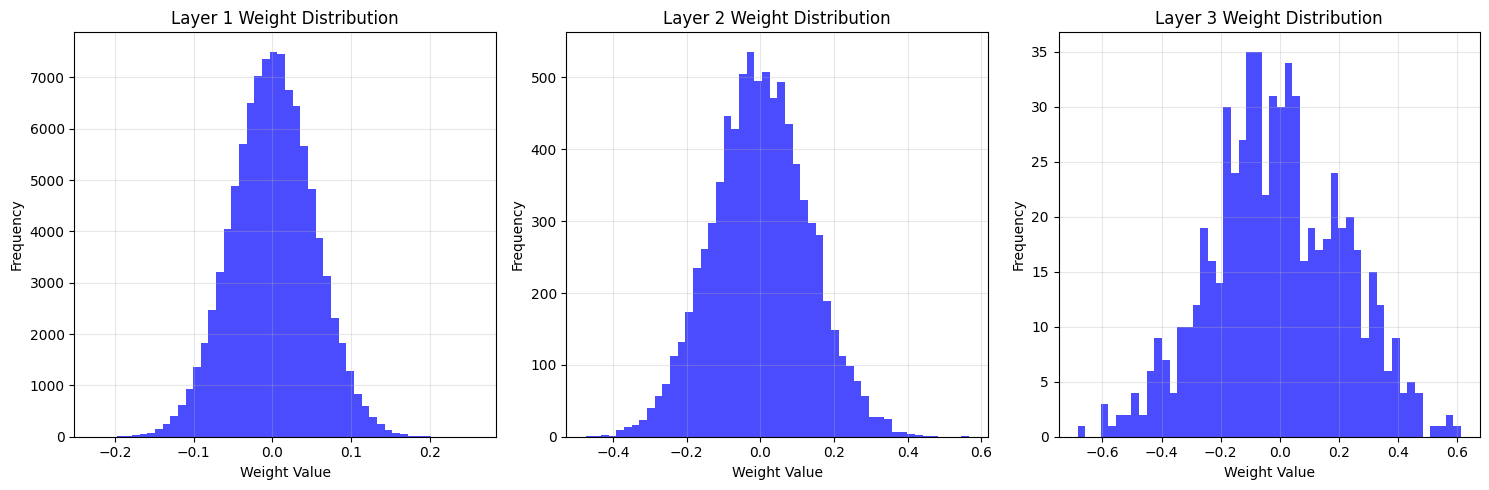


Model with Learning Rate: 0.1


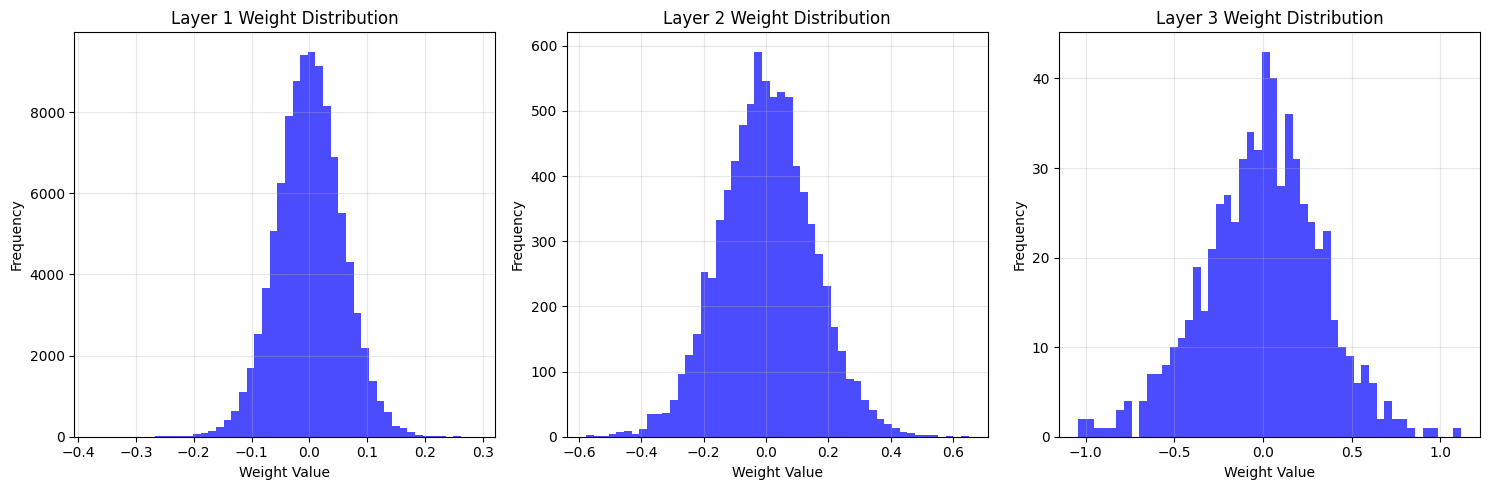


Gradient Distributions by Learning Rate:

Model with Learning Rate: 0.001


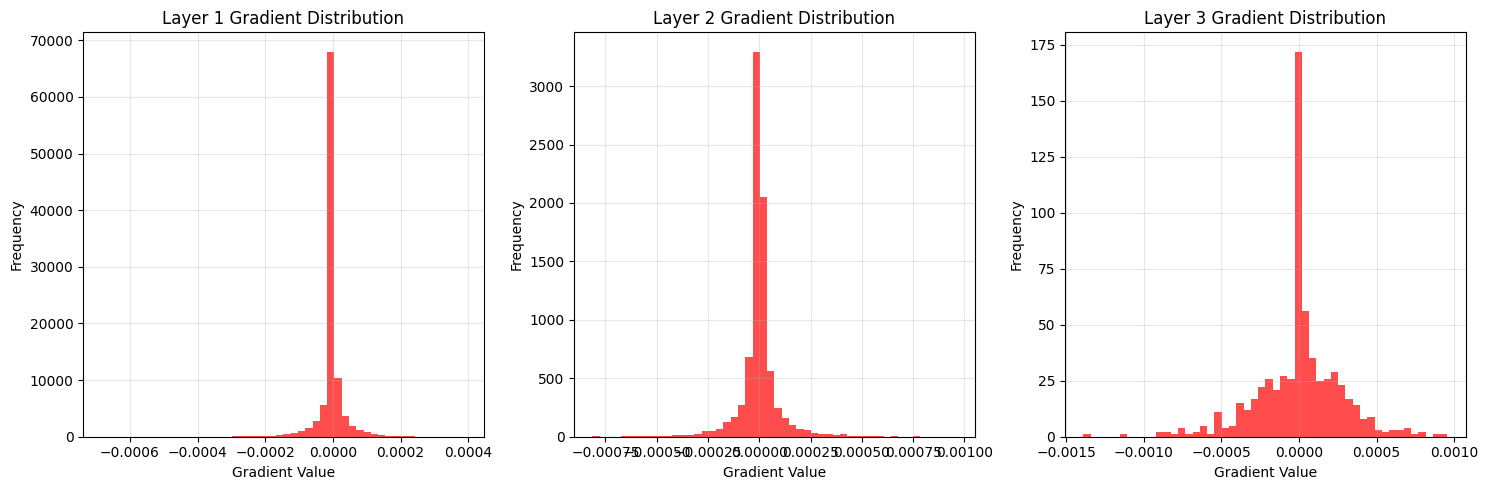


Model with Learning Rate: 0.01


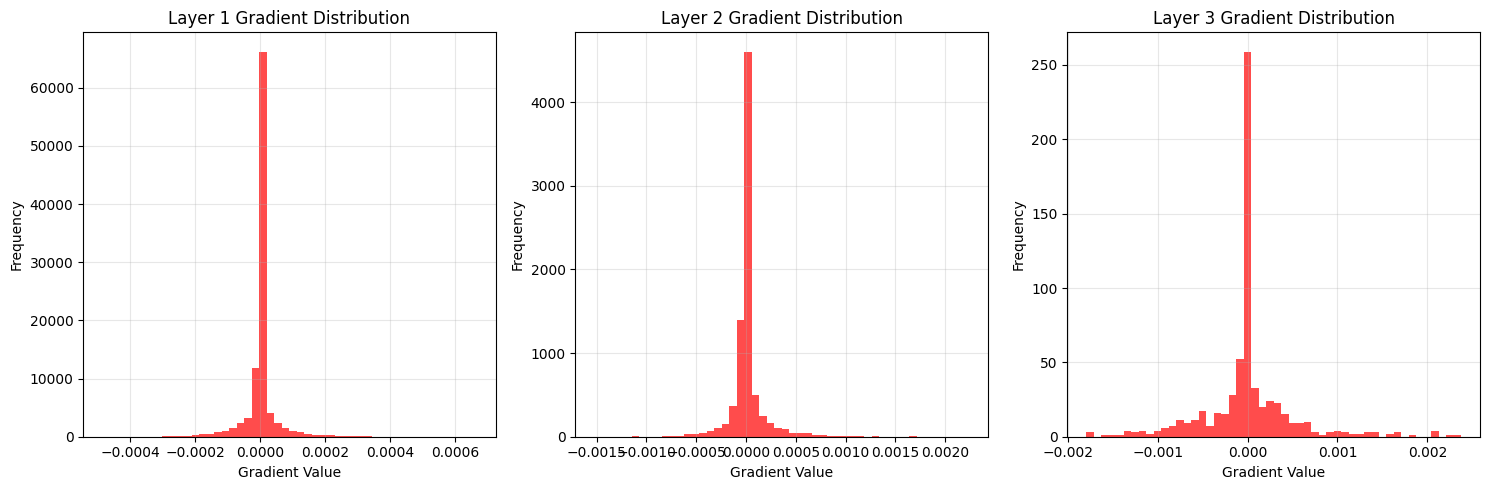


Model with Learning Rate: 0.1


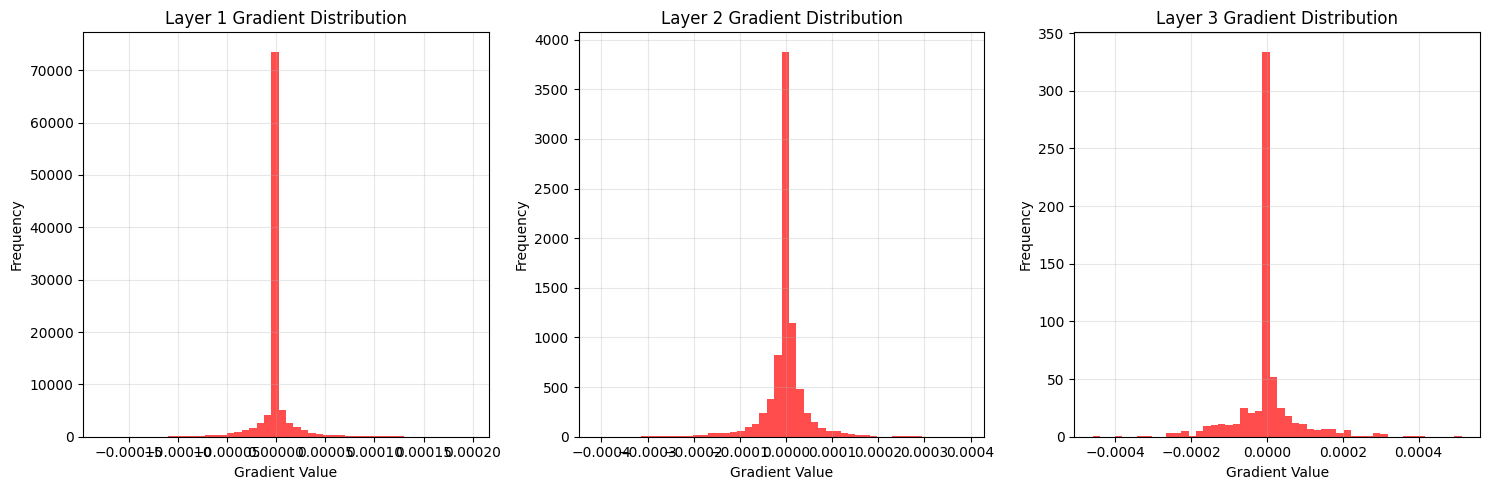

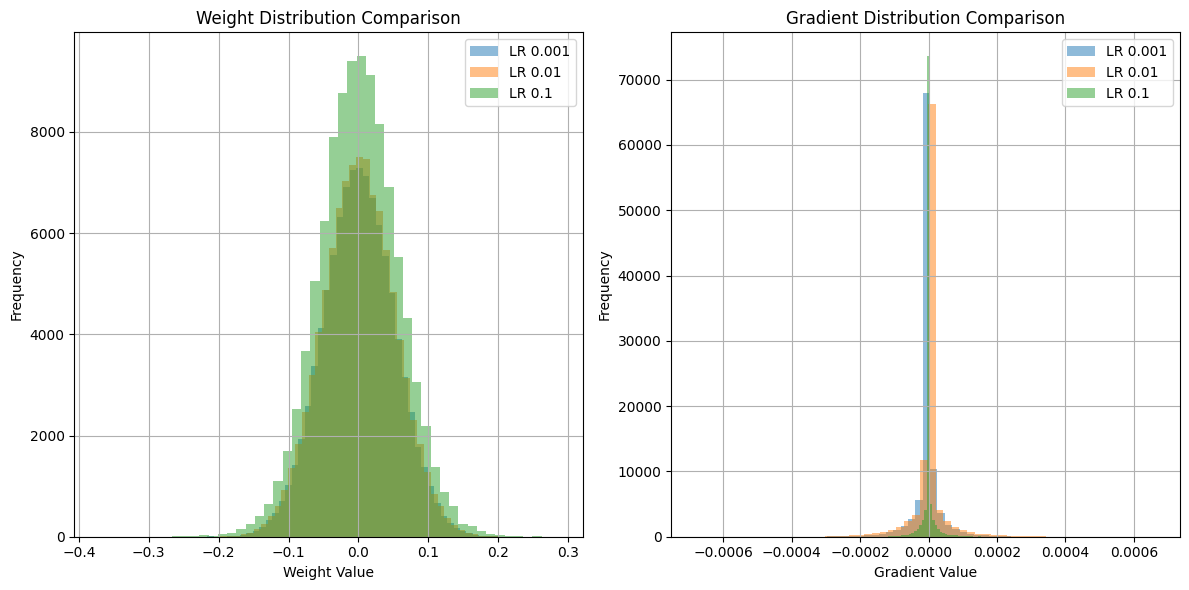


--- Accuracy Summary ---
Learning Rate 0.001: 0.8674
Learning Rate 0.01: 0.9250
Learning Rate 0.1: 0.9684


In [7]:
# Variasi learning rate
learning_rates = [0.001, 0.01, 0.1]
results = {}
histories = {}
models = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model_lr = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    history_lr = model_lr.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=lr,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )
    histories[lr] = history_lr
    models[lr] = model_lr
    pred_lr = model_lr.forward(X_test)
    pred_classes_lr = np.argmax(pred_lr, axis=1)
    accuracy_lr = np.mean(pred_classes_lr == y_test)
    results[lr] = accuracy_lr
    print(f"Test Accuracy (Learning Rate {lr}): {accuracy_lr:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["train_loss"], label="Train Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["train_loss"], label="Train Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["train_loss"], label="Train Loss (LR 0.1)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot
print("Weight Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien
print("\nGradient Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_gradient_distribution([0, 1, 2])

# Plot perbandingan distribusi bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=f"LR {lr}"
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=f"LR {lr}",
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for lr, accuracy in results.items():
    print(f"Learning Rate {lr}: {accuracy:.4f}")


### Pengaruh Inisialisasi Bobot

Training model with Zero initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1755.10it/s]


Epoch 1/50, Train Loss: 2.3025, Val Loss: 2.3023, Val Acc: 0.1138


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1817.82it/s]


Epoch 2/50, Train Loss: 2.3022, Val Loss: 2.3021, Val Acc: 0.1138


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1516.59it/s]


Epoch 3/50, Train Loss: 2.3020, Val Loss: 2.3020, Val Acc: 0.1138


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1724.13it/s]


Epoch 4/50, Train Loss: 2.3018, Val Loss: 2.3018, Val Acc: 0.1138


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1673.64it/s]


Epoch 5/50, Train Loss: 2.3017, Val Loss: 2.3017, Val Acc: 0.1138


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1722.87it/s]


Epoch 6/50, Train Loss: 2.3016, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1590.35it/s]


Epoch 7/50, Train Loss: 2.3015, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1650.50it/s]


Epoch 8/50, Train Loss: 2.3015, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1754.48it/s]


Epoch 9/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1705.46it/s]


Epoch 10/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1789.81it/s]


Epoch 11/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1645.52it/s]


Epoch 12/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1718.45it/s]


Epoch 13/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1788.27it/s]


Epoch 14/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1801.27it/s]


Epoch 15/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1666.11it/s]


Epoch 16/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1781.05it/s]


Epoch 17/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1756.84it/s]


Epoch 18/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1633.69it/s]


Epoch 19/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1687.76it/s]


Epoch 20/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1728.66it/s]


Epoch 21/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1639.40it/s]


Epoch 22/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1758.15it/s]


Epoch 23/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1662.27it/s]


Epoch 24/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1747.42it/s]



Early stopping at epoch 25
Test Accuracy (Zero Initializer): 0.1143

Training model with Uniform initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1393.71it/s]


Epoch 1/50, Train Loss: 2.2761, Val Loss: 2.2578, Val Acc: 0.2548


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1383.71it/s]


Epoch 2/50, Train Loss: 2.2357, Val Loss: 2.2088, Val Acc: 0.4356


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1385.92it/s]


Epoch 3/50, Train Loss: 2.1717, Val Loss: 2.1233, Val Acc: 0.4515


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1341.04it/s]


Epoch 4/50, Train Loss: 2.0570, Val Loss: 1.9736, Val Acc: 0.4695


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1418.04it/s]


Epoch 5/50, Train Loss: 1.8668, Val Loss: 1.7358, Val Acc: 0.5768


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1419.23it/s]


Epoch 6/50, Train Loss: 1.5769, Val Loss: 1.4057, Val Acc: 0.6836


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1577.23it/s]


Epoch 7/50, Train Loss: 1.2421, Val Loss: 1.0957, Val Acc: 0.7535


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1543.06it/s]


Epoch 8/50, Train Loss: 0.9784, Val Loss: 0.8858, Val Acc: 0.7887


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1552.40it/s]


Epoch 9/50, Train Loss: 0.8073, Val Loss: 0.7532, Val Acc: 0.8075


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1516.70it/s]


Epoch 10/50, Train Loss: 0.6971, Val Loss: 0.6659, Val Acc: 0.8219


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1476.15it/s]


Epoch 11/50, Train Loss: 0.6225, Val Loss: 0.6042, Val Acc: 0.8371


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1442.16it/s]


Epoch 12/50, Train Loss: 0.5692, Val Loss: 0.5594, Val Acc: 0.8479


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1547.90it/s]


Epoch 13/50, Train Loss: 0.5297, Val Loss: 0.5248, Val Acc: 0.8546


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1480.33it/s]


Epoch 14/50, Train Loss: 0.4989, Val Loss: 0.4974, Val Acc: 0.8616


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1497.82it/s]


Epoch 15/50, Train Loss: 0.4748, Val Loss: 0.4756, Val Acc: 0.8671


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1404.31it/s]


Epoch 16/50, Train Loss: 0.4551, Val Loss: 0.4577, Val Acc: 0.8712


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1451.77it/s]


Epoch 17/50, Train Loss: 0.4388, Val Loss: 0.4427, Val Acc: 0.8738


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1552.86it/s]


Epoch 18/50, Train Loss: 0.4252, Val Loss: 0.4298, Val Acc: 0.8771


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1453.44it/s]


Epoch 19/50, Train Loss: 0.4134, Val Loss: 0.4191, Val Acc: 0.8803


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1502.16it/s]


Epoch 20/50, Train Loss: 0.4033, Val Loss: 0.4101, Val Acc: 0.8821


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1452.90it/s]


Epoch 21/50, Train Loss: 0.3947, Val Loss: 0.4013, Val Acc: 0.8845


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1491.41it/s]


Epoch 22/50, Train Loss: 0.3867, Val Loss: 0.3940, Val Acc: 0.8872


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1493.92it/s]


Epoch 23/50, Train Loss: 0.3798, Val Loss: 0.3872, Val Acc: 0.8894


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1494.59it/s]


Epoch 24/50, Train Loss: 0.3734, Val Loss: 0.3809, Val Acc: 0.8906


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1462.46it/s]


Epoch 25/50, Train Loss: 0.3676, Val Loss: 0.3754, Val Acc: 0.8928


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1502.47it/s]


Epoch 26/50, Train Loss: 0.3623, Val Loss: 0.3712, Val Acc: 0.8927


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1495.89it/s]


Epoch 27/50, Train Loss: 0.3572, Val Loss: 0.3668, Val Acc: 0.8938


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1504.86it/s]


Epoch 28/50, Train Loss: 0.3528, Val Loss: 0.3613, Val Acc: 0.8959


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1386.57it/s]


Epoch 29/50, Train Loss: 0.3484, Val Loss: 0.3581, Val Acc: 0.8956


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1449.12it/s]


Epoch 30/50, Train Loss: 0.3444, Val Loss: 0.3541, Val Acc: 0.8975


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1500.68it/s]


Epoch 31/50, Train Loss: 0.3407, Val Loss: 0.3500, Val Acc: 0.8988


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1431.24it/s]


Epoch 32/50, Train Loss: 0.3371, Val Loss: 0.3462, Val Acc: 0.8991


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1529.94it/s]


Epoch 33/50, Train Loss: 0.3336, Val Loss: 0.3437, Val Acc: 0.9009


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1424.95it/s]


Epoch 34/50, Train Loss: 0.3304, Val Loss: 0.3401, Val Acc: 0.9012


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1586.99it/s]


Epoch 35/50, Train Loss: 0.3272, Val Loss: 0.3373, Val Acc: 0.9029


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1518.12it/s]


Epoch 36/50, Train Loss: 0.3241, Val Loss: 0.3348, Val Acc: 0.9029


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1527.33it/s]


Epoch 37/50, Train Loss: 0.3212, Val Loss: 0.3317, Val Acc: 0.9052


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1531.60it/s]


Epoch 38/50, Train Loss: 0.3184, Val Loss: 0.3289, Val Acc: 0.9044


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1454.36it/s]


Epoch 39/50, Train Loss: 0.3158, Val Loss: 0.3265, Val Acc: 0.9062


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1440.06it/s]


Epoch 40/50, Train Loss: 0.3129, Val Loss: 0.3244, Val Acc: 0.9065


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1498.90it/s]


Epoch 41/50, Train Loss: 0.3105, Val Loss: 0.3212, Val Acc: 0.9083


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1569.98it/s]


Epoch 42/50, Train Loss: 0.3080, Val Loss: 0.3190, Val Acc: 0.9078


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1530.29it/s]


Epoch 43/50, Train Loss: 0.3055, Val Loss: 0.3172, Val Acc: 0.9087


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1571.95it/s]


Epoch 44/50, Train Loss: 0.3032, Val Loss: 0.3148, Val Acc: 0.9104


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1447.52it/s]


Epoch 45/50, Train Loss: 0.3009, Val Loss: 0.3130, Val Acc: 0.9104


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1520.71it/s]


Epoch 46/50, Train Loss: 0.2986, Val Loss: 0.3103, Val Acc: 0.9105


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1398.95it/s]


Epoch 47/50, Train Loss: 0.2963, Val Loss: 0.3098, Val Acc: 0.9107


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1492.91it/s]


Epoch 48/50, Train Loss: 0.2942, Val Loss: 0.3061, Val Acc: 0.9106


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1594.91it/s]


Epoch 49/50, Train Loss: 0.2921, Val Loss: 0.3049, Val Acc: 0.9121


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1275.43it/s]


Epoch 50/50, Train Loss: 0.2901, Val Loss: 0.3024, Val Acc: 0.9132
Test Accuracy (Uniform Initializer): 0.9140

Training model with Normal initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1462.37it/s]


Epoch 1/50, Train Loss: 2.1328, Val Loss: 1.9491, Val Acc: 0.4594


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1404.04it/s]


Epoch 2/50, Train Loss: 1.7321, Val Loss: 1.5098, Val Acc: 0.6008


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1475.93it/s]


Epoch 3/50, Train Loss: 1.2973, Val Loss: 1.1212, Val Acc: 0.7063


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1348.18it/s]


Epoch 4/50, Train Loss: 0.9792, Val Loss: 0.8794, Val Acc: 0.7628


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1410.81it/s]


Epoch 5/50, Train Loss: 0.7889, Val Loss: 0.7356, Val Acc: 0.8005


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1424.57it/s]


Epoch 6/50, Train Loss: 0.6728, Val Loss: 0.6441, Val Acc: 0.8214


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1489.54it/s]


Epoch 7/50, Train Loss: 0.5966, Val Loss: 0.5821, Val Acc: 0.8396


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1405.16it/s]


Epoch 8/50, Train Loss: 0.5433, Val Loss: 0.5362, Val Acc: 0.8496


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1438.12it/s]


Epoch 9/50, Train Loss: 0.5039, Val Loss: 0.5023, Val Acc: 0.8572


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1410.76it/s]


Epoch 10/50, Train Loss: 0.4737, Val Loss: 0.4749, Val Acc: 0.8646


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1307.69it/s]


Epoch 11/50, Train Loss: 0.4495, Val Loss: 0.4537, Val Acc: 0.8696


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1551.42it/s]


Epoch 12/50, Train Loss: 0.4299, Val Loss: 0.4354, Val Acc: 0.8744


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1430.71it/s]


Epoch 13/50, Train Loss: 0.4133, Val Loss: 0.4199, Val Acc: 0.8792


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1492.51it/s]


Epoch 14/50, Train Loss: 0.3993, Val Loss: 0.4067, Val Acc: 0.8819


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1444.35it/s]


Epoch 15/50, Train Loss: 0.3871, Val Loss: 0.3959, Val Acc: 0.8854


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1509.67it/s]


Epoch 16/50, Train Loss: 0.3763, Val Loss: 0.3855, Val Acc: 0.8885


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1520.18it/s]


Epoch 17/50, Train Loss: 0.3668, Val Loss: 0.3779, Val Acc: 0.8891


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1441.33it/s]


Epoch 18/50, Train Loss: 0.3585, Val Loss: 0.3689, Val Acc: 0.8941


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1384.74it/s]


Epoch 19/50, Train Loss: 0.3507, Val Loss: 0.3621, Val Acc: 0.8950


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1441.36it/s]


Epoch 20/50, Train Loss: 0.3438, Val Loss: 0.3547, Val Acc: 0.8979


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1459.71it/s]


Epoch 21/50, Train Loss: 0.3374, Val Loss: 0.3484, Val Acc: 0.8993


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1386.89it/s]


Epoch 22/50, Train Loss: 0.3314, Val Loss: 0.3434, Val Acc: 0.9032


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1410.24it/s]


Epoch 23/50, Train Loss: 0.3260, Val Loss: 0.3378, Val Acc: 0.9034


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1435.19it/s]


Epoch 24/50, Train Loss: 0.3210, Val Loss: 0.3330, Val Acc: 0.9040


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1469.15it/s]


Epoch 25/50, Train Loss: 0.3161, Val Loss: 0.3283, Val Acc: 0.9060


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1494.01it/s]


Epoch 26/50, Train Loss: 0.3116, Val Loss: 0.3244, Val Acc: 0.9079


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1492.37it/s]


Epoch 27/50, Train Loss: 0.3074, Val Loss: 0.3203, Val Acc: 0.9082


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1482.55it/s]


Epoch 28/50, Train Loss: 0.3033, Val Loss: 0.3170, Val Acc: 0.9103


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1524.86it/s]


Epoch 29/50, Train Loss: 0.2995, Val Loss: 0.3133, Val Acc: 0.9102


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1547.28it/s]


Epoch 30/50, Train Loss: 0.2957, Val Loss: 0.3093, Val Acc: 0.9117


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1413.67it/s]


Epoch 31/50, Train Loss: 0.2922, Val Loss: 0.3061, Val Acc: 0.9126


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1366.89it/s]


Epoch 32/50, Train Loss: 0.2887, Val Loss: 0.3029, Val Acc: 0.9131


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1443.13it/s]


Epoch 33/50, Train Loss: 0.2854, Val Loss: 0.3003, Val Acc: 0.9139


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1362.83it/s]


Epoch 34/50, Train Loss: 0.2824, Val Loss: 0.2968, Val Acc: 0.9146


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1482.45it/s]


Epoch 35/50, Train Loss: 0.2792, Val Loss: 0.2941, Val Acc: 0.9154


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1389.38it/s]


Epoch 36/50, Train Loss: 0.2760, Val Loss: 0.2917, Val Acc: 0.9154


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1454.69it/s]


Epoch 37/50, Train Loss: 0.2733, Val Loss: 0.2884, Val Acc: 0.9169


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1431.16it/s]


Epoch 38/50, Train Loss: 0.2704, Val Loss: 0.2856, Val Acc: 0.9185


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1353.51it/s]


Epoch 39/50, Train Loss: 0.2675, Val Loss: 0.2832, Val Acc: 0.9175


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1442.64it/s]


Epoch 40/50, Train Loss: 0.2649, Val Loss: 0.2804, Val Acc: 0.9189


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1473.24it/s]


Epoch 41/50, Train Loss: 0.2623, Val Loss: 0.2782, Val Acc: 0.9197


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1409.66it/s]


Epoch 42/50, Train Loss: 0.2596, Val Loss: 0.2761, Val Acc: 0.9201


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1475.86it/s]


Epoch 43/50, Train Loss: 0.2572, Val Loss: 0.2734, Val Acc: 0.9219


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1373.07it/s]


Epoch 44/50, Train Loss: 0.2548, Val Loss: 0.2713, Val Acc: 0.9216


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1338.80it/s]


Epoch 45/50, Train Loss: 0.2523, Val Loss: 0.2690, Val Acc: 0.9230


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1456.29it/s]


Epoch 46/50, Train Loss: 0.2499, Val Loss: 0.2668, Val Acc: 0.9235


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1489.94it/s]


Epoch 47/50, Train Loss: 0.2476, Val Loss: 0.2646, Val Acc: 0.9234


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1427.73it/s]


Epoch 48/50, Train Loss: 0.2453, Val Loss: 0.2621, Val Acc: 0.9242


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1396.43it/s]


Epoch 49/50, Train Loss: 0.2432, Val Loss: 0.2601, Val Acc: 0.9249


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1489.15it/s]


Epoch 50/50, Train Loss: 0.2410, Val Loss: 0.2583, Val Acc: 0.9254
Test Accuracy (Normal Initializer): 0.9301

Training model with Xavier initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1467.51it/s]


Epoch 1/50, Train Loss: 2.2376, Val Loss: 2.0559, Val Acc: 0.4251


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1488.01it/s]


Epoch 2/50, Train Loss: 1.8412, Val Loss: 1.6010, Val Acc: 0.6469


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1408.95it/s]


Epoch 3/50, Train Loss: 1.3423, Val Loss: 1.1116, Val Acc: 0.7517


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1458.63it/s]


Epoch 4/50, Train Loss: 0.9406, Val Loss: 0.8184, Val Acc: 0.7974


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1408.09it/s]


Epoch 5/50, Train Loss: 0.7257, Val Loss: 0.6709, Val Acc: 0.8239


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1518.42it/s]


Epoch 6/50, Train Loss: 0.6124, Val Loss: 0.5873, Val Acc: 0.8429


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1501.75it/s]


Epoch 7/50, Train Loss: 0.5444, Val Loss: 0.5333, Val Acc: 0.8535


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1414.28it/s]


Epoch 8/50, Train Loss: 0.4989, Val Loss: 0.4962, Val Acc: 0.8610


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1497.43it/s]


Epoch 9/50, Train Loss: 0.4662, Val Loss: 0.4669, Val Acc: 0.8692


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1477.25it/s]


Epoch 10/50, Train Loss: 0.4411, Val Loss: 0.4444, Val Acc: 0.8750


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1402.73it/s]


Epoch 11/50, Train Loss: 0.4214, Val Loss: 0.4263, Val Acc: 0.8803


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1462.83it/s]


Epoch 12/50, Train Loss: 0.4051, Val Loss: 0.4116, Val Acc: 0.8841


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1529.75it/s]


Epoch 13/50, Train Loss: 0.3916, Val Loss: 0.3993, Val Acc: 0.8880


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1369.19it/s]


Epoch 14/50, Train Loss: 0.3800, Val Loss: 0.3888, Val Acc: 0.8896


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1476.47it/s]


Epoch 15/50, Train Loss: 0.3697, Val Loss: 0.3803, Val Acc: 0.8913


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1398.02it/s]


Epoch 16/50, Train Loss: 0.3611, Val Loss: 0.3707, Val Acc: 0.8942


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1469.10it/s]


Epoch 17/50, Train Loss: 0.3532, Val Loss: 0.3634, Val Acc: 0.8972


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1464.46it/s]


Epoch 18/50, Train Loss: 0.3462, Val Loss: 0.3567, Val Acc: 0.8981


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1559.93it/s]


Epoch 19/50, Train Loss: 0.3397, Val Loss: 0.3508, Val Acc: 0.8988


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1462.41it/s]


Epoch 20/50, Train Loss: 0.3339, Val Loss: 0.3451, Val Acc: 0.9004


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1461.08it/s]


Epoch 21/50, Train Loss: 0.3286, Val Loss: 0.3409, Val Acc: 0.9017


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1495.47it/s]


Epoch 22/50, Train Loss: 0.3235, Val Loss: 0.3357, Val Acc: 0.9029


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1489.84it/s]


Epoch 23/50, Train Loss: 0.3190, Val Loss: 0.3319, Val Acc: 0.9033


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1544.76it/s]


Epoch 24/50, Train Loss: 0.3146, Val Loss: 0.3273, Val Acc: 0.9045


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1525.17it/s]


Epoch 25/50, Train Loss: 0.3105, Val Loss: 0.3241, Val Acc: 0.9059


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1489.80it/s]


Epoch 26/50, Train Loss: 0.3067, Val Loss: 0.3208, Val Acc: 0.9067


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1494.29it/s]


Epoch 27/50, Train Loss: 0.3031, Val Loss: 0.3168, Val Acc: 0.9075


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1449.19it/s]


Epoch 28/50, Train Loss: 0.2997, Val Loss: 0.3142, Val Acc: 0.9078


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1492.63it/s]


Epoch 29/50, Train Loss: 0.2964, Val Loss: 0.3109, Val Acc: 0.9098


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1495.64it/s]


Epoch 30/50, Train Loss: 0.2930, Val Loss: 0.3078, Val Acc: 0.9099


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1432.48it/s]


Epoch 31/50, Train Loss: 0.2901, Val Loss: 0.3055, Val Acc: 0.9112


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1407.41it/s]


Epoch 32/50, Train Loss: 0.2872, Val Loss: 0.3030, Val Acc: 0.9112


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1452.85it/s]


Epoch 33/50, Train Loss: 0.2843, Val Loss: 0.3006, Val Acc: 0.9117


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1530.03it/s]


Epoch 34/50, Train Loss: 0.2818, Val Loss: 0.2975, Val Acc: 0.9142


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1378.98it/s]


Epoch 35/50, Train Loss: 0.2790, Val Loss: 0.2948, Val Acc: 0.9144


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1526.75it/s]


Epoch 36/50, Train Loss: 0.2764, Val Loss: 0.2924, Val Acc: 0.9153


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1451.79it/s]


Epoch 37/50, Train Loss: 0.2739, Val Loss: 0.2904, Val Acc: 0.9167


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1402.23it/s]


Epoch 38/50, Train Loss: 0.2714, Val Loss: 0.2879, Val Acc: 0.9174


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1428.33it/s]


Epoch 39/50, Train Loss: 0.2689, Val Loss: 0.2861, Val Acc: 0.9183


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1347.19it/s]


Epoch 40/50, Train Loss: 0.2666, Val Loss: 0.2834, Val Acc: 0.9187


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1502.41it/s]


Epoch 41/50, Train Loss: 0.2644, Val Loss: 0.2814, Val Acc: 0.9195


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1475.23it/s]


Epoch 42/50, Train Loss: 0.2622, Val Loss: 0.2795, Val Acc: 0.9201


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1514.05it/s]


Epoch 43/50, Train Loss: 0.2599, Val Loss: 0.2778, Val Acc: 0.9201


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1432.91it/s]


Epoch 44/50, Train Loss: 0.2578, Val Loss: 0.2751, Val Acc: 0.9213


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1452.07it/s]


Epoch 45/50, Train Loss: 0.2556, Val Loss: 0.2745, Val Acc: 0.9213


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1474.20it/s]


Epoch 46/50, Train Loss: 0.2534, Val Loss: 0.2720, Val Acc: 0.9223


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1518.11it/s]


Epoch 47/50, Train Loss: 0.2515, Val Loss: 0.2692, Val Acc: 0.9232


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1490.79it/s]


Epoch 48/50, Train Loss: 0.2495, Val Loss: 0.2680, Val Acc: 0.9237


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1569.61it/s]


Epoch 49/50, Train Loss: 0.2474, Val Loss: 0.2661, Val Acc: 0.9246


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1452.00it/s]


Epoch 50/50, Train Loss: 0.2454, Val Loss: 0.2643, Val Acc: 0.9260
Test Accuracy (Xavier Initializer): 0.9291

Training model with He initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1646.52it/s]


Epoch 1/50, Train Loss: 1.9706, Val Loss: 1.4988, Val Acc: 0.6460


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1568.45it/s]


Epoch 2/50, Train Loss: 1.2179, Val Loss: 0.9911, Val Acc: 0.7642


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1594.88it/s]


Epoch 3/50, Train Loss: 0.8522, Val Loss: 0.7486, Val Acc: 0.8109


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1557.47it/s]


Epoch 4/50, Train Loss: 0.6750, Val Loss: 0.6227, Val Acc: 0.8395


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1506.74it/s]


Epoch 5/50, Train Loss: 0.5780, Val Loss: 0.5494, Val Acc: 0.8554


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1543.88it/s]


Epoch 6/50, Train Loss: 0.5174, Val Loss: 0.5002, Val Acc: 0.8652


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1468.48it/s]


Epoch 7/50, Train Loss: 0.4761, Val Loss: 0.4659, Val Acc: 0.8727


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1529.81it/s]


Epoch 8/50, Train Loss: 0.4461, Val Loss: 0.4402, Val Acc: 0.8799


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1447.12it/s]


Epoch 9/50, Train Loss: 0.4232, Val Loss: 0.4213, Val Acc: 0.8812


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1591.57it/s]


Epoch 10/50, Train Loss: 0.4052, Val Loss: 0.4052, Val Acc: 0.8854


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1577.43it/s]


Epoch 11/50, Train Loss: 0.3908, Val Loss: 0.3923, Val Acc: 0.8882


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1546.09it/s]


Epoch 12/50, Train Loss: 0.3789, Val Loss: 0.3815, Val Acc: 0.8909


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1397.85it/s]


Epoch 13/50, Train Loss: 0.3688, Val Loss: 0.3727, Val Acc: 0.8941


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1370.17it/s]


Epoch 14/50, Train Loss: 0.3601, Val Loss: 0.3649, Val Acc: 0.8966


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1478.33it/s]


Epoch 15/50, Train Loss: 0.3525, Val Loss: 0.3591, Val Acc: 0.8970


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1542.04it/s]


Epoch 16/50, Train Loss: 0.3459, Val Loss: 0.3513, Val Acc: 0.8998


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1492.84it/s]


Epoch 17/50, Train Loss: 0.3398, Val Loss: 0.3460, Val Acc: 0.9001


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1374.80it/s]


Epoch 18/50, Train Loss: 0.3345, Val Loss: 0.3435, Val Acc: 0.8983


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1328.52it/s]


Epoch 19/50, Train Loss: 0.3296, Val Loss: 0.3372, Val Acc: 0.9019


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1541.32it/s]


Epoch 20/50, Train Loss: 0.3251, Val Loss: 0.3323, Val Acc: 0.9030


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1554.24it/s]


Epoch 21/50, Train Loss: 0.3210, Val Loss: 0.3286, Val Acc: 0.9038


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1594.98it/s]


Epoch 22/50, Train Loss: 0.3171, Val Loss: 0.3259, Val Acc: 0.9050


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1584.36it/s]


Epoch 23/50, Train Loss: 0.3134, Val Loss: 0.3223, Val Acc: 0.9058


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1583.68it/s]


Epoch 24/50, Train Loss: 0.3101, Val Loss: 0.3202, Val Acc: 0.9050


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1548.89it/s]


Epoch 25/50, Train Loss: 0.3068, Val Loss: 0.3167, Val Acc: 0.9063


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1586.86it/s]


Epoch 26/50, Train Loss: 0.3038, Val Loss: 0.3127, Val Acc: 0.9086


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1562.20it/s]


Epoch 27/50, Train Loss: 0.3010, Val Loss: 0.3109, Val Acc: 0.9094


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1631.96it/s]


Epoch 28/50, Train Loss: 0.2982, Val Loss: 0.3081, Val Acc: 0.9093


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1595.21it/s]


Epoch 29/50, Train Loss: 0.2955, Val Loss: 0.3057, Val Acc: 0.9105


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1591.34it/s]


Epoch 30/50, Train Loss: 0.2930, Val Loss: 0.3030, Val Acc: 0.9118


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1562.13it/s]


Epoch 31/50, Train Loss: 0.2903, Val Loss: 0.3018, Val Acc: 0.9117


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1575.93it/s]


Epoch 32/50, Train Loss: 0.2880, Val Loss: 0.2989, Val Acc: 0.9129


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1563.41it/s]


Epoch 33/50, Train Loss: 0.2857, Val Loss: 0.2970, Val Acc: 0.9140


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1582.05it/s]


Epoch 34/50, Train Loss: 0.2835, Val Loss: 0.2952, Val Acc: 0.9129


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1511.71it/s]


Epoch 35/50, Train Loss: 0.2812, Val Loss: 0.2930, Val Acc: 0.9149


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1350.72it/s]


Epoch 36/50, Train Loss: 0.2792, Val Loss: 0.2916, Val Acc: 0.9155


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1395.65it/s]


Epoch 37/50, Train Loss: 0.2770, Val Loss: 0.2893, Val Acc: 0.9170


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1396.63it/s]


Epoch 38/50, Train Loss: 0.2750, Val Loss: 0.2875, Val Acc: 0.9173


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1551.53it/s]


Epoch 39/50, Train Loss: 0.2730, Val Loss: 0.2866, Val Acc: 0.9168


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1432.67it/s]


Epoch 40/50, Train Loss: 0.2711, Val Loss: 0.2842, Val Acc: 0.9174


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1444.52it/s]


Epoch 41/50, Train Loss: 0.2691, Val Loss: 0.2826, Val Acc: 0.9169


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1438.81it/s]


Epoch 42/50, Train Loss: 0.2670, Val Loss: 0.2811, Val Acc: 0.9179


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1450.53it/s]


Epoch 43/50, Train Loss: 0.2653, Val Loss: 0.2788, Val Acc: 0.9193


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1395.15it/s]


Epoch 44/50, Train Loss: 0.2633, Val Loss: 0.2775, Val Acc: 0.9190


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1366.15it/s]


Epoch 45/50, Train Loss: 0.2616, Val Loss: 0.2762, Val Acc: 0.9203


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1430.07it/s]


Epoch 46/50, Train Loss: 0.2599, Val Loss: 0.2749, Val Acc: 0.9199


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1429.81it/s]


Epoch 47/50, Train Loss: 0.2581, Val Loss: 0.2728, Val Acc: 0.9196


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1449.34it/s]


Epoch 48/50, Train Loss: 0.2562, Val Loss: 0.2712, Val Acc: 0.9211


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1571.47it/s]


Epoch 49/50, Train Loss: 0.2545, Val Loss: 0.2710, Val Acc: 0.9197


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1604.26it/s]


Epoch 50/50, Train Loss: 0.2529, Val Loss: 0.2688, Val Acc: 0.9213
Test Accuracy (He Initializer): 0.9239



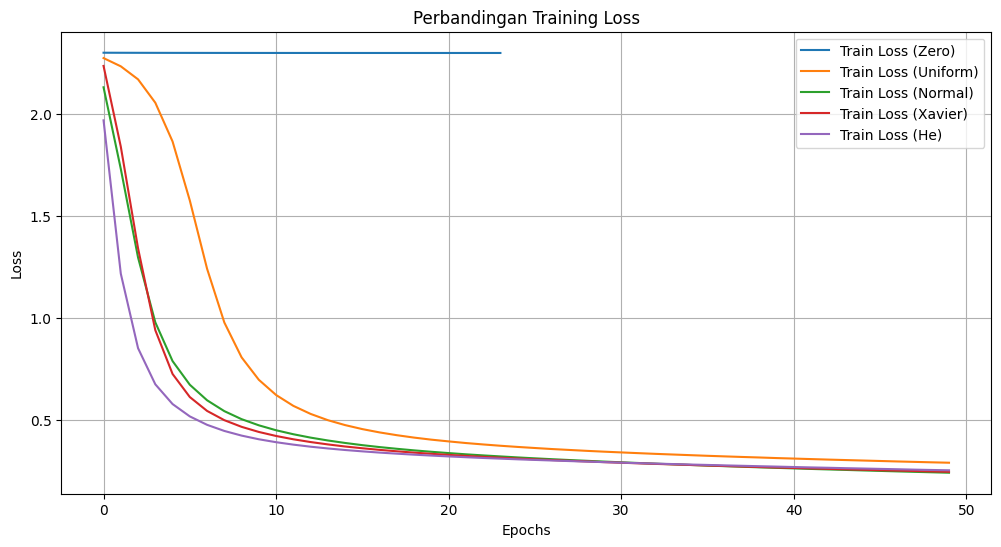


--- Individual Weight Distributions ---

Weight Distribution for Zero initializer:


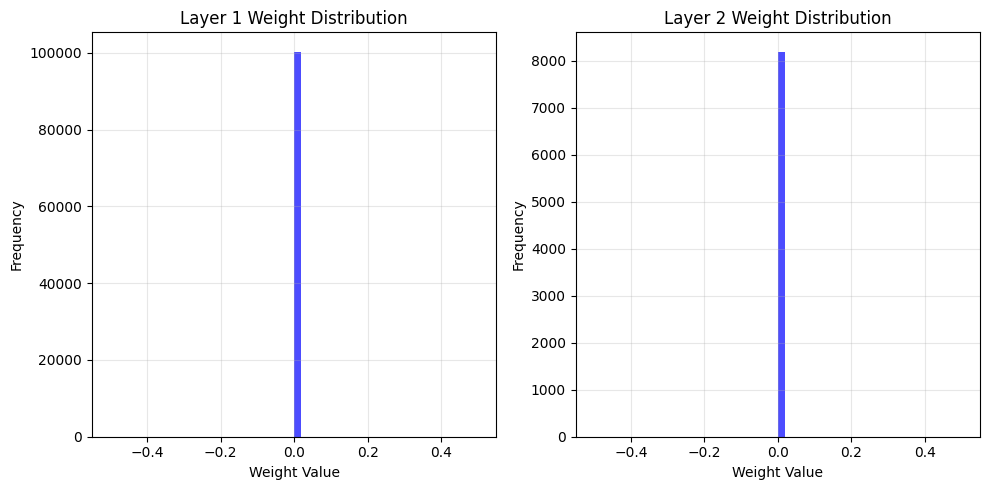


Weight Distribution for Uniform initializer:


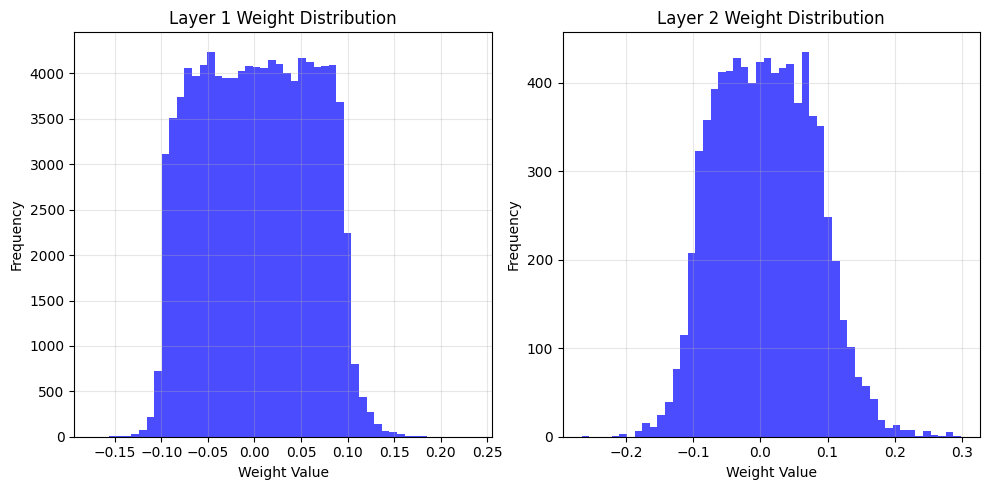


Weight Distribution for Normal initializer:


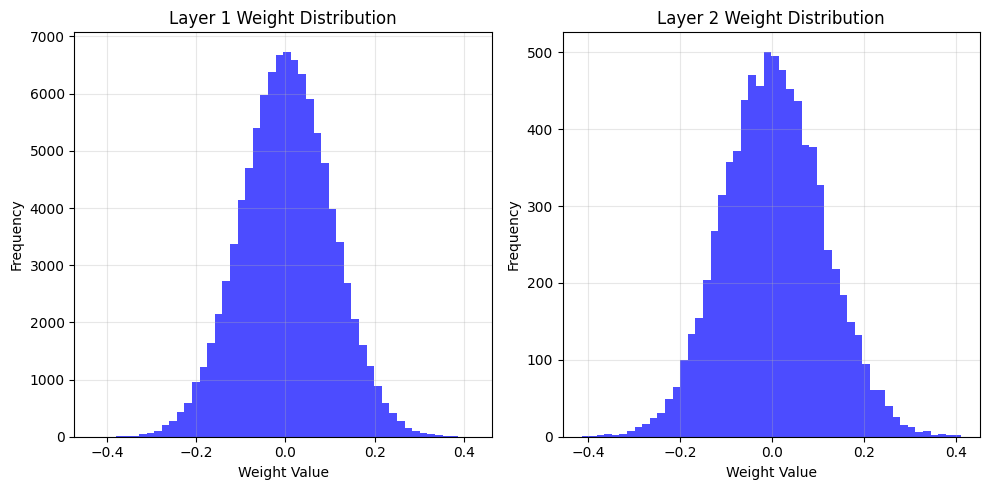


Weight Distribution for Xavier initializer:


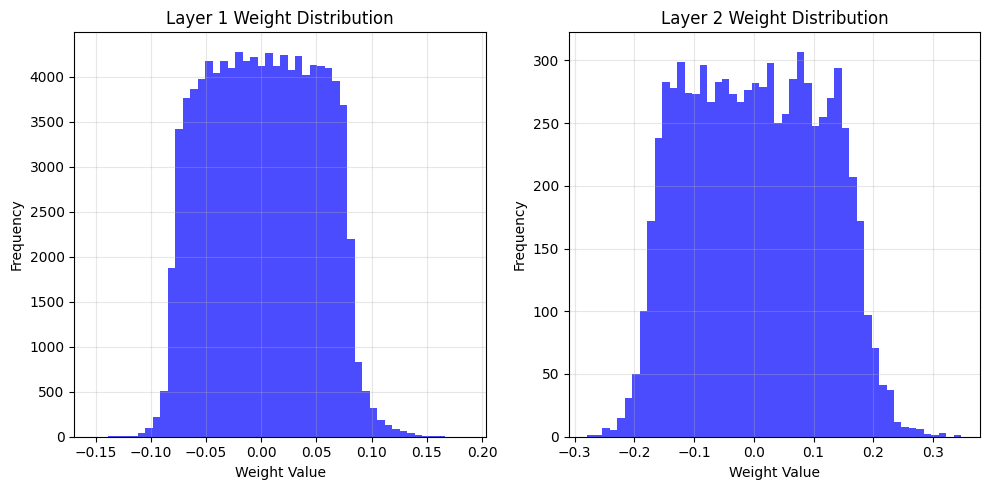


Weight Distribution for He initializer:


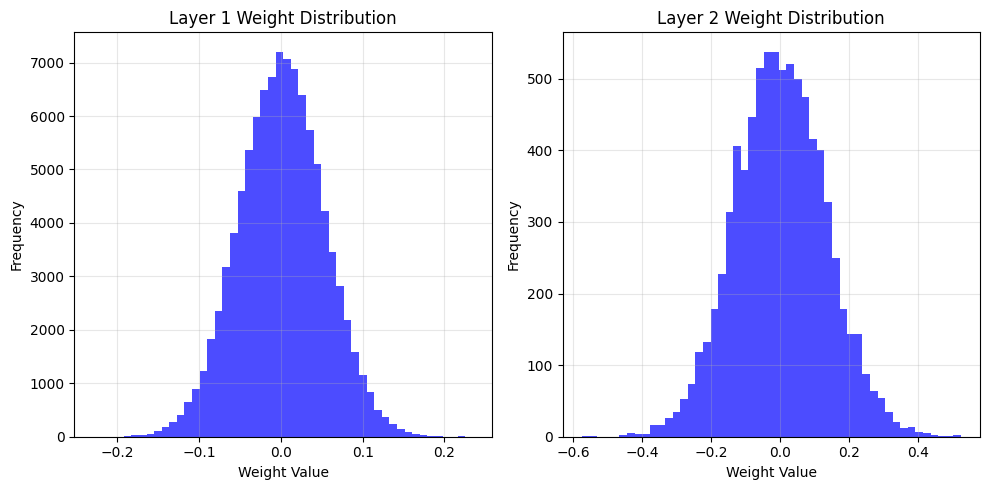


--- Individual Gradient Distributions ---

Gradient Distribution for Zero initializer:


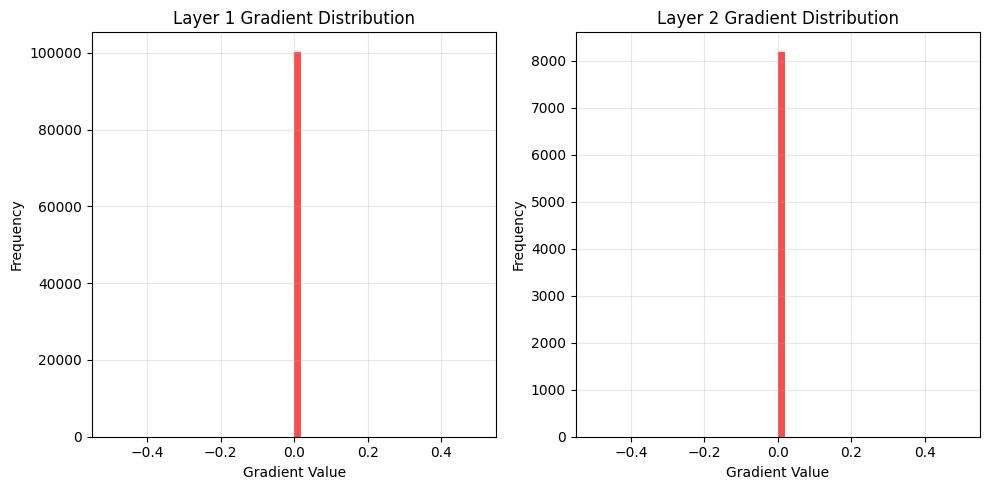


Gradient Distribution for Uniform initializer:


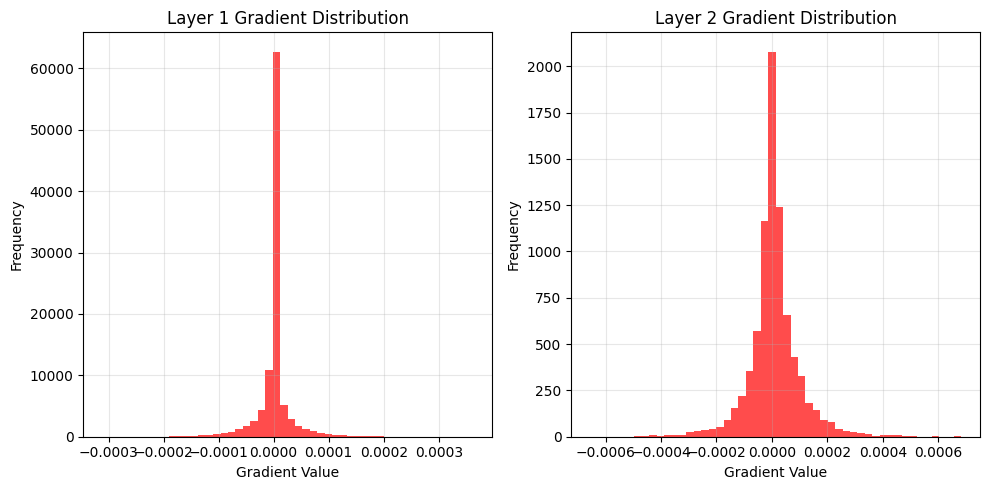


Gradient Distribution for Normal initializer:


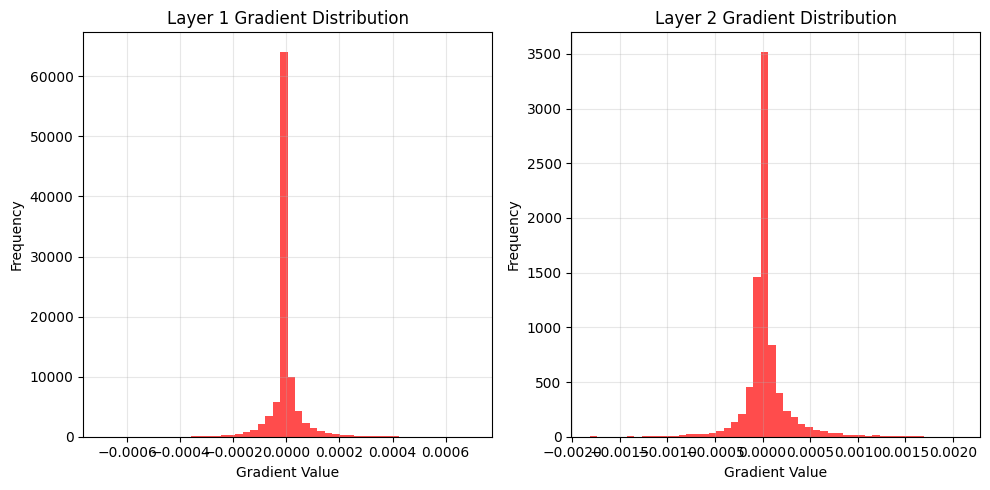


Gradient Distribution for Xavier initializer:


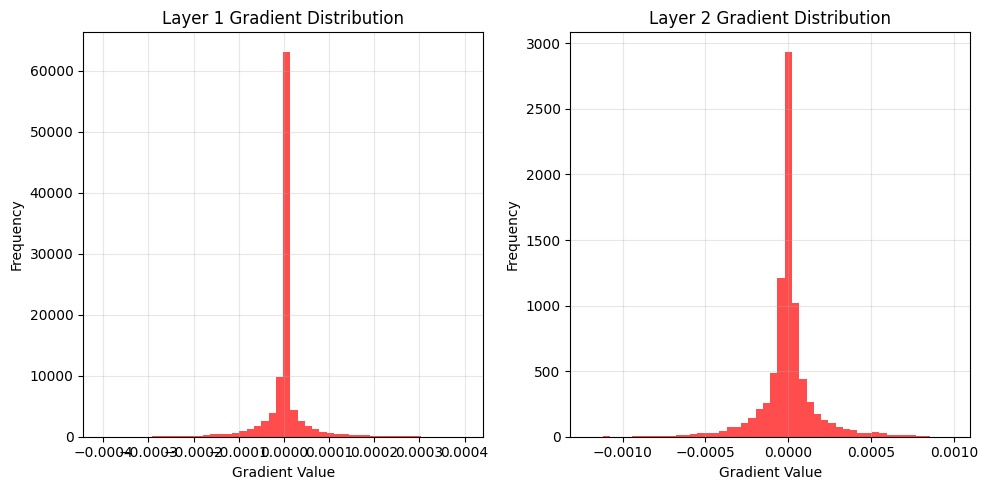


Gradient Distribution for He initializer:


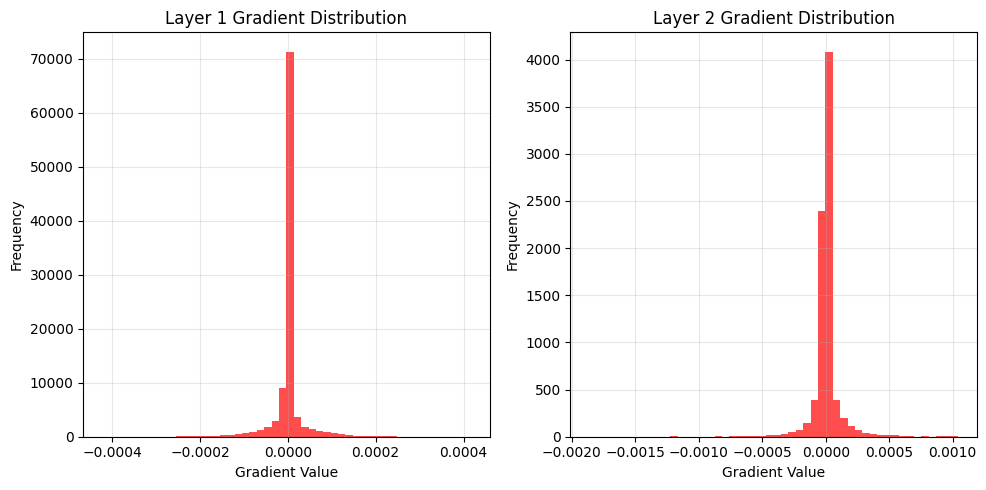

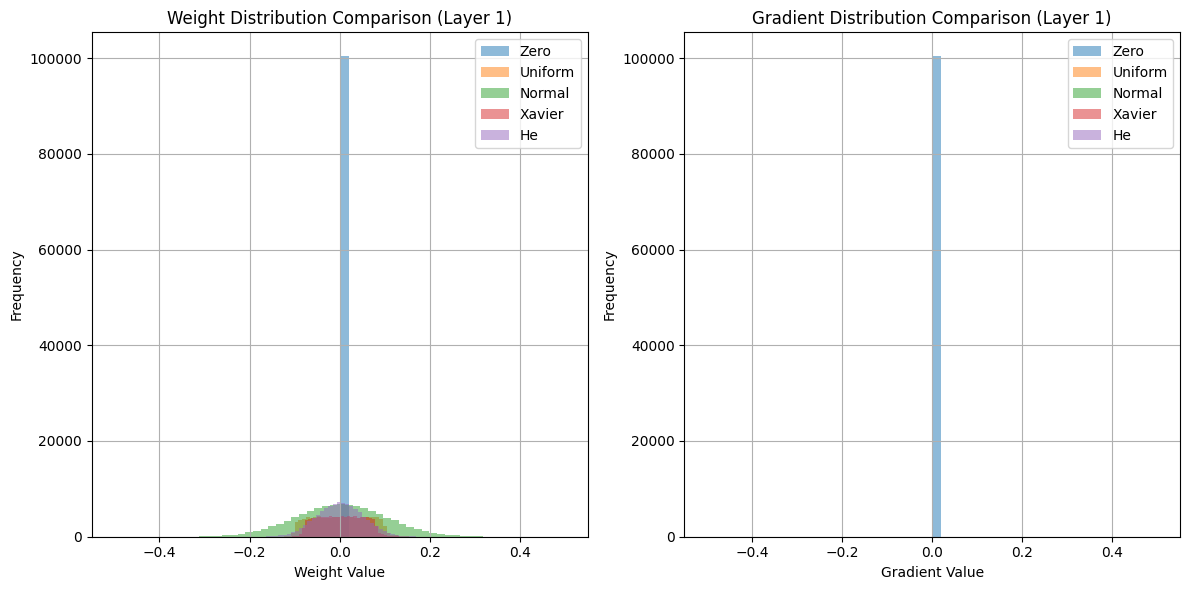


--- Accuracy Summary ---
Initializer Zero: 0.1143
Initializer Uniform: 0.9140
Initializer Normal: 0.9301
Initializer Xavier: 0.9291
Initializer He: 0.9239


In [8]:
# Variasi weight initializer
weight_initializers = {
    "Zero": ZeroInitializer(),
    "Uniform": UniformInitializer(),
    "Normal": NormalInitializer(),
    "Xavier": XavierInitializer(),
    "He": HeInitializer(),
}

results_initializers = {}
histories_initializers = {}
models_initializers = {}

for name, initializer in weight_initializers.items():
    print(f"Training model with {name} initializer")
    model_initializer = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=initializer,
    )
    history_initializer = model_initializer.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    models_initializers[name] = model_initializer
    histories_initializers[name] = history_initializer

    pred_initializer = model_initializer.forward(X_test)
    pred_classes_initializer = np.argmax(pred_initializer, axis=1)
    accuracy_initializer = np.mean(pred_classes_initializer == y_test)
    results_initializers[name] = accuracy_initializer
    
    print(f"Test Accuracy ({name} Initializer): {accuracy_initializer:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["train_loss"], 
        label=f"Train Loss ({name})"
    )

plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in models_initializers.items():
    print(f"\nWeight Distribution for {name} initializer:")
    model.plot_weight_distribution([0, 1])  # Plot for specific layers

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in models_initializers.items():
    print(f"\nGradient Distribution for {name} initializer:")
    model.plot_gradient_distribution([0, 1])  # Plot for specific layers

plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=name,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in results_initializers.items():
    print(f"Initializer {name}: {accuracy:.4f}")

## Perbandingan dengan MLP

In [9]:
from sklearn.neural_network import MLPClassifier

ffnn_model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_ffnn = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_ffnn = ffnn_model.forward(X_test)
pred_classes_ffnn = np.argmax(pred_ffnn, axis=1)
accuracy_ffnn = np.mean(pred_classes_ffnn == y_test)
print(f"Test Accuracy (FFNN): {accuracy_ffnn:.4f}\n")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=50,
    momentum=0.9,
    random_state=42,
)
mlp_model.fit(X_train, y_train_cat.argmax(axis=1))
pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = np.mean(pred_mlp == y_test)
print(f"Test Accuracy (MLPClassifier): {accuracy_mlp:.4f}\n")

# Akurasi perbandingan
print("\n--- Accuracy Summary ---")
print(f"Custom FFNN Model: {accuracy_ffnn:.4f}")
print(f"MLPClassifier: {accuracy_mlp:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2489.48it/s]


Epoch 1/50, Train Loss: 1.7888, Val Loss: 1.3258, Val Acc: 0.7012


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2512.17it/s]


Epoch 2/50, Train Loss: 1.0689, Val Loss: 0.8819, Val Acc: 0.7937


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2378.45it/s]


Epoch 3/50, Train Loss: 0.7653, Val Loss: 0.6856, Val Acc: 0.8306


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2247.27it/s]


Epoch 4/50, Train Loss: 0.6202, Val Loss: 0.5831, Val Acc: 0.8513


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2074.89it/s]


Epoch 5/50, Train Loss: 0.5383, Val Loss: 0.5205, Val Acc: 0.8635


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2169.55it/s]


Epoch 6/50, Train Loss: 0.4867, Val Loss: 0.4781, Val Acc: 0.8714


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2167.44it/s]


Epoch 7/50, Train Loss: 0.4509, Val Loss: 0.4489, Val Acc: 0.8773


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2279.39it/s]


Epoch 8/50, Train Loss: 0.4249, Val Loss: 0.4264, Val Acc: 0.8814


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2107.60it/s]


Epoch 9/50, Train Loss: 0.4049, Val Loss: 0.4087, Val Acc: 0.8846


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2258.31it/s]


Epoch 10/50, Train Loss: 0.3886, Val Loss: 0.3950, Val Acc: 0.8879


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2261.06it/s]


Epoch 11/50, Train Loss: 0.3758, Val Loss: 0.3832, Val Acc: 0.8911


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2093.13it/s]


Epoch 12/50, Train Loss: 0.3645, Val Loss: 0.3724, Val Acc: 0.8923


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2090.70it/s]


Epoch 13/50, Train Loss: 0.3551, Val Loss: 0.3644, Val Acc: 0.8944


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2245.54it/s]


Epoch 14/50, Train Loss: 0.3468, Val Loss: 0.3574, Val Acc: 0.8962


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2078.80it/s]


Epoch 15/50, Train Loss: 0.3395, Val Loss: 0.3495, Val Acc: 0.8972


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2202.82it/s]


Epoch 16/50, Train Loss: 0.3329, Val Loss: 0.3434, Val Acc: 0.8987


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2195.48it/s]


Epoch 17/50, Train Loss: 0.3270, Val Loss: 0.3383, Val Acc: 0.8993


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2178.21it/s]


Epoch 18/50, Train Loss: 0.3216, Val Loss: 0.3325, Val Acc: 0.9016


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2353.99it/s]


Epoch 19/50, Train Loss: 0.3163, Val Loss: 0.3280, Val Acc: 0.9021


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2079.61it/s]


Epoch 20/50, Train Loss: 0.3118, Val Loss: 0.3233, Val Acc: 0.9031


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2147.17it/s]


Epoch 21/50, Train Loss: 0.3073, Val Loss: 0.3193, Val Acc: 0.9052


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2278.19it/s]


Epoch 22/50, Train Loss: 0.3032, Val Loss: 0.3151, Val Acc: 0.9074


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2287.06it/s]


Epoch 23/50, Train Loss: 0.2996, Val Loss: 0.3114, Val Acc: 0.9076


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1898.39it/s]


Epoch 24/50, Train Loss: 0.2959, Val Loss: 0.3080, Val Acc: 0.9087


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2471.66it/s]


Epoch 25/50, Train Loss: 0.2923, Val Loss: 0.3059, Val Acc: 0.9112


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2327.96it/s]


Epoch 26/50, Train Loss: 0.2889, Val Loss: 0.3013, Val Acc: 0.9117


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2159.67it/s]


Epoch 27/50, Train Loss: 0.2859, Val Loss: 0.2994, Val Acc: 0.9115


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2151.51it/s]


Epoch 28/50, Train Loss: 0.2829, Val Loss: 0.2977, Val Acc: 0.9122


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1956.07it/s]


Epoch 29/50, Train Loss: 0.2797, Val Loss: 0.2956, Val Acc: 0.9137


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1970.23it/s]


Epoch 30/50, Train Loss: 0.2772, Val Loss: 0.2910, Val Acc: 0.9142


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2254.40it/s]


Epoch 31/50, Train Loss: 0.2745, Val Loss: 0.2880, Val Acc: 0.9153


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2256.44it/s]


Epoch 32/50, Train Loss: 0.2717, Val Loss: 0.2857, Val Acc: 0.9156


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2021.49it/s]


Epoch 33/50, Train Loss: 0.2691, Val Loss: 0.2841, Val Acc: 0.9166


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2057.98it/s]


Epoch 34/50, Train Loss: 0.2667, Val Loss: 0.2813, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2176.94it/s]


Epoch 35/50, Train Loss: 0.2642, Val Loss: 0.2793, Val Acc: 0.9171


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2248.64it/s]


Epoch 36/50, Train Loss: 0.2618, Val Loss: 0.2779, Val Acc: 0.9185


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2297.68it/s]


Epoch 37/50, Train Loss: 0.2594, Val Loss: 0.2750, Val Acc: 0.9194


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2190.46it/s]


Epoch 38/50, Train Loss: 0.2573, Val Loss: 0.2731, Val Acc: 0.9205


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2368.67it/s]


Epoch 39/50, Train Loss: 0.2551, Val Loss: 0.2703, Val Acc: 0.9213


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2103.59it/s]


Epoch 40/50, Train Loss: 0.2528, Val Loss: 0.2693, Val Acc: 0.9215


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2113.15it/s]


Epoch 41/50, Train Loss: 0.2507, Val Loss: 0.2668, Val Acc: 0.9204


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2294.47it/s]


Epoch 42/50, Train Loss: 0.2485, Val Loss: 0.2649, Val Acc: 0.9221


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2134.84it/s]


Epoch 43/50, Train Loss: 0.2465, Val Loss: 0.2626, Val Acc: 0.9231


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2206.87it/s]


Epoch 44/50, Train Loss: 0.2444, Val Loss: 0.2605, Val Acc: 0.9234


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2202.08it/s]


Epoch 45/50, Train Loss: 0.2425, Val Loss: 0.2591, Val Acc: 0.9245


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2305.00it/s]


Epoch 46/50, Train Loss: 0.2405, Val Loss: 0.2571, Val Acc: 0.9243


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1878.95it/s]


Epoch 47/50, Train Loss: 0.2386, Val Loss: 0.2554, Val Acc: 0.9253


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2205.88it/s]


Epoch 48/50, Train Loss: 0.2365, Val Loss: 0.2549, Val Acc: 0.9260


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2372.46it/s]


Epoch 49/50, Train Loss: 0.2347, Val Loss: 0.2529, Val Acc: 0.9259


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2241.51it/s]


Epoch 50/50, Train Loss: 0.2328, Val Loss: 0.2502, Val Acc: 0.9264
Test Accuracy (FFNN): 0.9290

Test Accuracy (MLPClassifier): 0.9772


--- Accuracy Summary ---
Custom FFNN Model: 0.9290
MLPClassifier: 0.9772


## Eksperimen regularisasi L1 / L2


Training model with No Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2397.26it/s]


Epoch 1/50, Train Loss: 2.0997, Val Loss: 1.6670, Val Acc: 0.6279


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1952.26it/s]


Epoch 2/50, Train Loss: 1.3652, Val Loss: 1.1132, Val Acc: 0.7667


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1760.23it/s]


Epoch 3/50, Train Loss: 0.9278, Val Loss: 0.7996, Val Acc: 0.8148


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2114.11it/s]


Epoch 4/50, Train Loss: 0.7027, Val Loss: 0.6464, Val Acc: 0.8363


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1899.78it/s]


Epoch 5/50, Train Loss: 0.5878, Val Loss: 0.5617, Val Acc: 0.8506


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1904.17it/s]


Epoch 6/50, Train Loss: 0.5214, Val Loss: 0.5102, Val Acc: 0.8595


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1923.05it/s]


Epoch 7/50, Train Loss: 0.4783, Val Loss: 0.4741, Val Acc: 0.8674


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1841.49it/s]


Epoch 8/50, Train Loss: 0.4477, Val Loss: 0.4470, Val Acc: 0.8738


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1857.01it/s]


Epoch 9/50, Train Loss: 0.4246, Val Loss: 0.4261, Val Acc: 0.8799


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2222.29it/s]


Epoch 10/50, Train Loss: 0.4062, Val Loss: 0.4096, Val Acc: 0.8836


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2095.58it/s]


Epoch 11/50, Train Loss: 0.3909, Val Loss: 0.3972, Val Acc: 0.8857


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2066.60it/s]


Epoch 12/50, Train Loss: 0.3781, Val Loss: 0.3844, Val Acc: 0.8883


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2239.96it/s]


Epoch 13/50, Train Loss: 0.3670, Val Loss: 0.3745, Val Acc: 0.8910


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1930.89it/s]


Epoch 14/50, Train Loss: 0.3575, Val Loss: 0.3659, Val Acc: 0.8931


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2326.45it/s]


Epoch 15/50, Train Loss: 0.3491, Val Loss: 0.3579, Val Acc: 0.8960


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1831.15it/s]


Epoch 16/50, Train Loss: 0.3415, Val Loss: 0.3501, Val Acc: 0.8980


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2345.34it/s]


Epoch 17/50, Train Loss: 0.3344, Val Loss: 0.3447, Val Acc: 0.8980


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2337.91it/s]


Epoch 18/50, Train Loss: 0.3283, Val Loss: 0.3386, Val Acc: 0.9027


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1778.73it/s]


Epoch 19/50, Train Loss: 0.3223, Val Loss: 0.3330, Val Acc: 0.9022


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2319.29it/s]


Epoch 20/50, Train Loss: 0.3170, Val Loss: 0.3278, Val Acc: 0.9048


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2102.87it/s]


Epoch 21/50, Train Loss: 0.3120, Val Loss: 0.3232, Val Acc: 0.9066


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2100.82it/s]


Epoch 22/50, Train Loss: 0.3074, Val Loss: 0.3194, Val Acc: 0.9064


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2284.71it/s]


Epoch 23/50, Train Loss: 0.3028, Val Loss: 0.3150, Val Acc: 0.9080


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1915.63it/s]


Epoch 24/50, Train Loss: 0.2987, Val Loss: 0.3113, Val Acc: 0.9096


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1903.25it/s]


Epoch 25/50, Train Loss: 0.2948, Val Loss: 0.3072, Val Acc: 0.9119


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2036.39it/s]


Epoch 26/50, Train Loss: 0.2911, Val Loss: 0.3042, Val Acc: 0.9125


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2034.29it/s]


Epoch 27/50, Train Loss: 0.2876, Val Loss: 0.3009, Val Acc: 0.9137


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2241.42it/s]


Epoch 28/50, Train Loss: 0.2844, Val Loss: 0.2978, Val Acc: 0.9145


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2024.84it/s]


Epoch 29/50, Train Loss: 0.2811, Val Loss: 0.2945, Val Acc: 0.9152


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1871.32it/s]


Epoch 30/50, Train Loss: 0.2780, Val Loss: 0.2919, Val Acc: 0.9160


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1991.51it/s]


Epoch 31/50, Train Loss: 0.2749, Val Loss: 0.2894, Val Acc: 0.9168


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2039.62it/s]


Epoch 32/50, Train Loss: 0.2719, Val Loss: 0.2868, Val Acc: 0.9171


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2012.62it/s]


Epoch 33/50, Train Loss: 0.2693, Val Loss: 0.2843, Val Acc: 0.9179


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2084.62it/s]


Epoch 34/50, Train Loss: 0.2665, Val Loss: 0.2823, Val Acc: 0.9184


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2097.47it/s]


Epoch 35/50, Train Loss: 0.2641, Val Loss: 0.2788, Val Acc: 0.9202


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2044.80it/s]


Epoch 36/50, Train Loss: 0.2615, Val Loss: 0.2774, Val Acc: 0.9194


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2090.05it/s]


Epoch 37/50, Train Loss: 0.2589, Val Loss: 0.2745, Val Acc: 0.9210


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2110.66it/s]


Epoch 38/50, Train Loss: 0.2565, Val Loss: 0.2719, Val Acc: 0.9209


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2255.62it/s]


Epoch 39/50, Train Loss: 0.2541, Val Loss: 0.2715, Val Acc: 0.9204


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2230.69it/s]


Epoch 40/50, Train Loss: 0.2520, Val Loss: 0.2679, Val Acc: 0.9227


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2088.96it/s]


Epoch 41/50, Train Loss: 0.2498, Val Loss: 0.2656, Val Acc: 0.9225


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2367.94it/s]


Epoch 42/50, Train Loss: 0.2474, Val Loss: 0.2646, Val Acc: 0.9235


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2066.02it/s]


Epoch 43/50, Train Loss: 0.2454, Val Loss: 0.2623, Val Acc: 0.9230


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2096.94it/s]


Epoch 44/50, Train Loss: 0.2434, Val Loss: 0.2608, Val Acc: 0.9233


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2042.78it/s]


Epoch 45/50, Train Loss: 0.2413, Val Loss: 0.2585, Val Acc: 0.9236


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2026.79it/s]


Epoch 46/50, Train Loss: 0.2394, Val Loss: 0.2562, Val Acc: 0.9248


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1984.14it/s]


Epoch 47/50, Train Loss: 0.2374, Val Loss: 0.2550, Val Acc: 0.9252


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2355.97it/s]


Epoch 48/50, Train Loss: 0.2355, Val Loss: 0.2524, Val Acc: 0.9256


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1871.44it/s]


Epoch 49/50, Train Loss: 0.2335, Val Loss: 0.2527, Val Acc: 0.9261


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2200.34it/s]


Epoch 50/50, Train Loss: 0.2318, Val Loss: 0.2494, Val Acc: 0.9267
Test Accuracy (No Regularization): 0.9298


Training model with L1 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1030.11it/s]


Epoch 1/50, Train Loss: 2.4374, Val Loss: 1.5727, Val Acc: 0.6544


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1016.71it/s]


Epoch 2/50, Train Loss: 1.7444, Val Loss: 1.1717, Val Acc: 0.7484


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1029.51it/s]


Epoch 3/50, Train Loss: 1.3935, Val Loss: 0.9719, Val Acc: 0.7906


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1020.94it/s]


Epoch 4/50, Train Loss: 1.1963, Val Loss: 0.8731, Val Acc: 0.8086


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1023.32it/s]


Epoch 5/50, Train Loss: 1.0797, Val Loss: 0.8240, Val Acc: 0.8227


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1024.49it/s]


Epoch 6/50, Train Loss: 1.0071, Val Loss: 0.8005, Val Acc: 0.8313


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 984.51it/s] 


Epoch 7/50, Train Loss: 0.9580, Val Loss: 0.7886, Val Acc: 0.8352


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1009.87it/s]


Epoch 8/50, Train Loss: 0.9236, Val Loss: 0.7842, Val Acc: 0.8375


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1002.22it/s]


Epoch 9/50, Train Loss: 0.8999, Val Loss: 0.7839, Val Acc: 0.8381


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1010.26it/s]


Epoch 10/50, Train Loss: 0.8830, Val Loss: 0.7851, Val Acc: 0.8375


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 999.72it/s] 


Epoch 11/50, Train Loss: 0.8686, Val Loss: 0.7852, Val Acc: 0.8365


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1006.81it/s]


Epoch 12/50, Train Loss: 0.8563, Val Loss: 0.7829, Val Acc: 0.8362


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 971.91it/s] 


Epoch 13/50, Train Loss: 0.8435, Val Loss: 0.7791, Val Acc: 0.8345


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1012.04it/s]


Epoch 14/50, Train Loss: 0.8308, Val Loss: 0.7735, Val Acc: 0.8371


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1007.78it/s]


Epoch 15/50, Train Loss: 0.8177, Val Loss: 0.7673, Val Acc: 0.8316


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1001.18it/s]


Epoch 16/50, Train Loss: 0.8050, Val Loss: 0.7588, Val Acc: 0.8346


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1014.47it/s]


Epoch 17/50, Train Loss: 0.7918, Val Loss: 0.7496, Val Acc: 0.8335


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1018.81it/s]


Epoch 18/50, Train Loss: 0.7792, Val Loss: 0.7411, Val Acc: 0.8321


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1013.60it/s]


Epoch 19/50, Train Loss: 0.7672, Val Loss: 0.7319, Val Acc: 0.8327


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1031.24it/s]


Epoch 20/50, Train Loss: 0.7550, Val Loss: 0.7232, Val Acc: 0.8344


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1011.50it/s]


Epoch 21/50, Train Loss: 0.7433, Val Loss: 0.7136, Val Acc: 0.8359


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1018.71it/s]


Epoch 22/50, Train Loss: 0.7326, Val Loss: 0.7051, Val Acc: 0.8342


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1021.16it/s]


Epoch 23/50, Train Loss: 0.7220, Val Loss: 0.6965, Val Acc: 0.8345


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1026.51it/s]


Epoch 24/50, Train Loss: 0.7115, Val Loss: 0.6879, Val Acc: 0.8352


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1030.40it/s]


Epoch 25/50, Train Loss: 0.7020, Val Loss: 0.6806, Val Acc: 0.8358


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1024.47it/s]


Epoch 26/50, Train Loss: 0.6930, Val Loss: 0.6738, Val Acc: 0.8371


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1015.92it/s]


Epoch 27/50, Train Loss: 0.6844, Val Loss: 0.6664, Val Acc: 0.8368


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1012.17it/s]


Epoch 28/50, Train Loss: 0.6766, Val Loss: 0.6595, Val Acc: 0.8361


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1010.52it/s]


Epoch 29/50, Train Loss: 0.6689, Val Loss: 0.6535, Val Acc: 0.8367


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1014.16it/s]


Epoch 30/50, Train Loss: 0.6615, Val Loss: 0.6476, Val Acc: 0.8383


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1023.46it/s]


Epoch 31/50, Train Loss: 0.6546, Val Loss: 0.6427, Val Acc: 0.8411


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1008.65it/s]


Epoch 32/50, Train Loss: 0.6484, Val Loss: 0.6363, Val Acc: 0.8398


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1011.40it/s]


Epoch 33/50, Train Loss: 0.6416, Val Loss: 0.6306, Val Acc: 0.8395


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 985.91it/s] 


Epoch 34/50, Train Loss: 0.6352, Val Loss: 0.6252, Val Acc: 0.8421


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 998.26it/s] 


Epoch 35/50, Train Loss: 0.6298, Val Loss: 0.6201, Val Acc: 0.8422


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1000.41it/s]


Epoch 36/50, Train Loss: 0.6242, Val Loss: 0.6161, Val Acc: 0.8424


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1024.86it/s]


Epoch 37/50, Train Loss: 0.6190, Val Loss: 0.6112, Val Acc: 0.8425


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 989.05it/s] 


Epoch 38/50, Train Loss: 0.6140, Val Loss: 0.6074, Val Acc: 0.8452


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1026.91it/s]


Epoch 39/50, Train Loss: 0.6092, Val Loss: 0.6026, Val Acc: 0.8458


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1027.44it/s]


Epoch 40/50, Train Loss: 0.6045, Val Loss: 0.5982, Val Acc: 0.8461


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1024.58it/s]


Epoch 41/50, Train Loss: 0.5999, Val Loss: 0.5943, Val Acc: 0.8461


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1008.06it/s]


Epoch 42/50, Train Loss: 0.5960, Val Loss: 0.5905, Val Acc: 0.8477


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1023.28it/s]


Epoch 43/50, Train Loss: 0.5918, Val Loss: 0.5870, Val Acc: 0.8479


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1022.86it/s]


Epoch 44/50, Train Loss: 0.5880, Val Loss: 0.5839, Val Acc: 0.8483


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 997.15it/s] 


Epoch 45/50, Train Loss: 0.5846, Val Loss: 0.5818, Val Acc: 0.8491


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1028.23it/s]


Epoch 46/50, Train Loss: 0.5809, Val Loss: 0.5779, Val Acc: 0.8496


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1004.60it/s]


Epoch 47/50, Train Loss: 0.5779, Val Loss: 0.5743, Val Acc: 0.8506


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1026.16it/s]


Epoch 48/50, Train Loss: 0.5750, Val Loss: 0.5720, Val Acc: 0.8509


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1015.41it/s]


Epoch 49/50, Train Loss: 0.5721, Val Loss: 0.5695, Val Acc: 0.8527


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1016.33it/s]


Epoch 50/50, Train Loss: 0.5693, Val Loss: 0.5672, Val Acc: 0.8528
Test Accuracy (L1 Regularization): 0.8598


Training model with L2 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1886.24it/s]


Epoch 1/50, Train Loss: 1.9868, Val Loss: 1.4365, Val Acc: 0.6699


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2055.40it/s]


Epoch 2/50, Train Loss: 1.1708, Val Loss: 0.9365, Val Acc: 0.7908


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1781.60it/s]


Epoch 3/50, Train Loss: 0.8200, Val Loss: 0.7101, Val Acc: 0.8316


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1896.93it/s]


Epoch 4/50, Train Loss: 0.6602, Val Loss: 0.5985, Val Acc: 0.8479


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1939.29it/s]


Epoch 5/50, Train Loss: 0.5753, Val Loss: 0.5354, Val Acc: 0.8601


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1947.63it/s]


Epoch 6/50, Train Loss: 0.5236, Val Loss: 0.4939, Val Acc: 0.8690


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1930.88it/s]


Epoch 7/50, Train Loss: 0.4890, Val Loss: 0.4642, Val Acc: 0.8746


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1872.63it/s]


Epoch 8/50, Train Loss: 0.4633, Val Loss: 0.4427, Val Acc: 0.8792


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1880.01it/s]


Epoch 9/50, Train Loss: 0.4438, Val Loss: 0.4269, Val Acc: 0.8834


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2003.35it/s]


Epoch 10/50, Train Loss: 0.4283, Val Loss: 0.4121, Val Acc: 0.8870


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1856.22it/s]


Epoch 11/50, Train Loss: 0.4156, Val Loss: 0.4015, Val Acc: 0.8887


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1774.85it/s]


Epoch 12/50, Train Loss: 0.4049, Val Loss: 0.3929, Val Acc: 0.8896


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1937.52it/s]


Epoch 13/50, Train Loss: 0.3959, Val Loss: 0.3841, Val Acc: 0.8931


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1928.61it/s]


Epoch 14/50, Train Loss: 0.3881, Val Loss: 0.3772, Val Acc: 0.8936


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1739.76it/s]


Epoch 15/50, Train Loss: 0.3812, Val Loss: 0.3710, Val Acc: 0.8947


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1794.46it/s]


Epoch 16/50, Train Loss: 0.3752, Val Loss: 0.3655, Val Acc: 0.8966


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1648.92it/s]


Epoch 17/50, Train Loss: 0.3697, Val Loss: 0.3608, Val Acc: 0.8986


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1856.89it/s]


Epoch 18/50, Train Loss: 0.3648, Val Loss: 0.3563, Val Acc: 0.8993


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1712.82it/s]


Epoch 19/50, Train Loss: 0.3603, Val Loss: 0.3528, Val Acc: 0.8997


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1862.44it/s]


Epoch 20/50, Train Loss: 0.3562, Val Loss: 0.3491, Val Acc: 0.9011


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1881.43it/s]


Epoch 21/50, Train Loss: 0.3524, Val Loss: 0.3455, Val Acc: 0.9005


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1809.11it/s]


Epoch 22/50, Train Loss: 0.3487, Val Loss: 0.3421, Val Acc: 0.9026


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1916.73it/s]


Epoch 23/50, Train Loss: 0.3455, Val Loss: 0.3399, Val Acc: 0.9033


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1758.66it/s]


Epoch 24/50, Train Loss: 0.3424, Val Loss: 0.3367, Val Acc: 0.9039


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1941.28it/s]


Epoch 25/50, Train Loss: 0.3395, Val Loss: 0.3352, Val Acc: 0.9048


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1958.90it/s]


Epoch 26/50, Train Loss: 0.3368, Val Loss: 0.3322, Val Acc: 0.9049


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1941.91it/s]


Epoch 27/50, Train Loss: 0.3342, Val Loss: 0.3302, Val Acc: 0.9056


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1801.98it/s]


Epoch 28/50, Train Loss: 0.3319, Val Loss: 0.3279, Val Acc: 0.9052


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1911.38it/s]


Epoch 29/50, Train Loss: 0.3296, Val Loss: 0.3263, Val Acc: 0.9072


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1571.92it/s]


Epoch 30/50, Train Loss: 0.3273, Val Loss: 0.3245, Val Acc: 0.9076


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1592.64it/s]


Epoch 31/50, Train Loss: 0.3253, Val Loss: 0.3220, Val Acc: 0.9083


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1870.97it/s]


Epoch 32/50, Train Loss: 0.3233, Val Loss: 0.3208, Val Acc: 0.9083


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1628.21it/s]


Epoch 33/50, Train Loss: 0.3212, Val Loss: 0.3200, Val Acc: 0.9084


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1619.74it/s]


Epoch 34/50, Train Loss: 0.3195, Val Loss: 0.3168, Val Acc: 0.9112


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1683.01it/s]


Epoch 35/50, Train Loss: 0.3177, Val Loss: 0.3158, Val Acc: 0.9098


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1618.32it/s]


Epoch 36/50, Train Loss: 0.3160, Val Loss: 0.3147, Val Acc: 0.9108


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1739.74it/s]


Epoch 37/50, Train Loss: 0.3144, Val Loss: 0.3129, Val Acc: 0.9113


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1951.53it/s]


Epoch 38/50, Train Loss: 0.3127, Val Loss: 0.3118, Val Acc: 0.9115


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1791.63it/s]


Epoch 39/50, Train Loss: 0.3111, Val Loss: 0.3107, Val Acc: 0.9118


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1814.66it/s]


Epoch 40/50, Train Loss: 0.3096, Val Loss: 0.3094, Val Acc: 0.9123


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1852.01it/s]


Epoch 41/50, Train Loss: 0.3082, Val Loss: 0.3082, Val Acc: 0.9138


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1813.41it/s]


Epoch 42/50, Train Loss: 0.3068, Val Loss: 0.3070, Val Acc: 0.9140


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1778.56it/s]


Epoch 43/50, Train Loss: 0.3054, Val Loss: 0.3056, Val Acc: 0.9130


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1590.40it/s]


Epoch 44/50, Train Loss: 0.3040, Val Loss: 0.3043, Val Acc: 0.9145


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1725.16it/s]


Epoch 45/50, Train Loss: 0.3028, Val Loss: 0.3037, Val Acc: 0.9154


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1598.31it/s]


Epoch 46/50, Train Loss: 0.3015, Val Loss: 0.3028, Val Acc: 0.9157


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1737.07it/s]


Epoch 47/50, Train Loss: 0.3003, Val Loss: 0.3017, Val Acc: 0.9146


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1922.17it/s]


Epoch 48/50, Train Loss: 0.2991, Val Loss: 0.3002, Val Acc: 0.9151


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1972.55it/s]


Epoch 49/50, Train Loss: 0.2978, Val Loss: 0.3002, Val Acc: 0.9160


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1856.85it/s]


Epoch 50/50, Train Loss: 0.2968, Val Loss: 0.2986, Val Acc: 0.9170
Test Accuracy (L2 Regularization): 0.9189



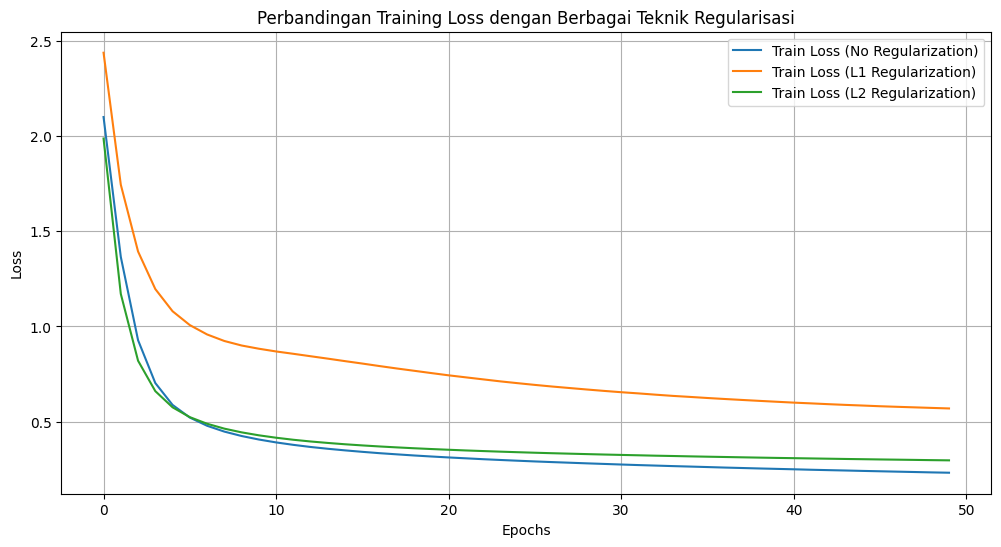


--- Individual Weight Distributions ---

Weight Distribution for No Regularization:


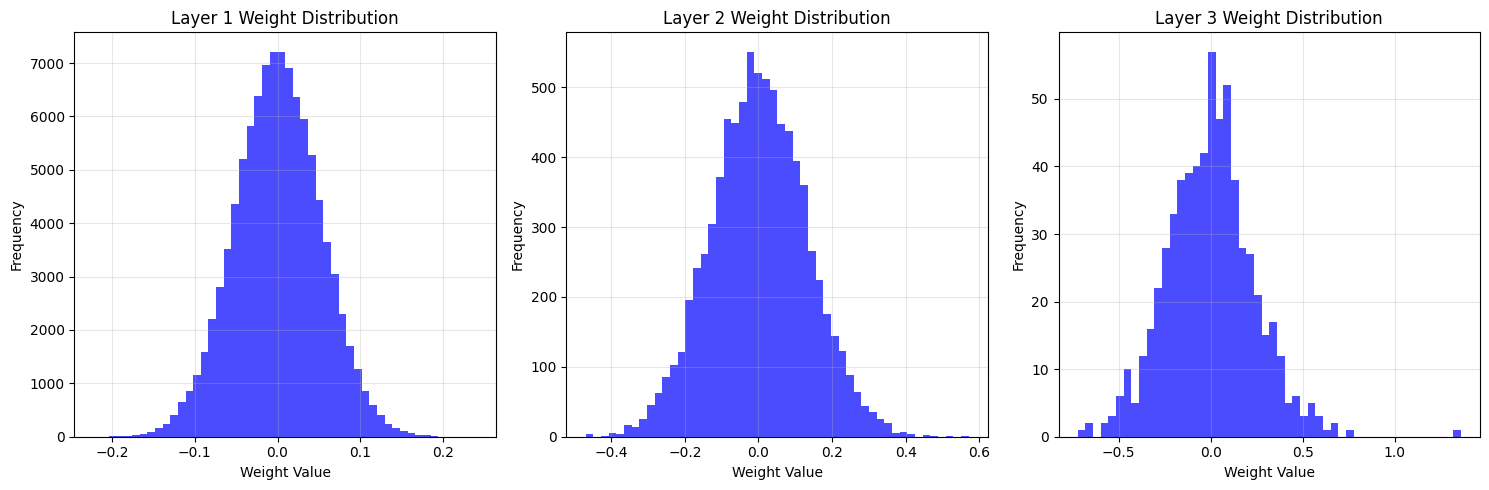


Weight Distribution for L1 Regularization:


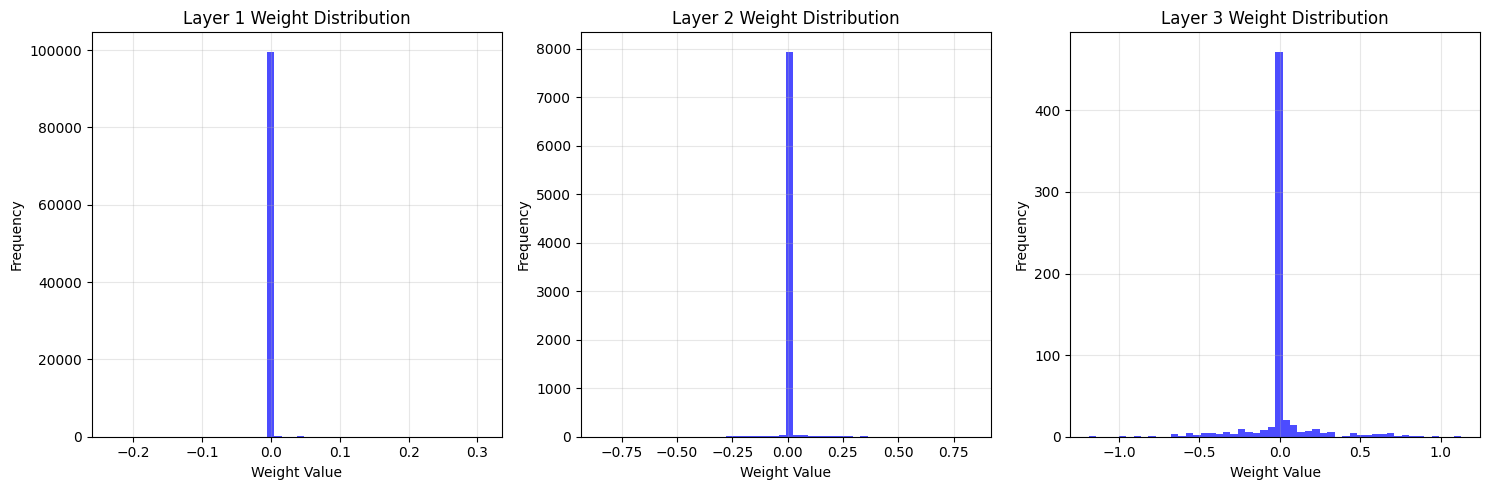


Weight Distribution for L2 Regularization:


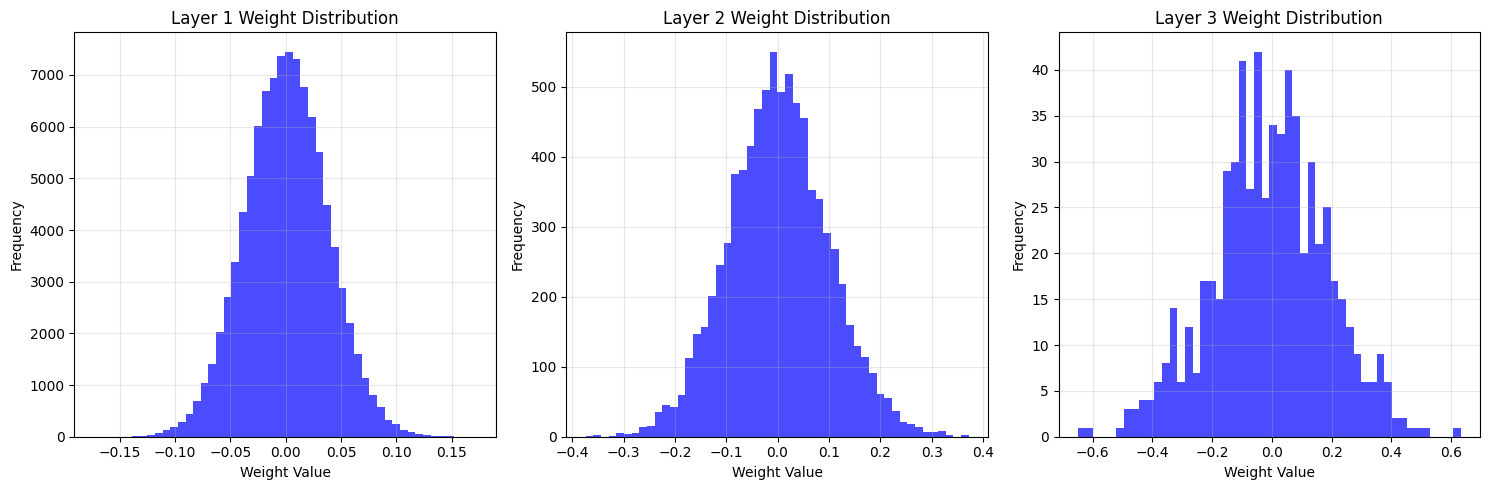


--- Individual Gradient Distributions ---

Gradient Distribution for No Regularization:


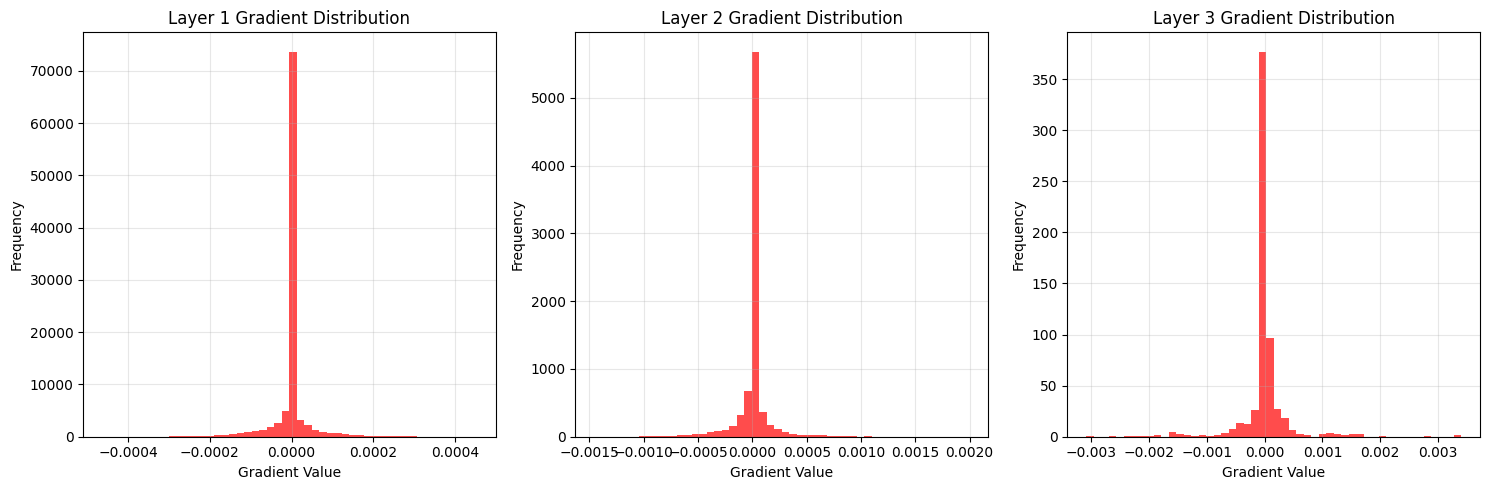


Gradient Distribution for L1 Regularization:


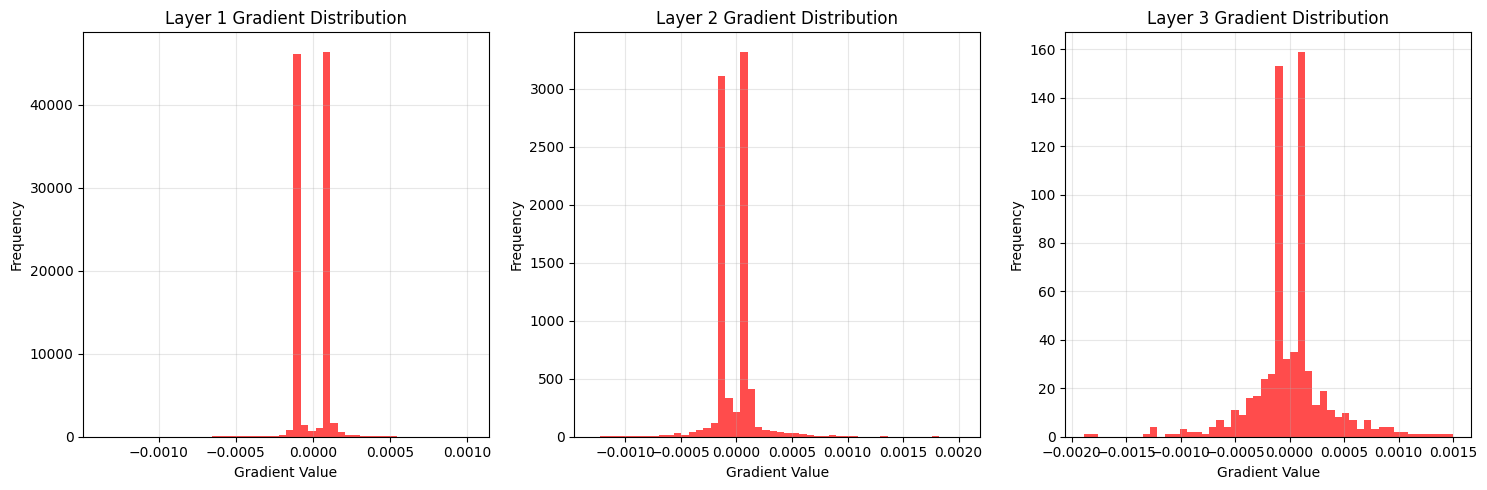


Gradient Distribution for L2 Regularization:


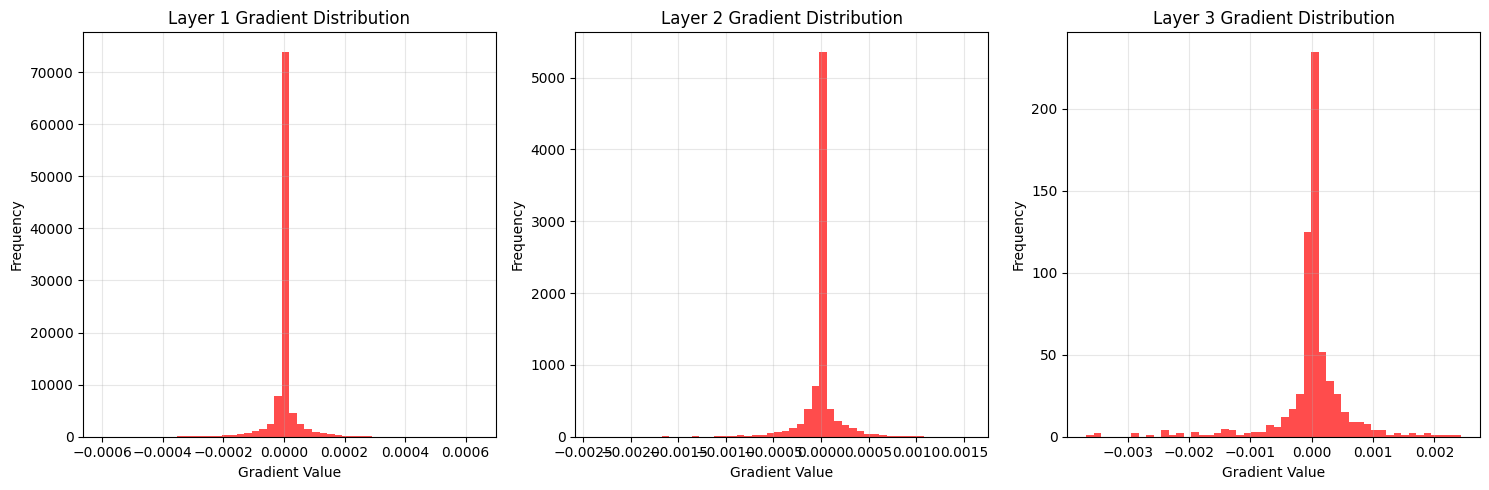

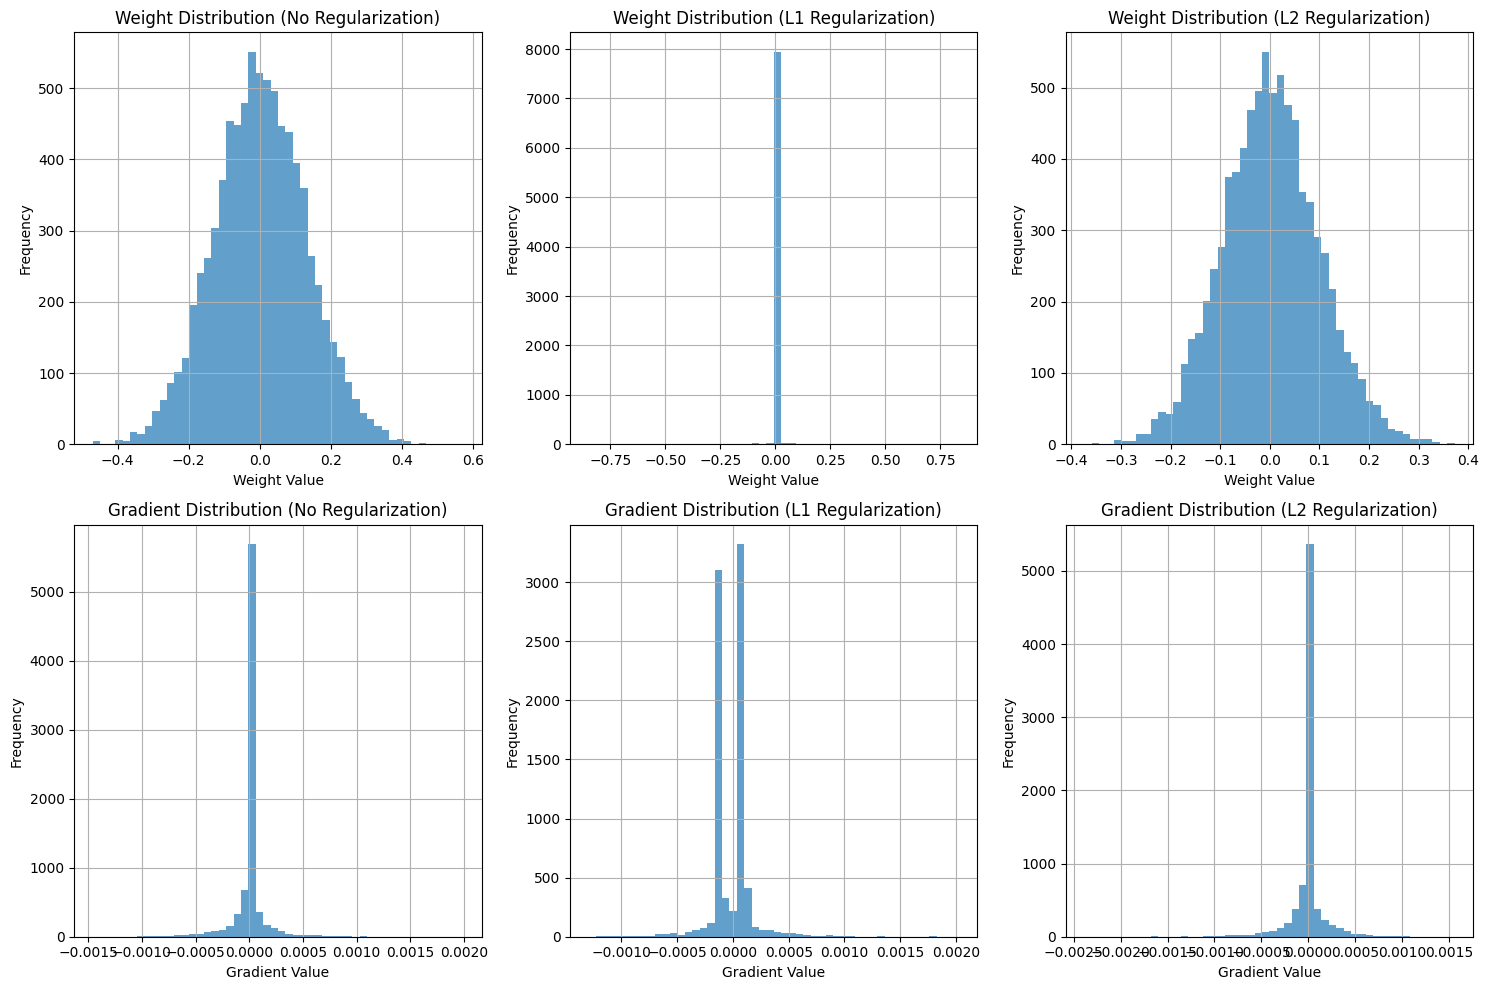


--- Accuracy Summary ---
No Regularization: 0.9298
L1 Regularization: 0.8598
L2 Regularization: 0.9189


In [10]:
regularization_results = {}
regularization_histories = {}
regularization_models = {}

reg_configs = [
    {"name": "No Regularization", "l1": 0, "l2": 0},
    {"name": "L1 Regularization", "l1": 0.0001, "l2": 0},
    {"name": "L2 Regularization", "l1": 0, "l2": 0.0001}
]

for config in reg_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        l1_lambda=config["l1"],
        l2_lambda=config["l2"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    regularization_results[config["name"]] = accuracy
    regularization_histories[config["name"]] = history
    regularization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in regularization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in regularization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 10))

# Weight distributions (top row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+1)
    plt.title(f"Weight Distribution ({name})")
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid()

# Gradient distributions (bottom row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+4)
    plt.title(f"Gradient Distribution ({name})")
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in regularization_results.items():
    print(f"{name}: {accuracy:.4f}")

## Eksperimen RMSNorm


Training model with No Normalization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2413.72it/s]


Epoch 1/50, Train Loss: 1.8747, Val Loss: 1.3687, Val Acc: 0.6689


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2145.00it/s]


Epoch 2/50, Train Loss: 1.1015, Val Loss: 0.9177, Val Acc: 0.7749


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2332.74it/s]


Epoch 3/50, Train Loss: 0.7922, Val Loss: 0.7136, Val Acc: 0.8149


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2231.23it/s]


Epoch 4/50, Train Loss: 0.6430, Val Loss: 0.6049, Val Acc: 0.8404


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2161.54it/s]


Epoch 5/50, Train Loss: 0.5576, Val Loss: 0.5388, Val Acc: 0.8551


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2032.64it/s]


Epoch 6/50, Train Loss: 0.5022, Val Loss: 0.4926, Val Acc: 0.8648


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2119.05it/s]


Epoch 7/50, Train Loss: 0.4633, Val Loss: 0.4596, Val Acc: 0.8758


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1737.31it/s]


Epoch 8/50, Train Loss: 0.4348, Val Loss: 0.4358, Val Acc: 0.8786


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2128.04it/s]


Epoch 9/50, Train Loss: 0.4129, Val Loss: 0.4172, Val Acc: 0.8825


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1876.81it/s]


Epoch 10/50, Train Loss: 0.3958, Val Loss: 0.4014, Val Acc: 0.8866


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2095.98it/s]


Epoch 11/50, Train Loss: 0.3818, Val Loss: 0.3885, Val Acc: 0.8893


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2296.84it/s]


Epoch 12/50, Train Loss: 0.3701, Val Loss: 0.3776, Val Acc: 0.8923


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2372.28it/s]


Epoch 13/50, Train Loss: 0.3604, Val Loss: 0.3696, Val Acc: 0.8927


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1974.06it/s]


Epoch 14/50, Train Loss: 0.3522, Val Loss: 0.3613, Val Acc: 0.8950


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2250.69it/s]


Epoch 15/50, Train Loss: 0.3447, Val Loss: 0.3544, Val Acc: 0.8978


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2182.55it/s]


Epoch 16/50, Train Loss: 0.3381, Val Loss: 0.3487, Val Acc: 0.8982


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2127.61it/s]


Epoch 17/50, Train Loss: 0.3323, Val Loss: 0.3433, Val Acc: 0.9020


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1969.56it/s]


Epoch 18/50, Train Loss: 0.3269, Val Loss: 0.3392, Val Acc: 0.9004


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2338.78it/s]


Epoch 19/50, Train Loss: 0.3223, Val Loss: 0.3341, Val Acc: 0.9028


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2205.39it/s]


Epoch 20/50, Train Loss: 0.3177, Val Loss: 0.3306, Val Acc: 0.9030


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2063.76it/s]


Epoch 21/50, Train Loss: 0.3138, Val Loss: 0.3256, Val Acc: 0.9055


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2149.13it/s]


Epoch 22/50, Train Loss: 0.3099, Val Loss: 0.3226, Val Acc: 0.9049


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2216.76it/s]


Epoch 23/50, Train Loss: 0.3062, Val Loss: 0.3188, Val Acc: 0.9072


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2221.35it/s]


Epoch 24/50, Train Loss: 0.3028, Val Loss: 0.3156, Val Acc: 0.9072


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2216.29it/s]


Epoch 25/50, Train Loss: 0.2996, Val Loss: 0.3133, Val Acc: 0.9076


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2119.84it/s]


Epoch 26/50, Train Loss: 0.2964, Val Loss: 0.3101, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2320.06it/s]


Epoch 27/50, Train Loss: 0.2936, Val Loss: 0.3079, Val Acc: 0.9100


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1920.49it/s]


Epoch 28/50, Train Loss: 0.2908, Val Loss: 0.3044, Val Acc: 0.9105


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1968.26it/s]


Epoch 29/50, Train Loss: 0.2879, Val Loss: 0.3030, Val Acc: 0.9109


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2139.12it/s]


Epoch 30/50, Train Loss: 0.2854, Val Loss: 0.3002, Val Acc: 0.9114


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2207.99it/s]


Epoch 31/50, Train Loss: 0.2827, Val Loss: 0.2989, Val Acc: 0.9113


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2182.34it/s]


Epoch 32/50, Train Loss: 0.2803, Val Loss: 0.2953, Val Acc: 0.9137


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2198.27it/s]


Epoch 33/50, Train Loss: 0.2779, Val Loss: 0.2938, Val Acc: 0.9131


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2262.74it/s]


Epoch 34/50, Train Loss: 0.2755, Val Loss: 0.2909, Val Acc: 0.9146


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2113.48it/s]


Epoch 35/50, Train Loss: 0.2732, Val Loss: 0.2890, Val Acc: 0.9152


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2440.21it/s]


Epoch 36/50, Train Loss: 0.2709, Val Loss: 0.2870, Val Acc: 0.9169


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2081.93it/s]


Epoch 37/50, Train Loss: 0.2687, Val Loss: 0.2850, Val Acc: 0.9171


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2158.41it/s]


Epoch 38/50, Train Loss: 0.2666, Val Loss: 0.2831, Val Acc: 0.9175


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1989.36it/s]


Epoch 39/50, Train Loss: 0.2645, Val Loss: 0.2811, Val Acc: 0.9177


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2191.99it/s]


Epoch 40/50, Train Loss: 0.2624, Val Loss: 0.2797, Val Acc: 0.9177


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2388.96it/s]


Epoch 41/50, Train Loss: 0.2604, Val Loss: 0.2785, Val Acc: 0.9171


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2020.86it/s]


Epoch 42/50, Train Loss: 0.2584, Val Loss: 0.2753, Val Acc: 0.9198


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2193.37it/s]


Epoch 43/50, Train Loss: 0.2563, Val Loss: 0.2755, Val Acc: 0.9196


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2100.54it/s]


Epoch 44/50, Train Loss: 0.2546, Val Loss: 0.2718, Val Acc: 0.9212


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2099.98it/s]


Epoch 45/50, Train Loss: 0.2525, Val Loss: 0.2707, Val Acc: 0.9205


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2262.40it/s]


Epoch 46/50, Train Loss: 0.2508, Val Loss: 0.2685, Val Acc: 0.9213


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2219.16it/s]


Epoch 47/50, Train Loss: 0.2488, Val Loss: 0.2671, Val Acc: 0.9214


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2058.66it/s]


Epoch 48/50, Train Loss: 0.2469, Val Loss: 0.2655, Val Acc: 0.9220


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2095.85it/s]


Epoch 49/50, Train Loss: 0.2449, Val Loss: 0.2634, Val Acc: 0.9227


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2200.50it/s]


Epoch 50/50, Train Loss: 0.2431, Val Loss: 0.2623, Val Acc: 0.9229
Test Accuracy (No Normalization): 0.9247


Training model with RMSNorm


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2166.77it/s]


Epoch 1/50, Train Loss: 1.9022, Val Loss: 1.3323, Val Acc: 0.6694


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2269.60it/s]


Epoch 2/50, Train Loss: 1.0861, Val Loss: 0.8915, Val Acc: 0.7847


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2345.87it/s]


Epoch 3/50, Train Loss: 0.7773, Val Loss: 0.6902, Val Acc: 0.8237


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2058.66it/s]


Epoch 4/50, Train Loss: 0.6259, Val Loss: 0.5818, Val Acc: 0.8446


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2066.24it/s]


Epoch 5/50, Train Loss: 0.5412, Val Loss: 0.5199, Val Acc: 0.8556


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2031.06it/s]


Epoch 6/50, Train Loss: 0.4894, Val Loss: 0.4776, Val Acc: 0.8668


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2130.94it/s]


Epoch 7/50, Train Loss: 0.4541, Val Loss: 0.4497, Val Acc: 0.8710


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2267.39it/s]


Epoch 8/50, Train Loss: 0.4284, Val Loss: 0.4271, Val Acc: 0.8767


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2008.58it/s]


Epoch 9/50, Train Loss: 0.4086, Val Loss: 0.4098, Val Acc: 0.8804


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2257.55it/s]


Epoch 10/50, Train Loss: 0.3926, Val Loss: 0.3965, Val Acc: 0.8837


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2032.50it/s]


Epoch 11/50, Train Loss: 0.3797, Val Loss: 0.3840, Val Acc: 0.8884


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1985.38it/s]


Epoch 12/50, Train Loss: 0.3686, Val Loss: 0.3744, Val Acc: 0.8900


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1929.78it/s]


Epoch 13/50, Train Loss: 0.3588, Val Loss: 0.3667, Val Acc: 0.8913


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2240.47it/s]


Epoch 14/50, Train Loss: 0.3506, Val Loss: 0.3584, Val Acc: 0.8937


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2117.84it/s]


Epoch 15/50, Train Loss: 0.3433, Val Loss: 0.3515, Val Acc: 0.8958


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2075.43it/s]


Epoch 16/50, Train Loss: 0.3366, Val Loss: 0.3455, Val Acc: 0.8981


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1952.89it/s]


Epoch 17/50, Train Loss: 0.3305, Val Loss: 0.3397, Val Acc: 0.8992


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2046.91it/s]


Epoch 18/50, Train Loss: 0.3250, Val Loss: 0.3357, Val Acc: 0.9005


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2024.69it/s]


Epoch 19/50, Train Loss: 0.3198, Val Loss: 0.3295, Val Acc: 0.9019


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2060.82it/s]


Epoch 20/50, Train Loss: 0.3151, Val Loss: 0.3253, Val Acc: 0.9043


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2108.75it/s]


Epoch 21/50, Train Loss: 0.3108, Val Loss: 0.3223, Val Acc: 0.9043


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2132.66it/s]


Epoch 22/50, Train Loss: 0.3066, Val Loss: 0.3176, Val Acc: 0.9062


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2113.04it/s]


Epoch 23/50, Train Loss: 0.3026, Val Loss: 0.3142, Val Acc: 0.9075


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1985.06it/s]


Epoch 24/50, Train Loss: 0.2989, Val Loss: 0.3102, Val Acc: 0.9079


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2137.99it/s]


Epoch 25/50, Train Loss: 0.2955, Val Loss: 0.3077, Val Acc: 0.9084


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1904.34it/s]


Epoch 26/50, Train Loss: 0.2918, Val Loss: 0.3051, Val Acc: 0.9099


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2421.93it/s]


Epoch 27/50, Train Loss: 0.2889, Val Loss: 0.3013, Val Acc: 0.9112


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2496.37it/s]


Epoch 28/50, Train Loss: 0.2857, Val Loss: 0.2987, Val Acc: 0.9128


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2246.12it/s]


Epoch 29/50, Train Loss: 0.2827, Val Loss: 0.2961, Val Acc: 0.9140


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2250.54it/s]


Epoch 30/50, Train Loss: 0.2799, Val Loss: 0.2926, Val Acc: 0.9156


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2367.61it/s]


Epoch 31/50, Train Loss: 0.2770, Val Loss: 0.2907, Val Acc: 0.9137


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2262.03it/s]


Epoch 32/50, Train Loss: 0.2743, Val Loss: 0.2877, Val Acc: 0.9168


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1975.71it/s]


Epoch 33/50, Train Loss: 0.2716, Val Loss: 0.2847, Val Acc: 0.9178


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2285.58it/s]


Epoch 34/50, Train Loss: 0.2692, Val Loss: 0.2827, Val Acc: 0.9173


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2089.18it/s]


Epoch 35/50, Train Loss: 0.2666, Val Loss: 0.2803, Val Acc: 0.9190


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2059.65it/s]


Epoch 36/50, Train Loss: 0.2643, Val Loss: 0.2780, Val Acc: 0.9191


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2185.05it/s]


Epoch 37/50, Train Loss: 0.2618, Val Loss: 0.2769, Val Acc: 0.9198


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2176.28it/s]


Epoch 38/50, Train Loss: 0.2596, Val Loss: 0.2741, Val Acc: 0.9201


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2169.73it/s]


Epoch 39/50, Train Loss: 0.2575, Val Loss: 0.2722, Val Acc: 0.9213


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2404.30it/s]


Epoch 40/50, Train Loss: 0.2553, Val Loss: 0.2694, Val Acc: 0.9215


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2288.00it/s]


Epoch 41/50, Train Loss: 0.2529, Val Loss: 0.2679, Val Acc: 0.9233


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2333.73it/s]


Epoch 42/50, Train Loss: 0.2509, Val Loss: 0.2656, Val Acc: 0.9229


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2238.91it/s]


Epoch 43/50, Train Loss: 0.2488, Val Loss: 0.2639, Val Acc: 0.9233


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2043.44it/s]


Epoch 44/50, Train Loss: 0.2467, Val Loss: 0.2618, Val Acc: 0.9246


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2303.56it/s]


Epoch 45/50, Train Loss: 0.2448, Val Loss: 0.2607, Val Acc: 0.9243


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2170.32it/s]


Epoch 46/50, Train Loss: 0.2427, Val Loss: 0.2582, Val Acc: 0.9261


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2200.25it/s]


Epoch 47/50, Train Loss: 0.2408, Val Loss: 0.2571, Val Acc: 0.9253


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2012.22it/s]


Epoch 48/50, Train Loss: 0.2388, Val Loss: 0.2561, Val Acc: 0.9246


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2202.98it/s]


Epoch 49/50, Train Loss: 0.2370, Val Loss: 0.2531, Val Acc: 0.9271


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1958.05it/s]


Epoch 50/50, Train Loss: 0.2351, Val Loss: 0.2521, Val Acc: 0.9276
Test Accuracy (RMSNorm): 0.9291



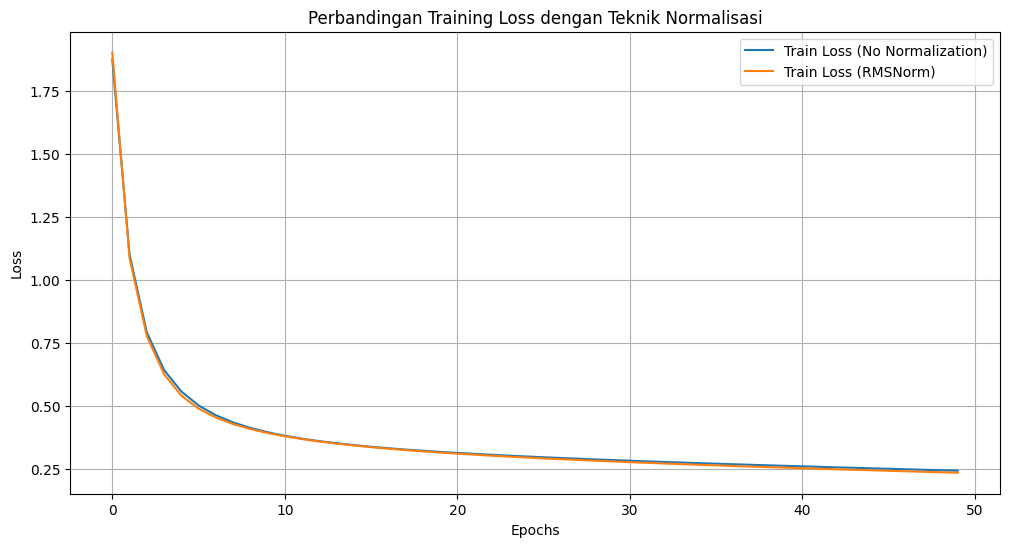


--- Individual Weight Distributions ---

Weight Distribution for No Normalization:


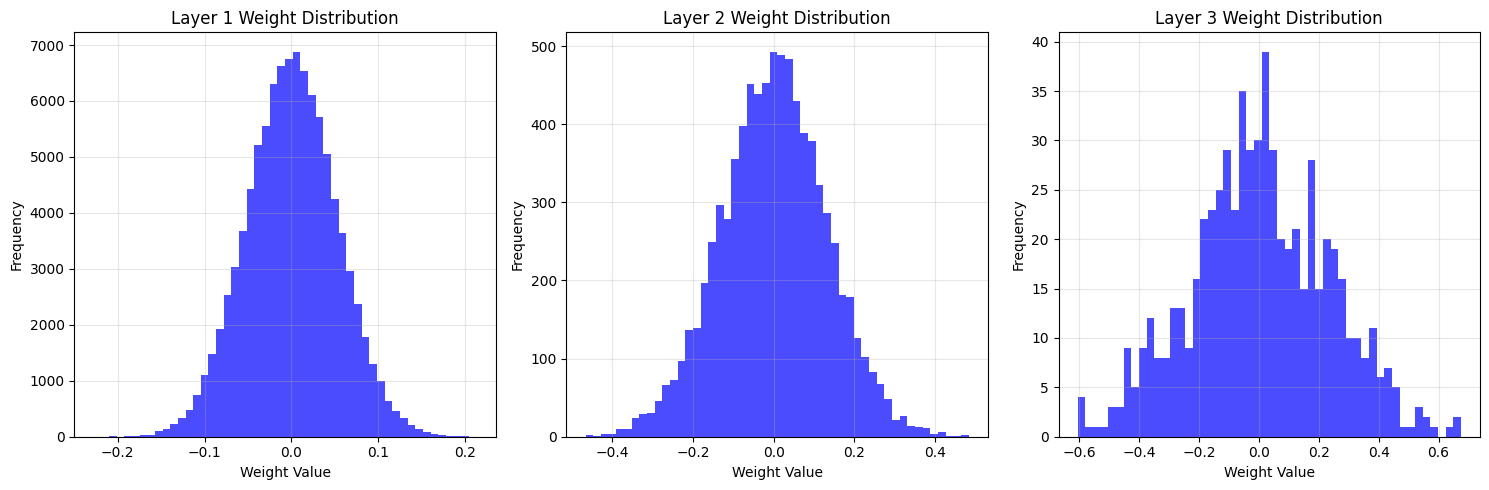


Weight Distribution for RMSNorm:


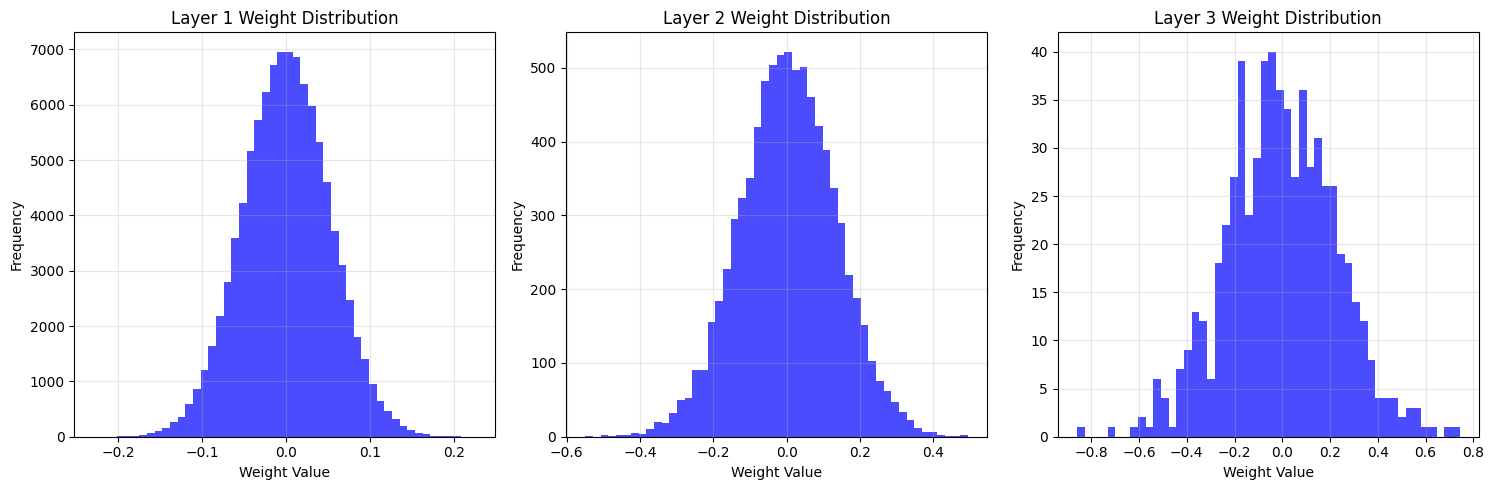


--- Individual Gradient Distributions ---

Gradient Distribution for No Normalization:


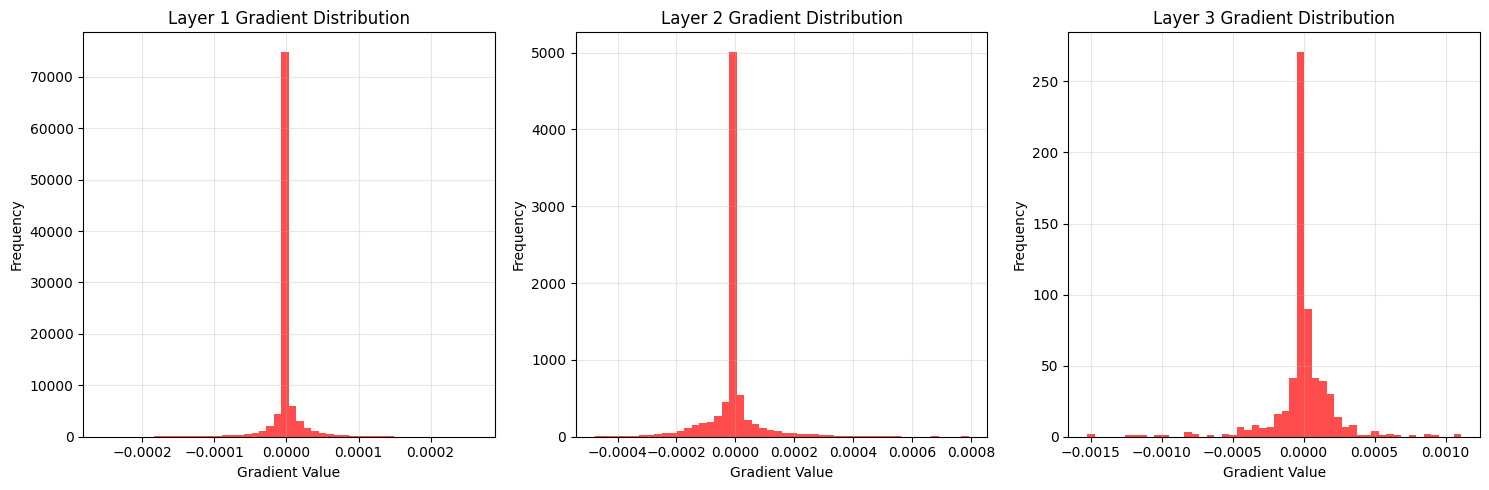


Gradient Distribution for RMSNorm:


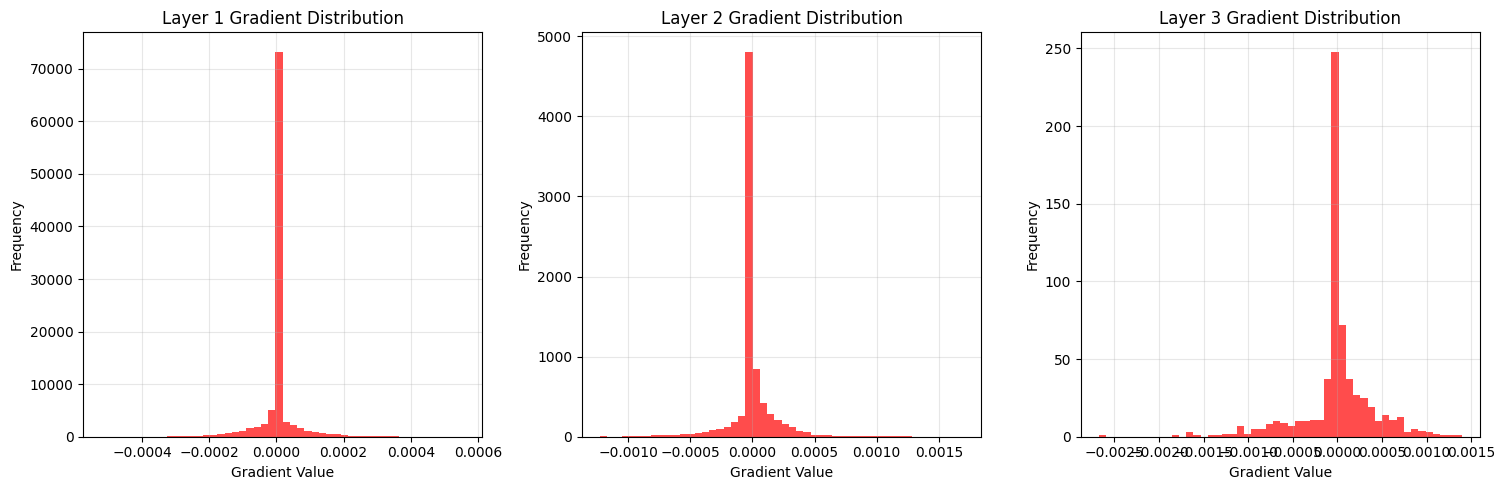

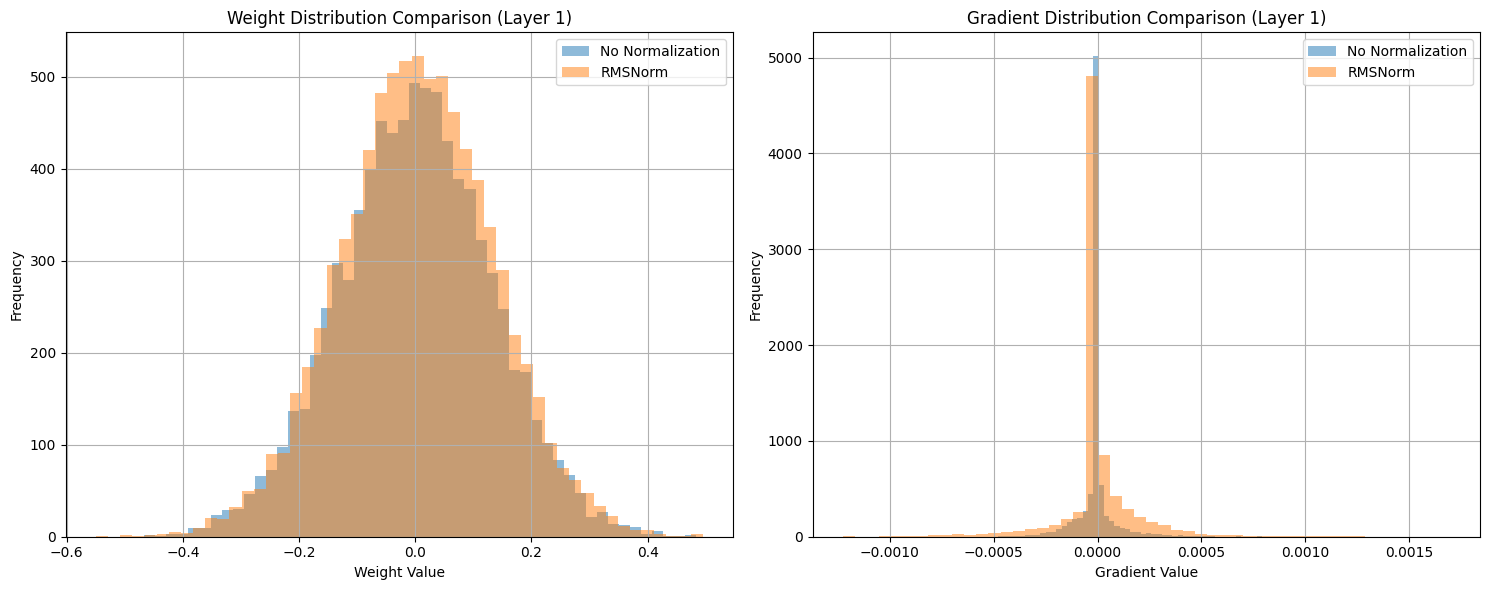


--- Accuracy Summary ---
No Normalization: 0.9247
RMSNorm: 0.9291


In [11]:
normalization_results = {}
normalization_histories = {}
normalization_models = {}

norm_configs = [
    {"name": "No Normalization", "use_rmsnorm": False},
    {"name": "RMSNorm", "use_rmsnorm": True}
]

for config in norm_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        use_rmsnorm=config["use_rmsnorm"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    normalization_results[config["name"]] = accuracy
    normalization_histories[config["name"]] = history
    normalization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in normalization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in normalization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in normalization_results.items():
    print(f"{name}: {accuracy:.4f}")